# ASSIGNMENT 2

I HAVE BEEN GIVEN WITH TWO DATASET INCOME-TRAINING AND INCOME-TESTING. 
BASED ON THE AVAILABLE DATASET, 
YOU ARE GONNA WITNESS HOW THE MISSING VALUES ARE IMPUTED, HOW THE FEATURE EXTRACTION IS PERFORMED, HOW THE MODEL IS TRAINED, WHAT IS THE ACCURACY OF THE MODEL, GRID SEARCH, HYPERPARAMETER TUNING OF THE EXISTING MODEL, REVISED ACCURACY OF THE MODEL AFTER PARAMETERS TUNING AND SOME GOOD EXPLORATORY ANALYSIS OF THE DATA. 

STARTING WITH IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection

In [2]:
# For allowing chained rules within the dataframe

pd.options.mode.chained_assignment = None
pd.options.display.max_rows = 999

In [3]:
train_df = pd.read_csv("income_training.csv")
test_df = pd.read_csv("income_testing.csv")
print("Train shape is: ", train_df.shape)
print("Test shape is: ", test_df.shape)

Train shape is:  (24421, 15)
Test shape is:  (12211, 15)


In [4]:
train_df["Income"] = " "
train_df.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
0,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<50K,
1,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<50K,
2,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,50-100K,
3,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<50K,
4,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,<50K,


In [5]:
print(train_df.IncomeBracket[0])

<50K


In [6]:
len(train_df.IncomeBracket)

24421

SINCE THE TARGET VARIABLE INCOME BRACKET IS NOT NUMERICAL, ASSIGNING NEW VARIABLE "INCOME" TO HELP IN VISUALISING DATA

In [7]:
for i in range (len(train_df.IncomeBracket)):
    if train_df.IncomeBracket[i] =="<50K":
        train_df.Income[i] = 25000
    elif train_df.IncomeBracket[i] =="50-100K":
        train_df.Income[i] = 75000
    elif train_df.IncomeBracket[i] ==">100K":
        train_df.Income[i] = 125000

In [8]:
train_df.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
0,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<50K,25000
1,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<50K,25000
2,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,50-100K,75000
3,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<50K,25000
4,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,<50K,25000


In [9]:
train_df["Income"].value_counts()
y = train_df["Income"]
#y.value_counts()

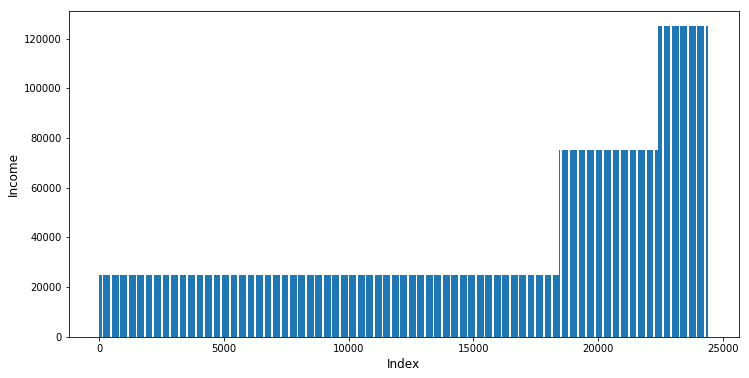

In [10]:
plt.figure(figsize = (12,6))
plt.bar(range(train_df.shape[0]), np.sort(y.values))
plt.xlabel("Index", fontsize = 12)
plt.ylabel("Income", fontsize = 12)
plt.show()

Here, we can see that 80% of the individuals are earning less than 50K

In the rest 20%, it is clearly divided equally. 
From the rest, 15% of the individuals earn between 50K - 100K & other 5% earns more than 100K

In [11]:
# Converting the datatype train_df.Income to numeric for analysis

train_df["Income"] = pd.to_numeric(train_df["Income"], errors = "coerce") # To return the missing values as NaN untouched

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,7
1,object,9


Looks like we have more categorical columns (includes IncomeBracket) than the numerical columns (includes Income)

In [12]:
dtype_df.iloc[:16, :]

,Count,Column Type
0,Age,int64
1,WorkClass,object
2,FinalWeight,int64
3,Education,object
4,EducationLvl,int64
5,MaritalStatus,object
6,Occupation,object
7,Relationship,object
8,Race,object
9,Sex,object


Lets check for the missing values in the dataset

In [13]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ["column_name", "missing_count"]
missing_df = missing_df.loc[missing_df["missing_count"]>0]
missing_df = missing_df.sort_values(by ='missing_count')
missing_df

,column_name,missing_count
13,NativeCountry,395
1,WorkClass,1384
6,Occupation,1390


Seems like we have three columns with the missing values. We shall look at them to fill up the missing values

1. WORKCLASS
2. NATIVECOUNTRY
3. OCCUPATION

# DATA CLEANING- MISSING VALUES

HOW CAN WE FILL THE MISSING VALUES? 

LETS GET SOME INSIGHTS ON THE COLUMNS WITH MISSING VALUES

WORKCLASS

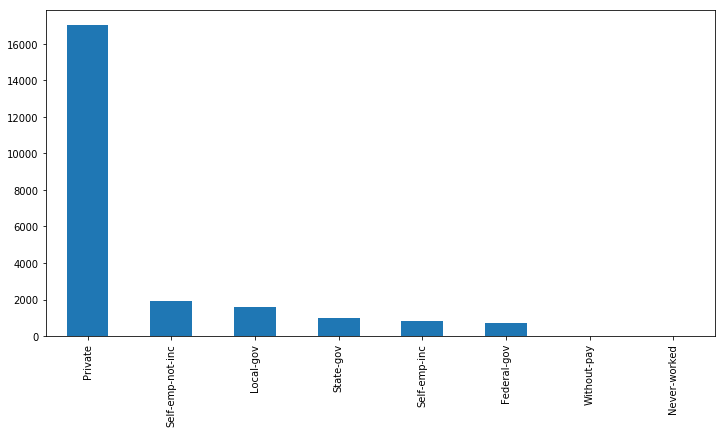

In [14]:
a = train_df["WorkClass"].value_counts()
plt.figure(figsize =(12,6))
a.plot(kind = 'bar')
plt.show()

In [15]:
a

Private             17002
Self-emp-not-inc     1910
Local-gov            1574
State-gov             978
Self-emp-inc          844
Federal-gov           712
Without-pay            11
Never-worked            6
Name: WorkClass, dtype: int64

Most frequent category in WorkClass is "Private"

NATIVECOUNTRY

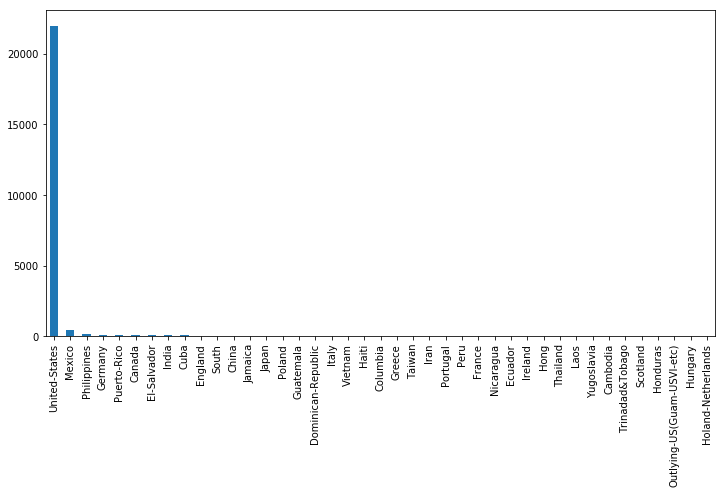

In [16]:
b = train_df["NativeCountry"].value_counts()
plt.figure(figsize =(12,6))
b.plot(kind = 'bar')
plt.show()

In [17]:
b

United-States                 21978
Mexico                          485
Philippines                     146
Germany                          96
Puerto-Rico                      90
Canada                           82
El-Salvador                      80
India                            73
Cuba                             71
England                          59
South                            58
China                            56
Jamaica                          53
Japan                            46
Poland                           46
Guatemala                        44
Dominican-Republic               44
Italy                            43
Vietnam                          43
Haiti                            43
Columbia                         39
Greece                           31
Taiwan                           31
Iran                             31
Portugal                         27
Peru                             21
France                           20
Nicaragua                   

Similar to the WorkClass, NativeCountry also has been dominated by single category - "UnitedStates". To remind, this dataset is all about the people of the UnitedStates as well

OCCUPATION

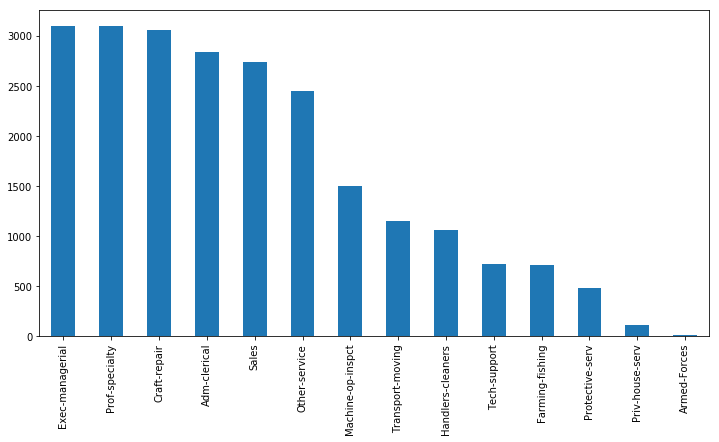

In [18]:
c = train_df["Occupation"].value_counts()
#col_order = np.sort(train_df["Occupation"].unique()).tolist()
plt.figure(figsize =(12,6))
c.plot(kind = 'bar') #order = col_order)
plt.show()

In [19]:
c

Exec-managerial      3102
Prof-specialty       3099
Craft-repair         3062
Adm-clerical         2833
Sales                2738
Other-service        2449
Machine-op-inspct    1499
Transport-moving     1151
Handlers-cleaners    1062
Tech-support          723
Farming-fishing       710
Protective-serv       480
Priv-house-serv       115
Armed-Forces            8
Name: Occupation, dtype: int64

UNLIKE THE OTHER TWO, OCCUPATION HAS NO SINGLE DOMINANT CATEGORY IN IT. THE TOP CONTRIBUTORS ARE FIRST SIX CATEGORIES

Filling the missing values for Nativecountry and Workclass using mode method. 
There are many imputation methods available and this is the most common method. Therefore, I'm gonna use the same.

WE USED 'MODE' METHOD FOR FILLING THE FIRST TWO COLUMNS WITH MISSING VALUES. 

BUT WE CANNOT USE THE SAME METHOD FOR OCCUPATION SINCE ITS CATEGORIES ARE ALMOST EQUALLY PROPORTIONATE

LET'S FILL THE MISSING VALUES

WORKCLASS

In [20]:
from scipy.stats import mode

#train_df["WorkClass"]=train_df["WorkClass"].astype(str)

#mode(train_df["WorkClass"])

train_df = train_df.fillna({"WorkClass":"Private"})

So, all the missing values have been filled with "Private" in the workclass column

NATIVECOUNTRY

In [21]:
#train_df["NativeCountry"] = train_df["NativeCountry"].astype(str)

#mode(train_df["NativeCountry"])

train_df = train_df.fillna({"NativeCountry":"United-States"})

#train_df["NativeCountry"].value_counts()

So, all the missing values have been filled with "United States" in the Native Country Column

OCCUPATION

SINCE OCCUPATION IS A CATEGORICAL VARIABLE AND IT CANNOT BE IMPUTED WITH MOST FREQUENT METHOD, 

WE ARE GONNA USE "RANDOM FOREST" TO CLASSIFY THE MISSING VALUES TO THE OCCUPATION BY SPLITTING TRAIN_DF TO TRAIN & TEST

In [22]:
#Checking the count of missing values in Occupation category

train_df.isnull().sum(axis=0)

Age                 0
WorkClass           0
FinalWeight         0
Education           0
EducationLvl        0
MaritalStatus       0
Occupation       1390
Relationship        0
Race                0
Sex                 0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry       0
IncomeBracket       0
Income              0
dtype: int64

SORTING THE DATASET BASED ON "OCCUPATION" SO THAT MISSING VALUES ARE AT THE BOTTOM AND ACTUAL VALUES ON THE TOP

In [23]:
train_df.sort_values(by = "Occupation", inplace=True)
train_df = train_df.reset_index(drop=True)
train_df.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
0,32,Private,202952,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<50K,25000
1,47,State-gov,263215,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,80,United-States,<50K,25000
2,19,Private,210308,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States,<50K,25000
3,67,Without-pay,137192,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,12,Philippines,<50K,25000
4,48,Local-gov,319079,Bachelors,13,Divorced,Adm-clerical,Unmarried,White,Female,0,0,30,United-States,<50K,25000


In [24]:
train_df.tail(5)

# Occupation has been sorted

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
24416,63,Private,109446,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<50K,25000
24417,52,Private,159755,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,0,0,50,United-States,50-100K,75000
24418,67,Private,150516,HS-grad,9,Widowed,NaN,Unmarried,White,Male,0,0,3,United-States,<50K,25000
24419,68,Private,110931,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,0,32,United-States,<50K,25000
24420,27,Private,294642,HS-grad,9,Separated,NaN,Unmarried,Black,Female,0,0,40,United-States,<50K,25000


We have rows 23031:24420, where occupation is NaN. Hence, we are gonna use a model to predict the missing value

In [25]:
df1 = train_df # Making a copy for performing classification so that origianl dataframe is unaffected

In [26]:
train = df1[0:23031]
test = df1[23031:24421]
X = train.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,12,13]].values
y = train.iloc[:, 6].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
X[:, 5] = labelencoder_X.fit_transform(X[:, 5])
X[:, 6] = labelencoder_X.fit_transform(X[:, 6])
X[:, 7] = labelencoder_X.fit_transform(X[:, 7])
X[:, 8] = labelencoder_X.fit_transform(X[:, 8])
X[:, 12] = labelencoder_X.fit_transform(X[:, 12])

y = labelencoder_X.fit_transform(y)

print("The Matrix X is:\n", X)
print("The Matrix y is:\n", y)

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nThe accuracy score is :', accuracy_score(y_test, y_pred)*100)

The Matrix X is:
 [[32 2 202952 ..., 0 40 38]
 [47 5 263215 ..., 0 80 38]
 [19 2 210308 ..., 0 15 38]
 ..., 
 [24 2 211585 ..., 0 40 38]
 [63 2 68872 ..., 0 20 38]
 [56 2 159724 ..., 0 40 38]]
The Matrix y is:
 [ 0  0  0 ..., 13 13 13]


C:\Users\manig\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\manig\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(17273, 13)
(5758, 13)
(17273,)
(5758,)
[[282   0  70  82   4  27  31 106   0  69   4  55  15   8]
 [  0   0   2   0   0   0   0   0   0   0   0   0   0   0]
 [ 54   0 286  66  19  42  58  50   0  28  15  50  12  58]
 [124   0  97 221  18  10  17  31   1 151  11  88  15  15]
 [  8   0  44  19  30  10   5  19   0  12   3  14   1  10]
 [ 29   0  63  11   7  28  25  36   2   7   3  15   2  13]
 [ 53   0 108  26   7  23  55  48   2  17   4  18   6  15]
 [138   0  89  30  14  30  34 166   3  29  10  53   6  10]
 [  7   0   1   2   1   0   3   6   5   0   0   3   1   0]
 [ 94   0  35 142   5  14  12  32   0 347   6  50   9   9]
 [ 24   0  26  15   1   3   2  12   0  16  17   4   1   2]
 [ 87   0  97 142   6  14  25  94   4  66   2 122  10  24]
 [ 48   0  24  29   1   3   6  17   0  24   2  17  10   1]
 [ 16   0 103  28   7  15  25  16   0   9   2  24   4  25]]

The accuracy score is : 27.6832233414


In [27]:
"""train = df1[0:23031]
test = df1[23031:24421]
#train.head()
#test.head()
print("Train shape is:", train.shape)
print("Test shape is:", test.shape)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
A = train.apply(LabelEncoder().fit_transform)  # FOR ENCODING ALL THE CATEGORICAL VARAIBLE 
B = test.apply(LabelEncoder().fit_transform)   # FOR ENCODING ALL THE CATEGORICAL VARAIBLE
A.head()
B.head()

X_train = A.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,12,13]]
y_train = A.iloc[:, 6]
X_test = B.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,12,13]]
y_test = B.iloc[:, 6]

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

# y_test HAD ONLY THE NaN VALUES WHICH ARE TO BE CLASSIFIED. ASSIGNING THE y_pred TO y_test
y_test = y_pred

print(y_test)
B.iloc[:, 6] = y_test
#print(B.iloc[:, 6])
print(type(A))
print(type(B))
print(A.shape)
print(B.shape)

new_train_df = pd.concat([A,B], ignore_index = True)
new_train_df.head()
new_train_df.tail()

for i in range (len(new_train_df.Occupation)):
    if new_train_df.Occupation[i] ==0:
        new_train_df.Occupation[i] = "Adm-clerical"
    elif new_train_df.Occupation[i] ==1:
        new_train_df.Occupation[i] = "Armed-Forces"
    elif new_train_df.Occupation[i] ==2:
        new_train_df.Occupation[i] = "Craft-repair"
    elif new_train_df.Occupation[i] ==3:
        new_train_df.Occupation[i] = "Exec-managerial"
    elif new_train_df.Occupation[i] ==4:
        new_train_df.Occupation[i] = "Farming-fishing"
    elif new_train_df.Occupation[i] ==5:
        new_train_df.Occupation[i] = "Handlers-cleaners"
    elif new_train_df.Occupation[i] ==6:
        new_train_df.Occupation[i] = "Machine-op-inspct"
    elif new_train_df.Occupation[i] ==7:
        new_train_df.Occupation[i] = "Other-service"
    elif new_train_df.Occupation[i] ==8:
        new_train_df.Occupation[i] = "Priv-house-serv"
    elif new_train_df.Occupation[i] ==9:
        new_train_df.Occupation[i] = "Prof-specialty"
    elif new_train_df.Occupation[i] ==10:
        new_train_df.Occupation[i] = "Protective-serv"
    elif new_train_df.Occupation[i] ==11:
        new_train_df.Occupation[i] = "Sales"
    elif new_train_df.Occupation[i] ==12:
        new_train_df.Occupation[i] = "Tech-support"
    elif new_train_df.Occupation[i] ==13:
        new_train_df.Occupation[i] = "Transport-moving"

new_train_df.head()

# Checking for the presence of any missing values in the column, just in-case

new_train_df.isnull().sum(axis=0)

print(new_train_df.shape)
print(df1.shape)

df1["Occupation"] = new_train_df["Occupation"]
df1.tail()

#train_df.head()
df1.isnull().sum(axis=0)"""

'train = df1[0:23031]\ntest = df1[23031:24421]\n#train.head()\n#test.head()\nprint("Train shape is:", train.shape)\nprint("Test shape is:", test.shape)\n\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\nA = train.apply(LabelEncoder().fit_transform)  # FOR ENCODING ALL THE CATEGORICAL VARAIBLE \nB = test.apply(LabelEncoder().fit_transform)   # FOR ENCODING ALL THE CATEGORICAL VARAIBLE\nA.head()\nB.head()\n\nX_train = A.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,12,13]]\ny_train = A.iloc[:, 6]\nX_test = B.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,12,13]]\ny_test = B.iloc[:, 6]\n\nfrom sklearn.ensemble import RandomForestClassifier\n\nforest = RandomForestClassifier(n_estimators = 10, criterion = \'entropy\', random_state = 0)\nforest.fit(X_train, y_train)\n\ny_pred = forest.predict(X_test)\n\n# y_test HAD ONLY THE NaN VALUES WHICH ARE TO BE CLASSIFIED. ASSIGNING THE y_pred TO y_test\ny_test = y_pred\n\nprint(y_test)\nB.iloc[:, 6] = y_test\n#print(B.iloc[:, 6])\nprint(type(A))\nprint(ty

FROM THE ACCURACY SCORE ABOVE, WE CAN INFER THAT WE CANNOT IMPUTE THE MISSING VALUES USING THIS CLASSIFICATION METHOD

1. WE CANNOT IMPUTE USING THE STATISTICAL METHOD OF MEAN OR MODE SINCE MEAN MAY LEAD TO FLOATING POINT & MODE WILL BE MISLEADING AS THE DISTRIBUTION IS ALMOST UNIFORM

2. WE CANNOT FOLLOW CLASSIFICATION MACHINE LEARNING METHOD, SINCE IT HAS VERY LOW ACCURACY. ALSO, WE ARE LEAVING OUT THE OBECTIVE VARIABLE IN THIS CLASSIFICATION

BASED ON THE ABOVE CONVINCING POINTS, I CAME TO A CONCLUSION OF DELETING THE ROW VARIABLES WITH THE MISSING VALUES (DROPPING THOSE ROWS WITH MISSING VALUES)

In [28]:
print(train_df.shape)
print(train_df.isnull().sum())
train_df.tail(5)

(24421, 16)
Age                 0
WorkClass           0
FinalWeight         0
Education           0
EducationLvl        0
MaritalStatus       0
Occupation       1390
Relationship        0
Race                0
Sex                 0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry       0
IncomeBracket       0
Income              0
dtype: int64


,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
24416,63,Private,109446,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<50K,25000
24417,52,Private,159755,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,0,0,50,United-States,50-100K,75000
24418,67,Private,150516,HS-grad,9,Widowed,NaN,Unmarried,White,Male,0,0,3,United-States,<50K,25000
24419,68,Private,110931,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,0,32,United-States,<50K,25000
24420,27,Private,294642,HS-grad,9,Separated,NaN,Unmarried,Black,Female,0,0,40,United-States,<50K,25000


DROPPING ALL THE ROWS WITH MISSING VALUES USING dropna()

In [29]:
train_df = train_df.dropna()

Dropping all the rows with the missing values, thereby the nature of distribution is unaffected

In [30]:
train_df.isnull().sum(axis=0)

Age              0
WorkClass        0
FinalWeight      0
Education        0
EducationLvl     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
IncomeBracket    0
Income           0
dtype: int64

FINAL TRAINING DATASET IS :

In [31]:
print("THE FINAL SHAPE OF TRAINING DATASET IS :", train_df.shape)
print("\nTHE TOP ROWS OF THE DATASET ARE:\n")
train_df.head()

THE FINAL SHAPE OF TRAINING DATASET IS : (23031, 16)

THE TOP ROWS OF THE DATASET ARE:



,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
0,32,Private,202952,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<50K,25000
1,47,State-gov,263215,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,80,United-States,<50K,25000
2,19,Private,210308,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States,<50K,25000
3,67,Without-pay,137192,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,12,Philippines,<50K,25000
4,48,Local-gov,319079,Bachelors,13,Divorced,Adm-clerical,Unmarried,White,Female,0,0,30,United-States,<50K,25000


# All missing values have been sorted out. Now the dataset is ready for analysis

# EXPLORATORY ANALYSIS

Treating the target variable- "Income" in the y axis, we are gonna explore various other independent variables and see their behaviour and importance. This exploratory analysis may lead to decisions of dropping a variable based on the plot. Lets dive into it. 

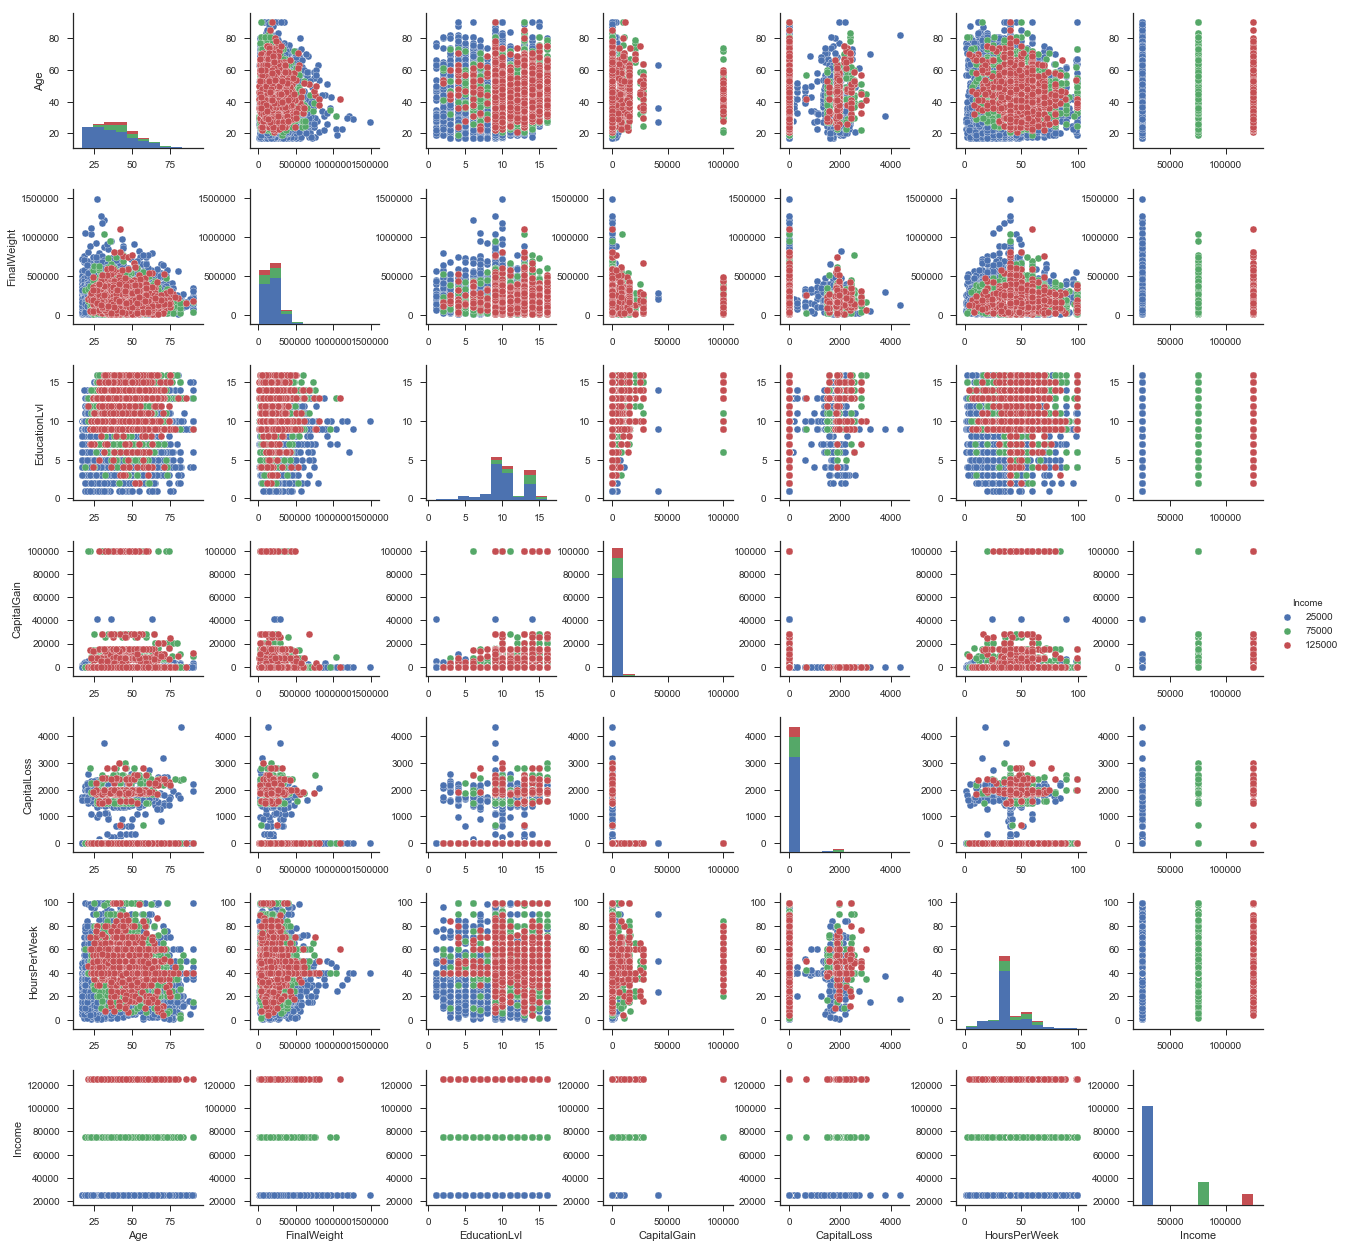

In [32]:
# Using SEABORN pair plot to get the visualization of various numerical values in the entire dataframe

plt.figure(figsize =(20,10))
sns.set(style="ticks")
sns.pairplot(train_df, hue = "Income")
plt.show()

# ANALYSIS OF INDIVIDUAL VARIABLE WITH INCOME AND GETTING INFERENCES

AGE

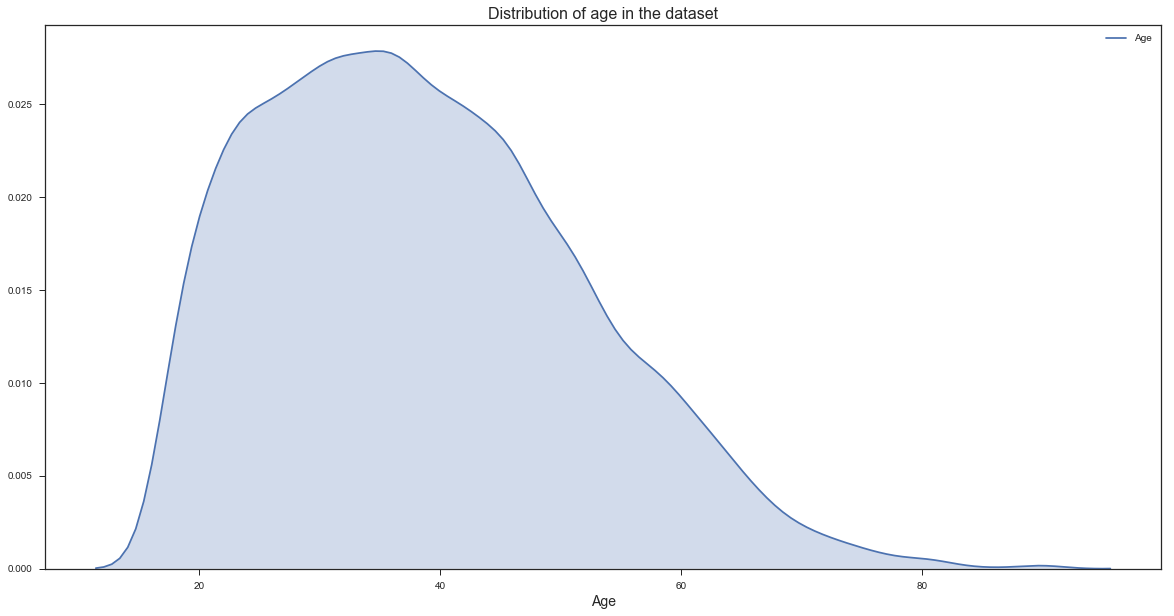

In [33]:
var_name = train_df["Age"]
plt.figure(figsize =(20,10))
sns.kdeplot(var_name, shade = True)
plt.xlabel('Age', fontsize =14)
plt.title("Distribution of age in the dataset", fontsize =16 )
plt.show()

DATASET CONTAINS MORE PEOPLE BETWEEN 20 TO 60 WITH MAXIMUM AGE REACHING NEAR TO 100

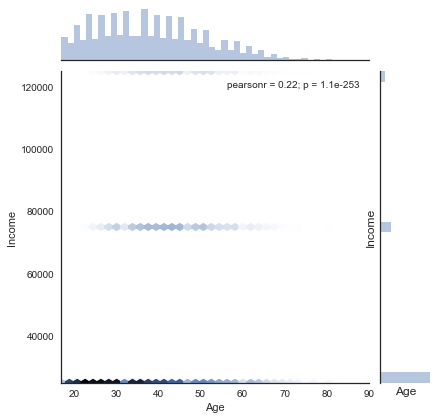

In [34]:
var_name = "Age"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(20,10))
with sns.axes_style('white'):
    sns.jointplot(x=var_name, y = 'Income', data=train_df, kind = 'hex')
plt.xlabel("Age", fontsize =12)
plt.ylabel('Income', fontsize = 12)
#plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

INFERENCE: We can easily see that, age group between 25 to 70 mainly has the income bracket spread across all the three categories Whereas the age group beyond 68 doesn't have much income spread comparitively.

Therefore, Income decreases with the age factor

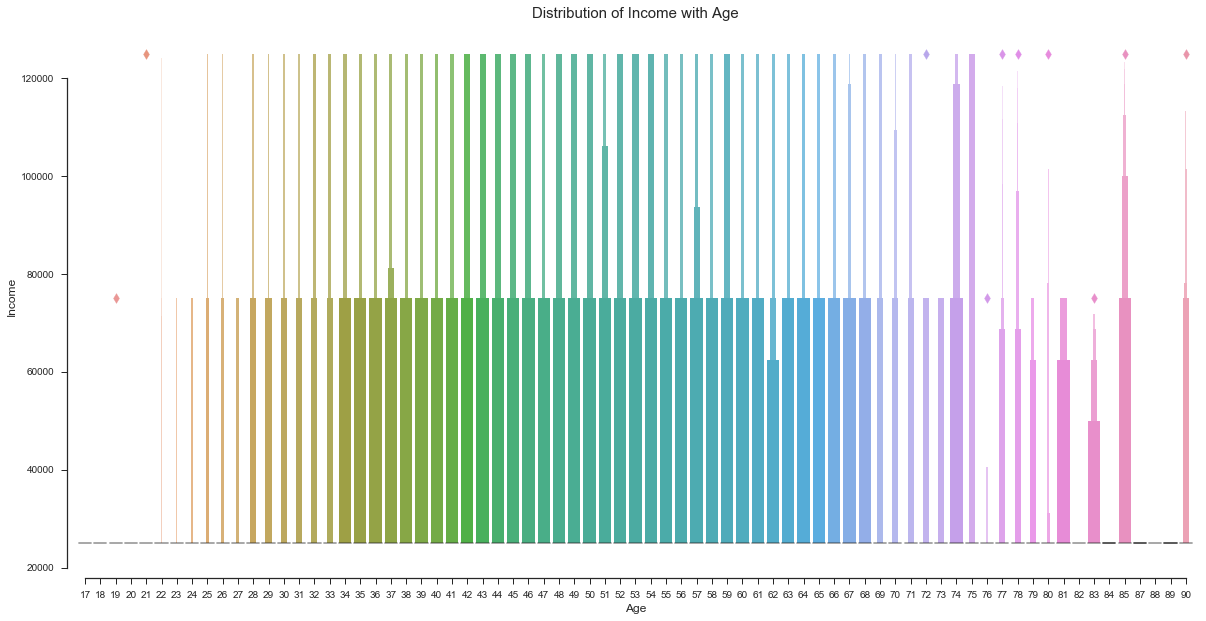

In [35]:
var_name = "Age"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(20,10))
sns.lvplot(x=var_name, y = "Income", data=train_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =12)
plt.ylabel('Income', fontsize = 12)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

INFERENCE: In a much detailed way, We can easily see that age group between 28 to 67 mainly has the income bracket of "less than 
50K, 50-100K & more than 100K". Whereas the age group beyond 68 doesn't have much income spread comparitively.

WORKCLASS

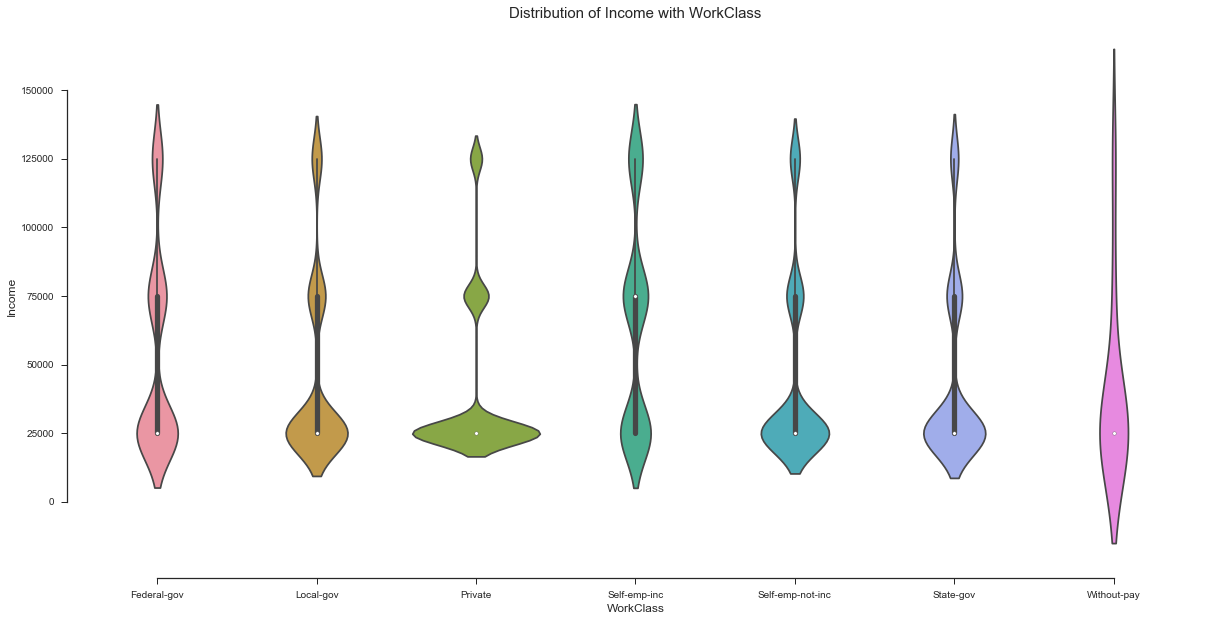

In [36]:
var_name = "WorkClass"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(20,10))
sns.violinplot(y='Income', x = var_name, data=train_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =12)
plt.ylabel('Income', fontsize = 12)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

In [37]:
train_df.loc[train_df["WorkClass"]=="Private", "Income"].value_counts()

25000     13206
75000      2583
125000     1213
Name: Income, dtype: int64

90% of the people work in "Private" and their income bracket falls under <50k as majority

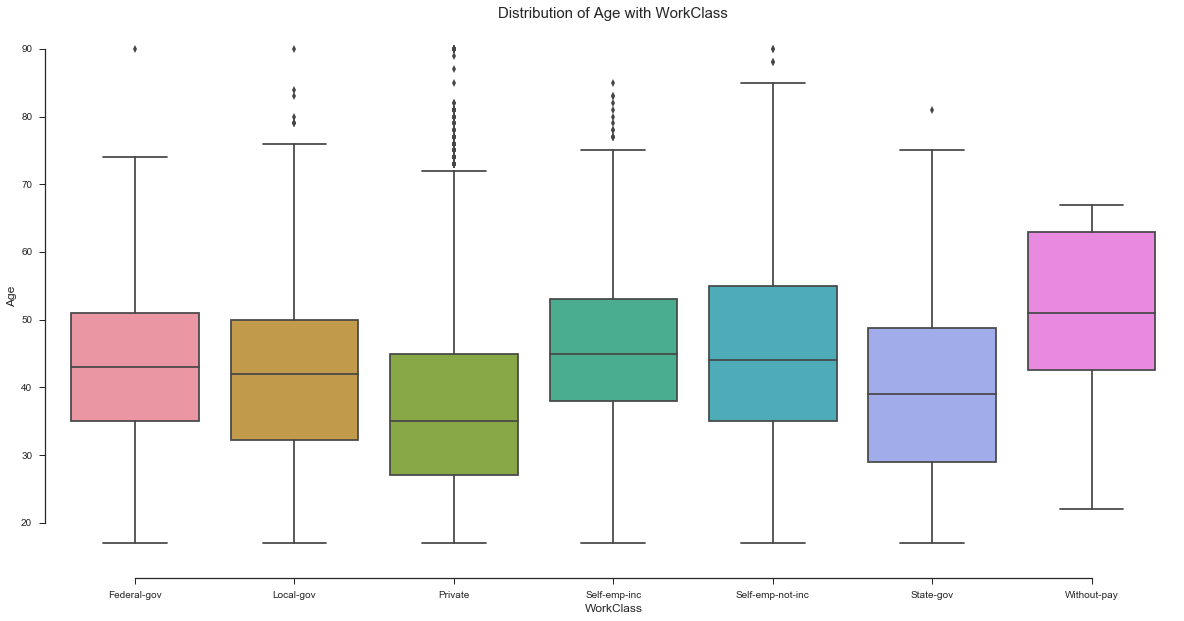

In [38]:
var_name = "WorkClass"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(20,10))
sns.boxplot(x=var_name, y = 'Age', data=train_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =12)
plt.ylabel('Age', fontsize = 12)
plt.title("Distribution of Age with " +var_name, fontsize =15 )
plt.show()

CLEARLY DEPICTS THAT WORKCLASSES- "PRIVATE" MOSTLY HAD PEOPLE OF AGE GROUP BETWEEN 27 TO 45 YEARS (MOSTLY YOUNGER PEOPLE) THAN THE OTHER CATEGORIES

EDUCATIONLEVEL

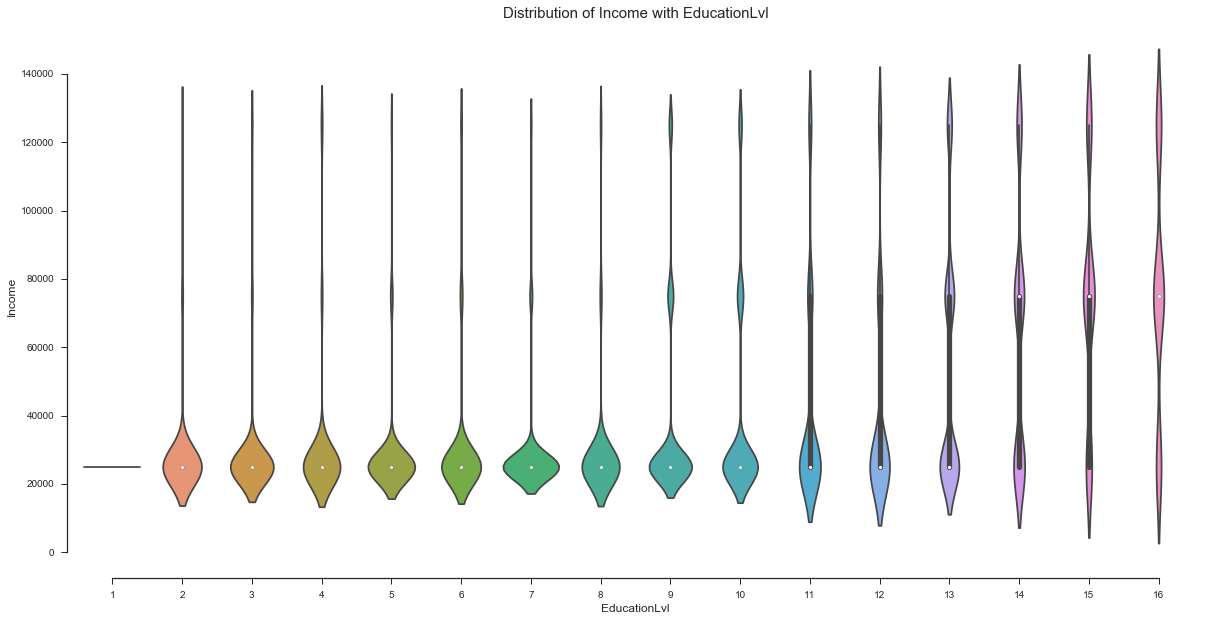

In [39]:
var_name = "EducationLvl"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(20,10))
sns.violinplot(x=var_name, y = 'Income', data=train_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =12)
plt.ylabel('Income', fontsize = 12)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

AS OBVIOUSLY SEEN, PEOPLE SALARY LEVEL DOESNT HAVE MUCH OF CHANGE OVER THEIR LEVEL OF EDUCATION BUT THE NO.OF PEOPLE DECREASES WHEN HIGHER THE EDUCATION

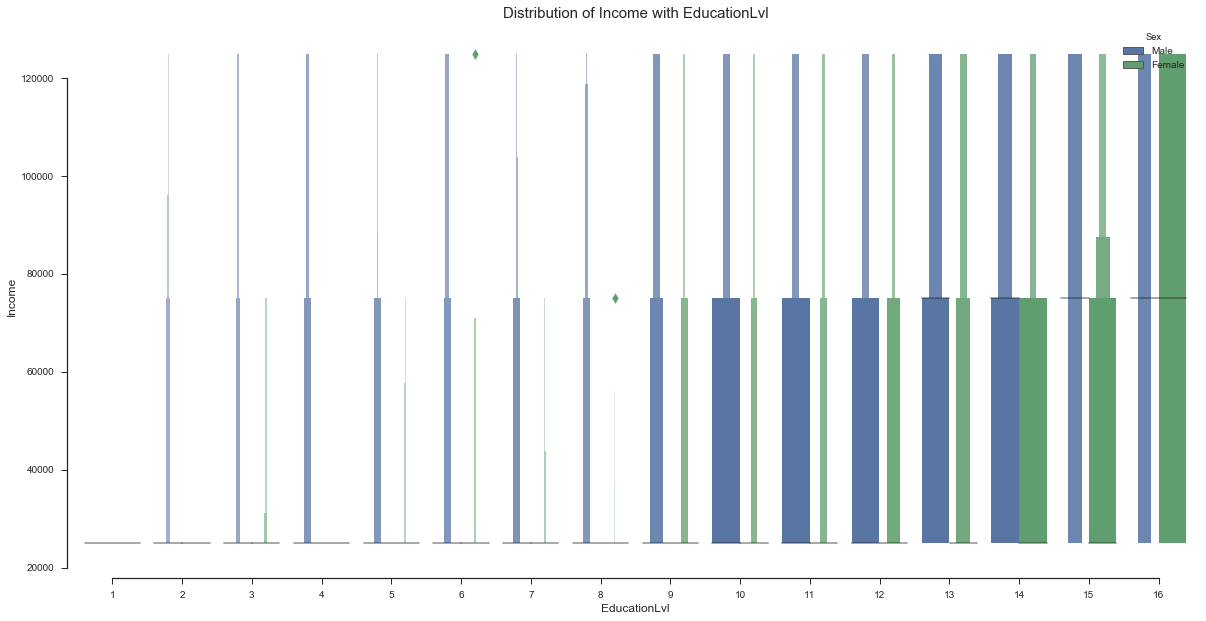

In [40]:
var_name = "EducationLvl"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(20,10))
sns.lvplot(x=var_name, y = 'Income', hue = "Sex", data=train_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =12)
plt.ylabel('Income', fontsize = 12)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

INTERESTINGLY, ON HIGHER EDUCATION LEVELS, WOMEN ARE HIGHER THAN MEN BOTH IN TERMS OF COUNT AS WELL AS INCOME BANDWIDTH

MARITAL STATUS

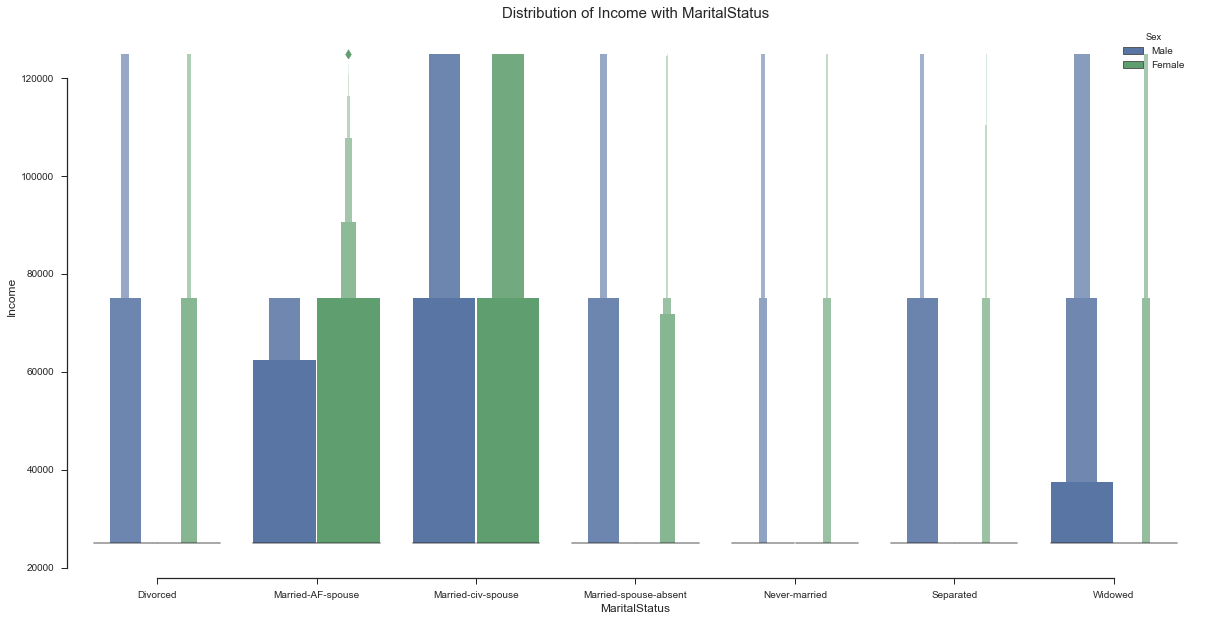

In [41]:
var_name = "MaritalStatus"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(20,10))
sns.lvplot(x=var_name, y = 'Income', hue = 'Sex', data=train_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =12)
plt.ylabel('Income', fontsize = 12)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

There are more no.of people in categories "Married-Armed Forces-Spouse (no.of women>men)" & "Married-civ-Spouse (no.of men=women)"

OCCUPATION

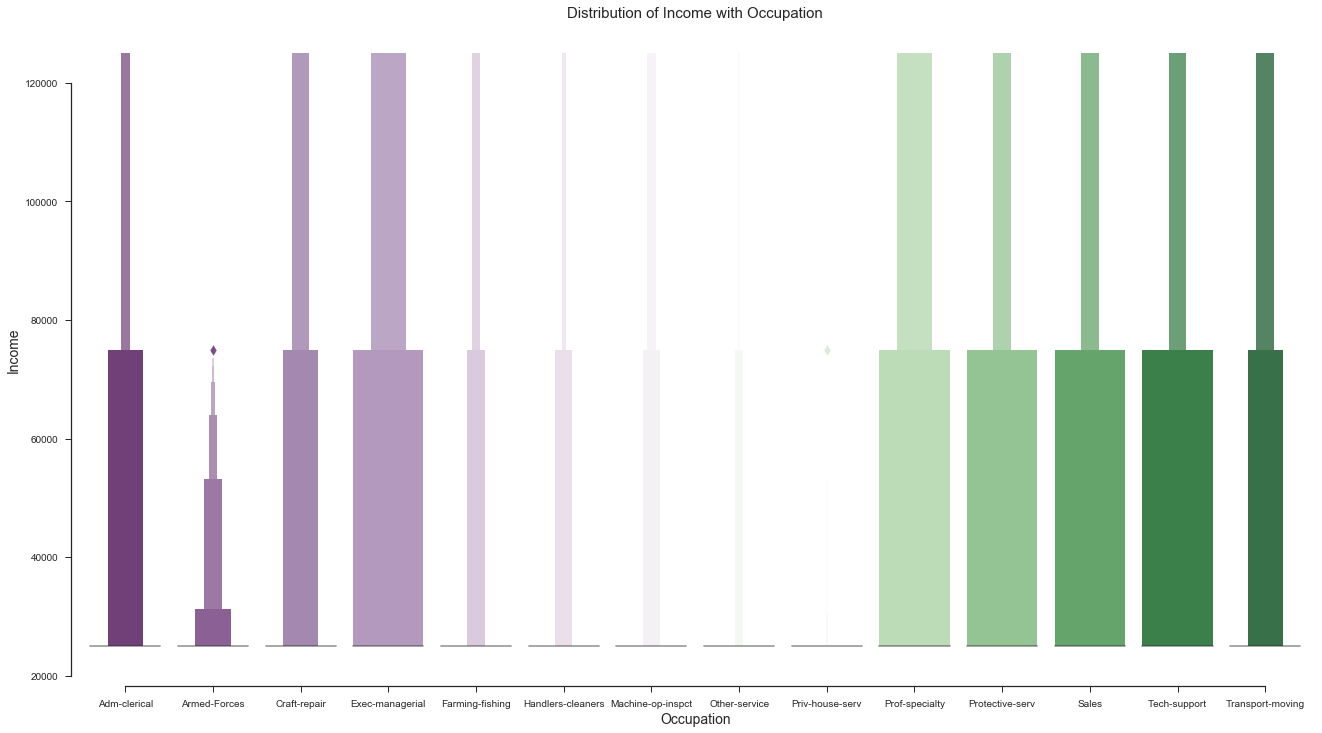

In [42]:
var_name = "Occupation"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(22,12))
sns.lvplot(x=var_name, y = 'Income', data=train_df, order =col_order, palette = "PRGn")
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

OCCUPATIONS LIKE "EXEC-MANAGERIAL", "PROF-SPECIALTY", "CRAFT-REPAIR", "PROTECTIVE-SERV", "SALES" ARE HIGH PAYING JOBS

OCCUPATIONS LIKE "TECH-SUPPORT", "ANTI-CLERICAL", "ARMED-FORCES" AND ALSO INCLUDING OTHER JOBS ARE LOW PAYING JOBS

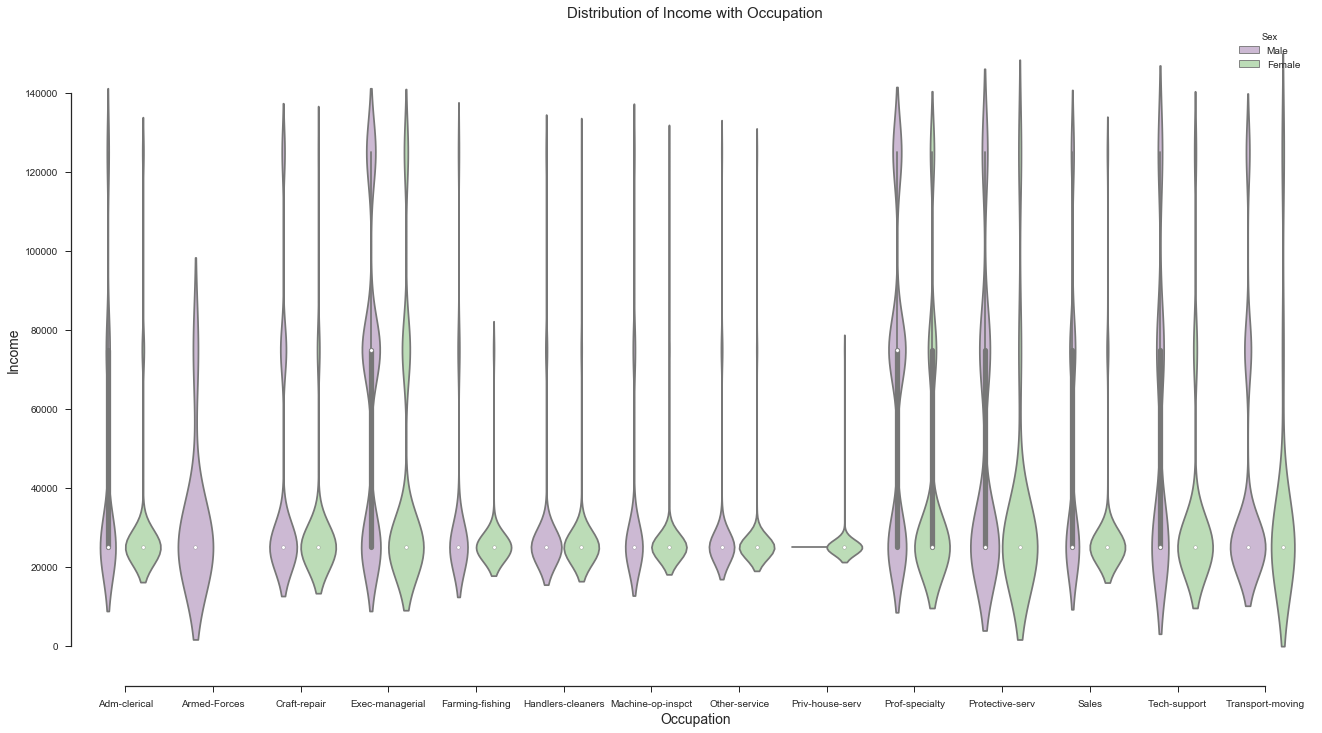

In [43]:
var_name = "Occupation"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(22,12))
sns.violinplot(x=var_name, y = 'Income', hue = "Sex", data=train_df, order =col_order, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

FROM THIS GRAPH WE CAN INFER THAT, WOMEN ARE EQUALLY WORKING IN ALMOST ALL PROFESSIONS TO MEN EXCEPT ARMED FORCES

RELATIONSHIP

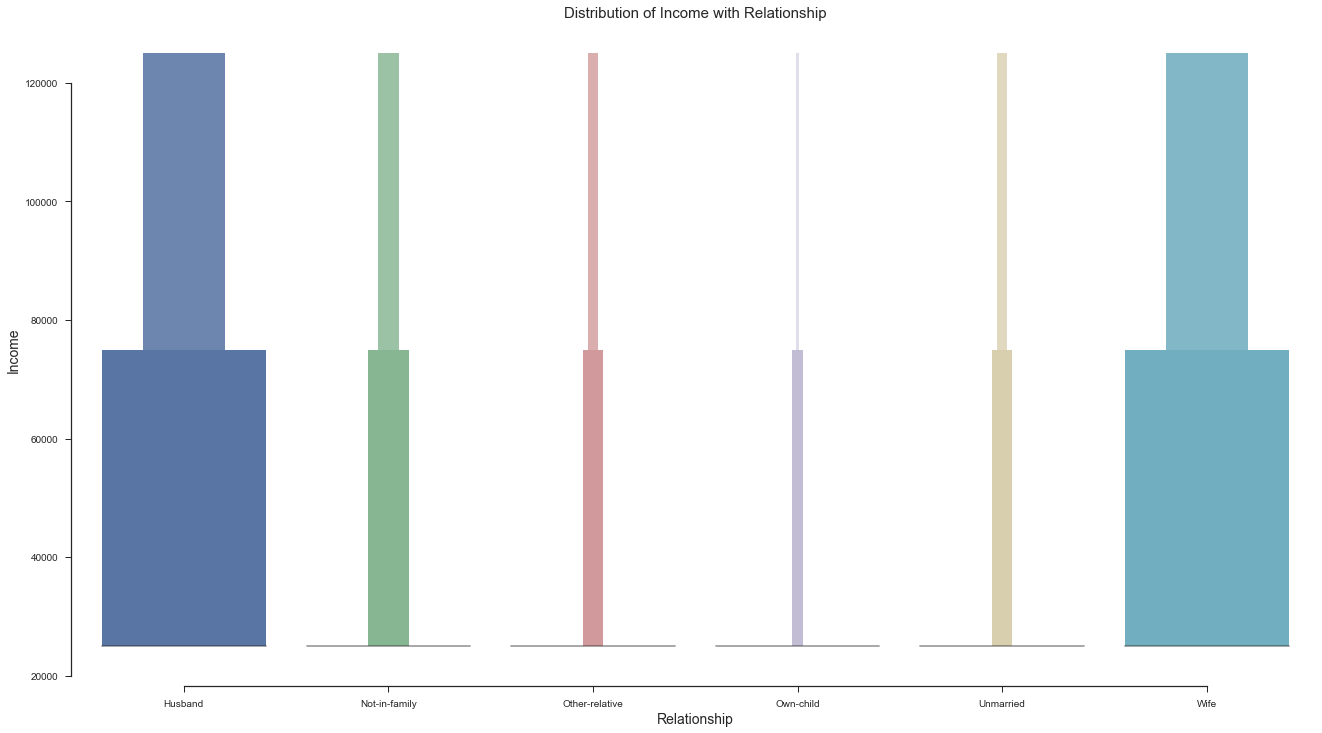

In [44]:
var_name = "Relationship"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(22,12))
sns.lvplot(x=var_name, y = 'Income', data=train_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

HUSBAND AND WIFE ARE MOST PROMINENT RELATIONSHIP STATUS WITH GOOD INCOME SPREAD. 

WHILE, ONE-CHILD & UNMARRIED ARE WITH LEAST INCOME

In [45]:
#var_name = "Relationship"
#col_order = np.sort(train_df[var_name].unique()).tolist()
#plt.figure(figsize =(22,12))
#sns.lvplot(x=var_name, y = 'Income', hue ="Sex", data=train_df, order =col_order)
#plt.xlabel(var_name, fontsize =14)
#plt.ylabel('y', fontsize = 14)
#plt.title("Distribution of Income with " +var_name, fontsize =15 )
#plt.show()

RACE

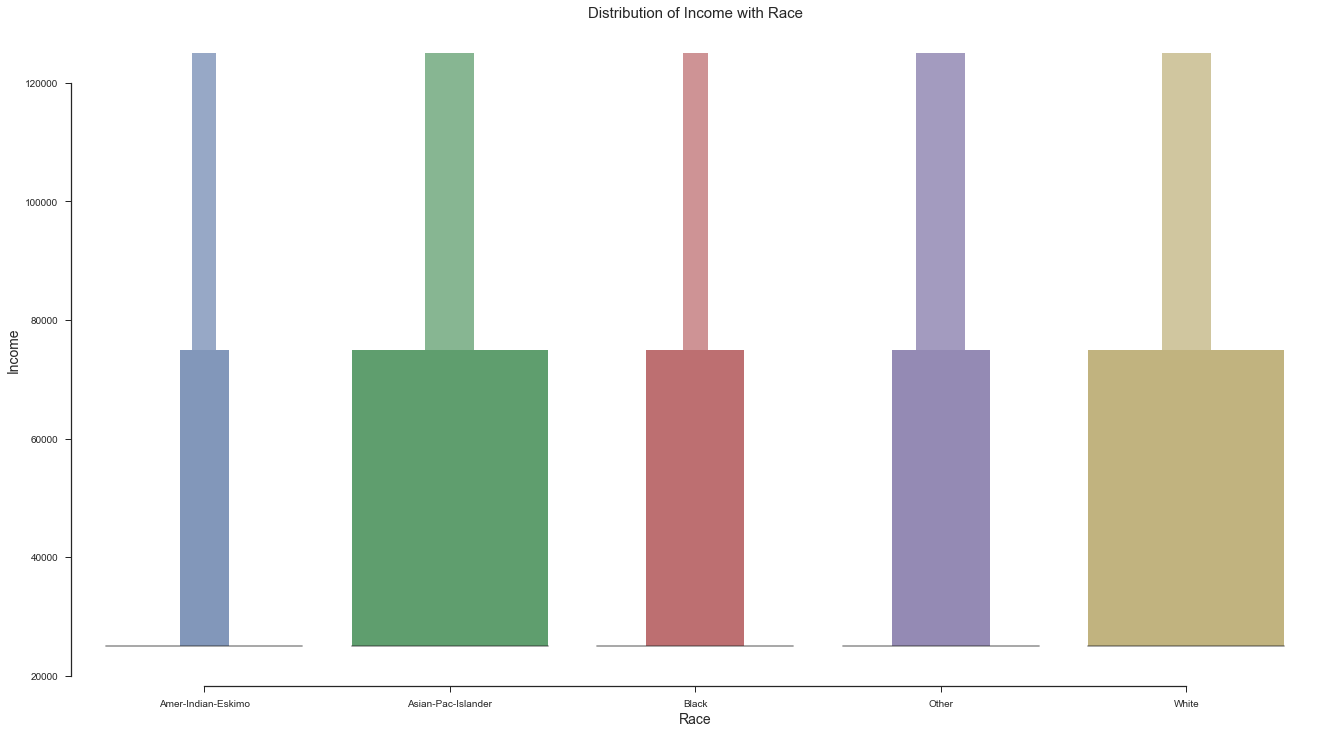

In [46]:
var_name = "Race"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(22,12))
sns.lvplot(x=var_name, y = 'Income', data=train_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

'WHITE' AND 'ASIAN-PAC-ISLANDER' WERE MOST PROMINENT WITH 'BLACK' RACE BEING THE LEAST

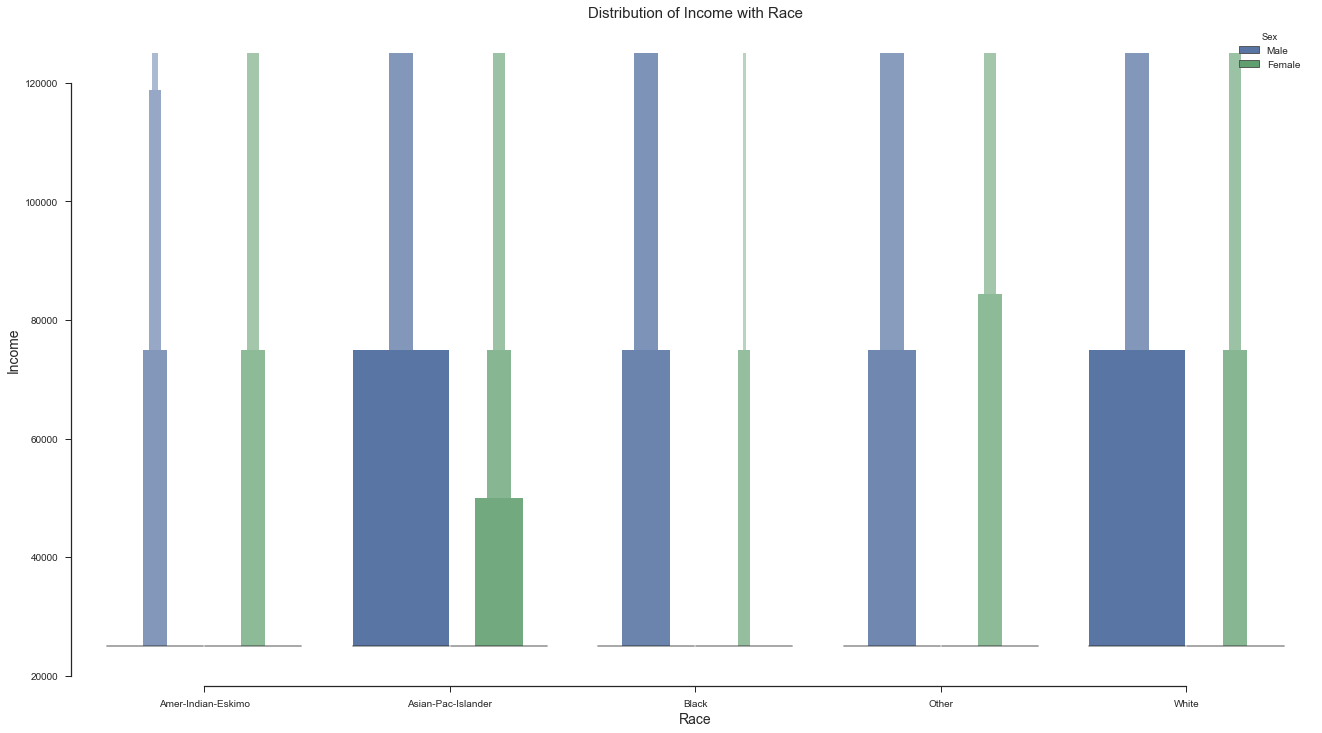

In [47]:
var_name = "Race"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(22,12))
sns.lvplot(x=var_name, y = 'Income', hue = "Sex", data=train_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

THIS SHOWS THAT NO. OF MALES WERE HIGHER IN ALL THE RACES THAN NO. OF FEMALES

GENDER DISTRIBUTION FOR INCOME

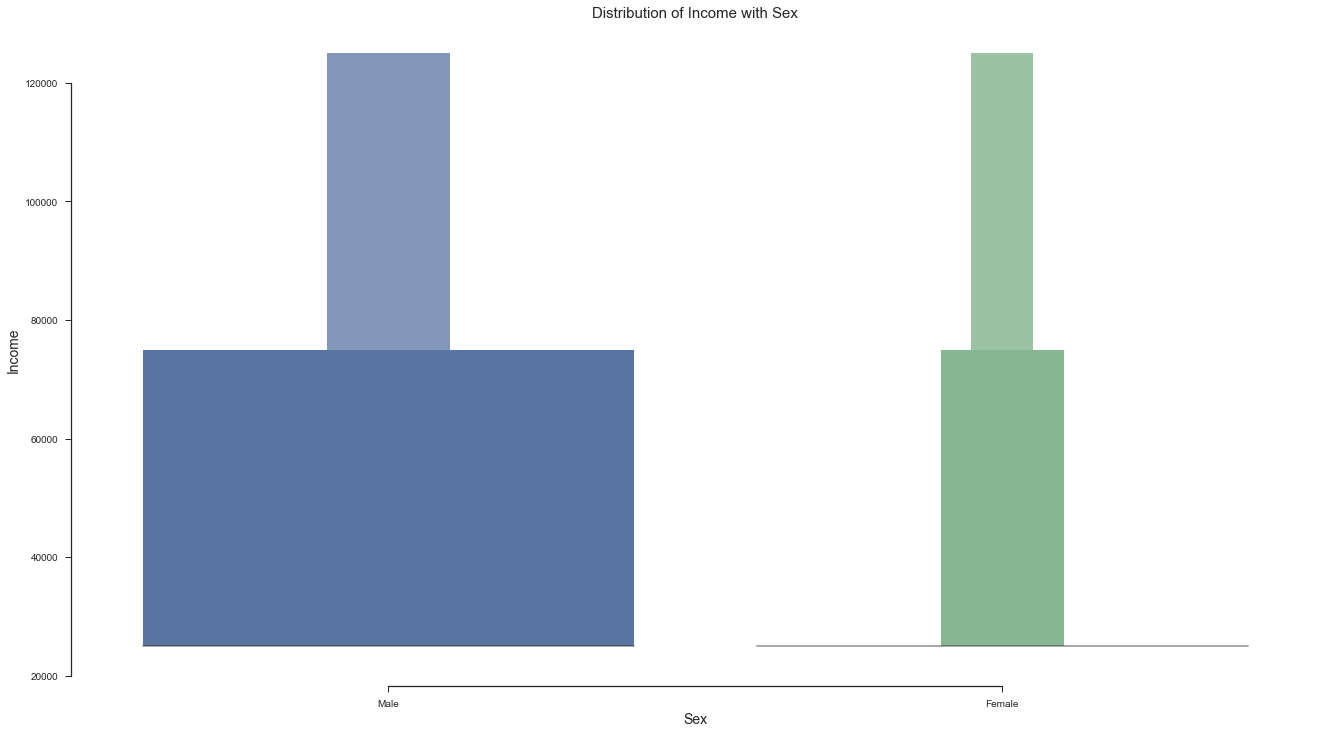

In [48]:
var_name = "Sex"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(22,12))
sns.lvplot(x=var_name, y = 'Income', data=train_df)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

HOURS PER WEEK

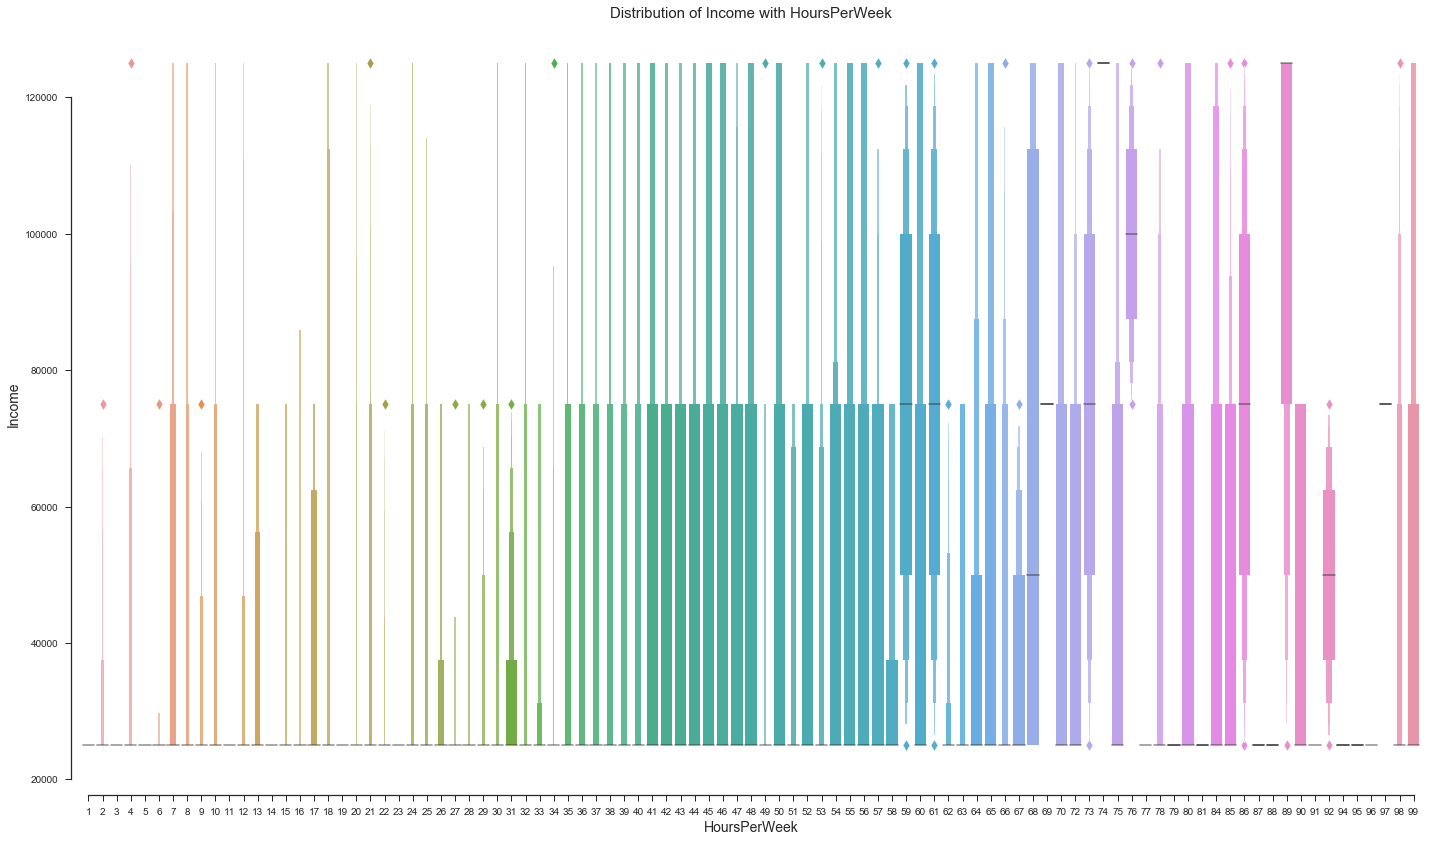

In [49]:
var_name = "HoursPerWeek"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(24,14))
sns.lvplot(x=var_name, y = 'Income', data=train_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

Even though we cannot establish a proper relation between hours per week and income from the above plot, 

we can see that, less no. of people are working less than 40 hours

and people working between 40 hours - 85 hours a week are more and are spread across all levels of income

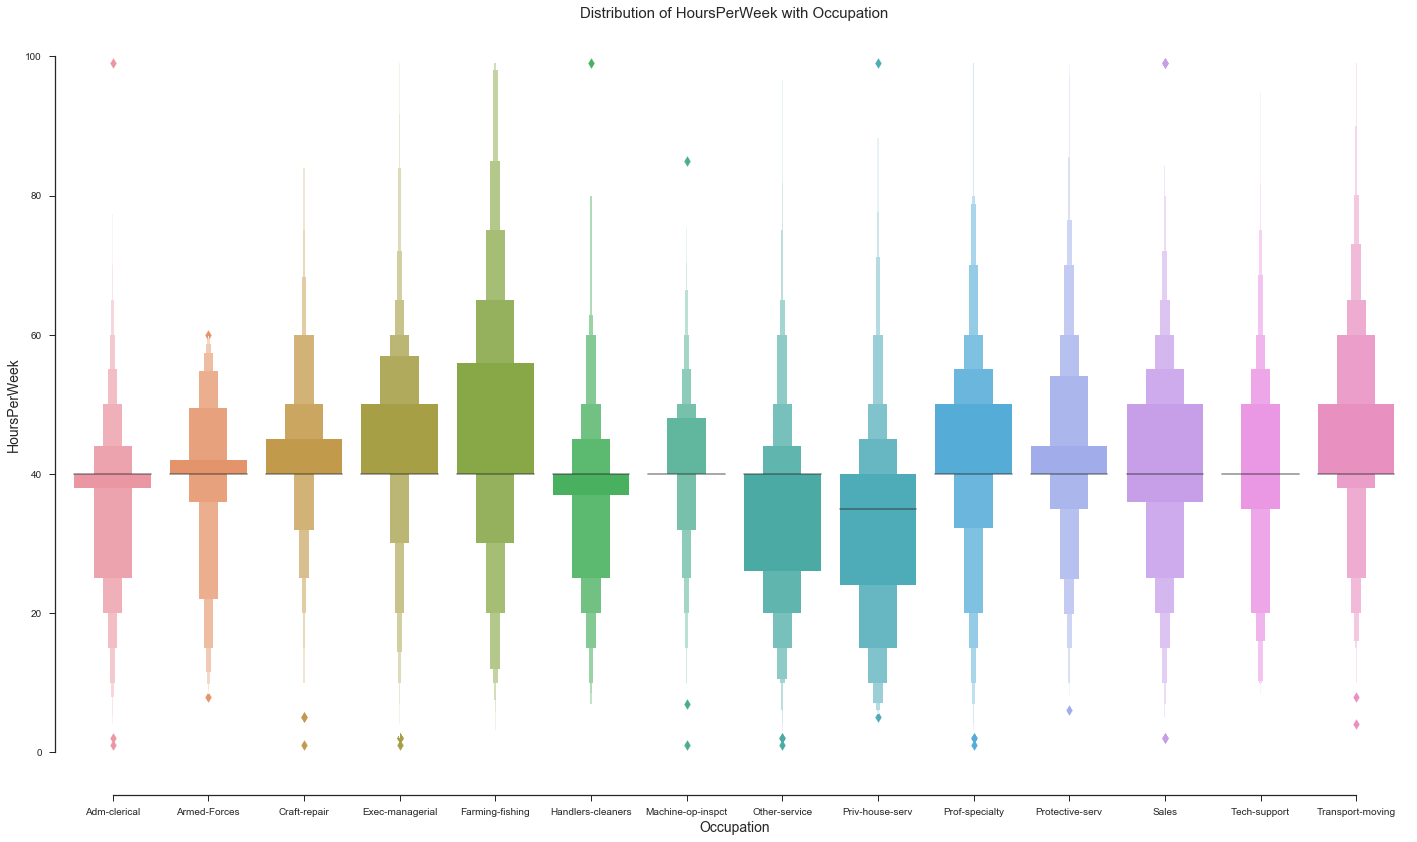

In [50]:
var_name = "Occupation"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(24,14))
sns.lvplot(x=var_name, y = 'HoursPerWeek', data=train_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('HoursPerWeek', fontsize = 14)
plt.title("Distribution of HoursPerWeek with " +var_name, fontsize =15 )
plt.show()

JOBS LIKE FARMING-FISHING, PROTECTIVE-SERV AND SALES INCLUDES MORE HOURS BUT NO PAYING HIGHER INCOME UNLIKE PROF-SPECIALITY & EXEC-MANAGERIAL EVEN THOUGH THEY WORK LESSER HOURS PER WEEK THAN THE FORMER

WE CAN ALSO SEE SOME OUTLIERS IN ADMN-CLERICAL, MACHINE-OP-INSPECT, PIV-HOUSE-SERV WITH HIGH WORKING HOURS OF UPTO 100 HOURS

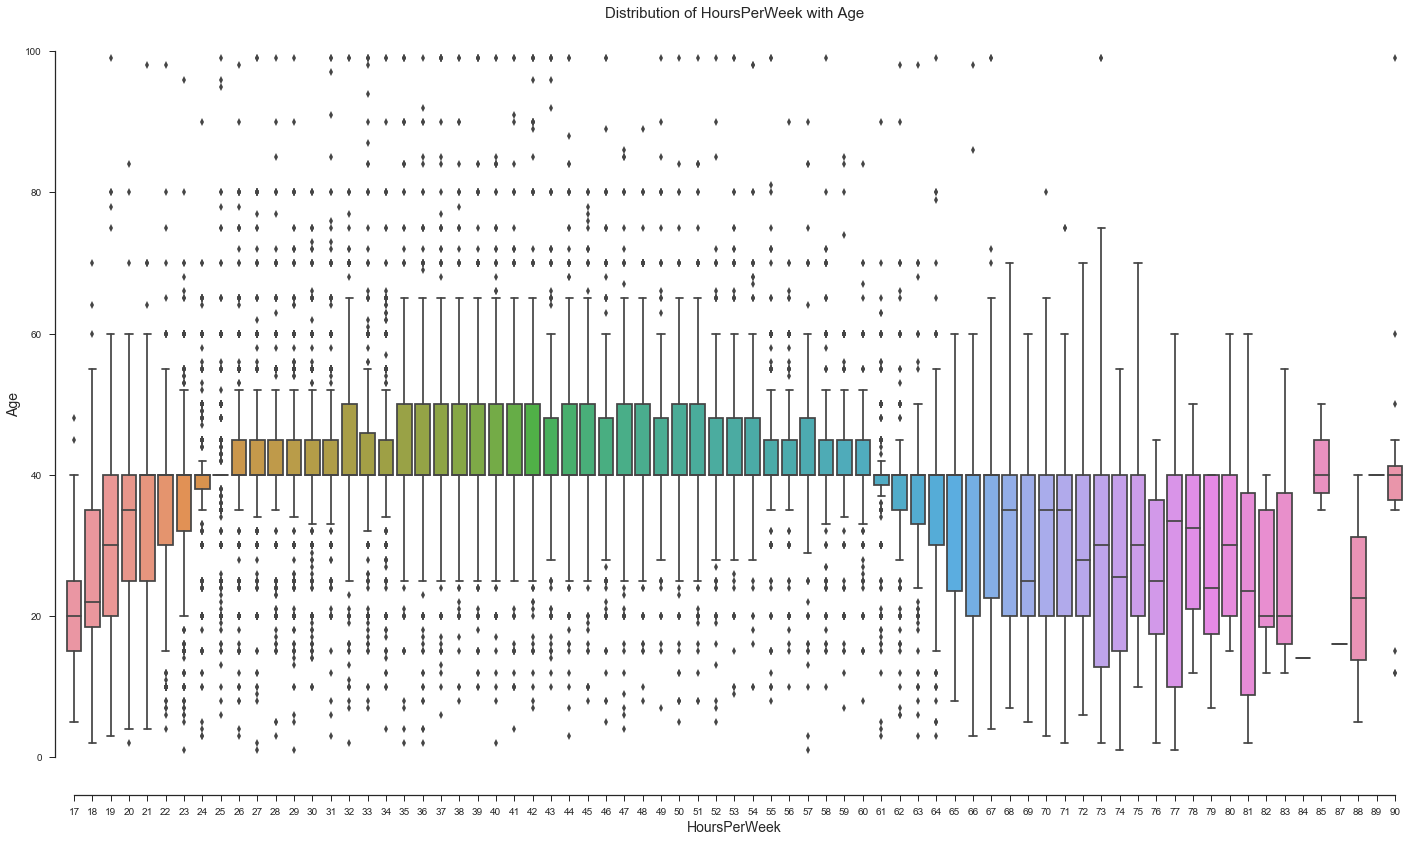

In [51]:
var_name = "Age"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(24,14))
sns.boxplot(x=var_name, y='HoursPerWeek', data=train_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.ylabel(var_name, fontsize =14)
plt.xlabel('HoursPerWeek', fontsize = 14)
plt.title("Distribution of HoursPerWeek with " +var_name, fontsize =15 )
plt.show()

WE CAN SEE THAT PEOPLE OF YOUNGER AGE TENDS TO WORK MORE HOURS THAN THE OLDER AGE GROUP

NATIVE COUNTRY

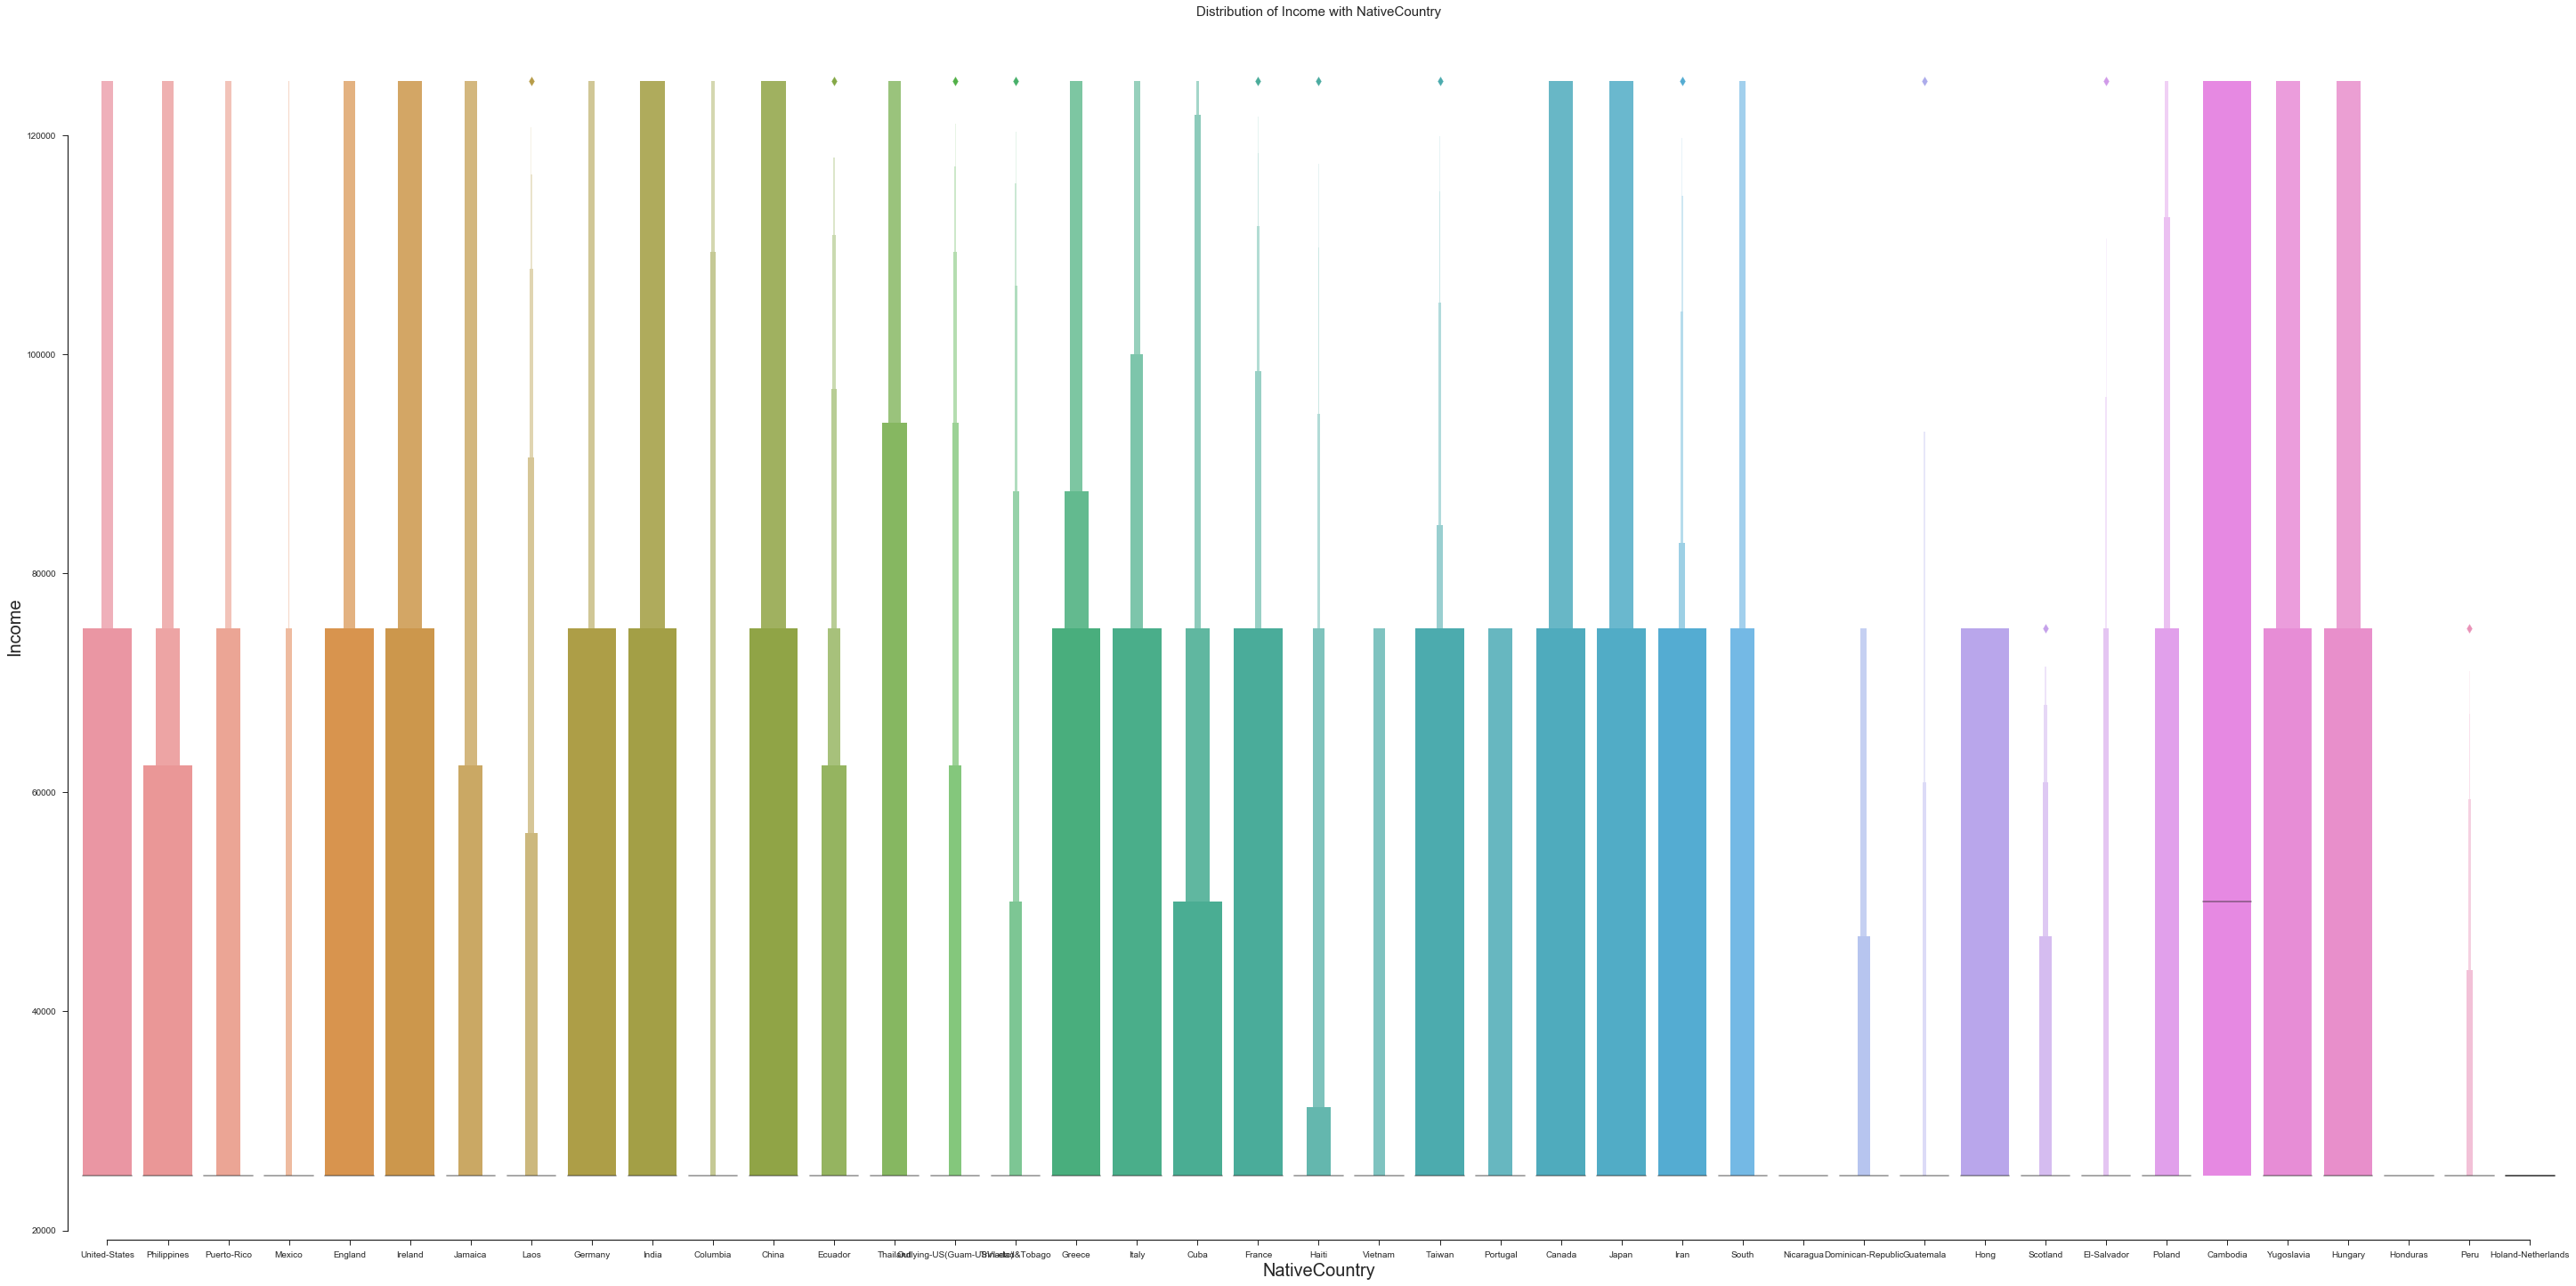

In [52]:
var_name = "NativeCountry"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(50,25))
sns.lvplot(x=var_name, y = 'Income', data=train_df)#, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =20)
plt.ylabel('Income', fontsize = 20)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

# CORRELATION BETWEEN VARIABLES

In [53]:
"""Z = train_df.apply(LabelEncoder().fit_transform)
corr = Z.corr().abs()
plt.figure(figsize =(12,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()"""

'Z = train_df.apply(LabelEncoder().fit_transform)\ncorr = Z.corr().abs()\nplt.figure(figsize =(12,8))\nsns.heatmap(corr, \n        xticklabels=corr.columns,\n        yticklabels=corr.columns)\nplt.show()'

WE CAN SEE THAT, 

1. SEX AND RELATIONSHIP
2. AGE AND RELATIONSHIP
3. AGE AND MARITAL STATUS
4. MARITAL STATUS AND HOURS PER WEEK
5. RELATIONSHIP AND HOURS PER WEEK
6. SEX AND HOURS PER WEEK
7. EDUCATION LEVEL AND CAPTIAL GAIN
8. RELATIONSHIP AND MARITAL STATUS

THESE ARE IDENTIFED BASED ON THE HEAT MAP AS THE TOP CORRELATED VARIABLES IN THE DATASET

In [54]:
"""# To remove the redundant pairs from the list

def get_redundant_pairs(Z):
#    Gets the redundant pairs from the correlation matrix
    pairs_to_drop = set()
    cols = Z.columns
    for i in range (0, Z.shape[1]):
        for j in range (0,i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# To get the absolute correlation between the variables
# Absolute correlation usually ranges from +1 to -1. Where +1 indicates the highest correlation between variables and viceversa
# This is called Pearson Correlation coefficient that depends on covariance and standard deviations of variables

def get_top_abs_correlations(df, n=15):
    z_corr = Z.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(Z)
    z_corr = z_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
    return z_corr [0:n]"""

'# To remove the redundant pairs from the list\n\ndef get_redundant_pairs(Z):\n#    Gets the redundant pairs from the correlation matrix\n    pairs_to_drop = set()\n    cols = Z.columns\n    for i in range (0, Z.shape[1]):\n        for j in range (0,i+1):\n            pairs_to_drop.add((cols[i], cols[j]))\n    return pairs_to_drop\n\n# To get the absolute correlation between the variables\n# Absolute correlation usually ranges from +1 to -1. Where +1 indicates the highest correlation between variables and viceversa\n# This is called Pearson Correlation coefficient that depends on covariance and standard deviations of variables\n\ndef get_top_abs_correlations(df, n=15):\n    z_corr = Z.corr().abs().unstack()\n    labels_to_drop = get_redundant_pairs(Z)\n    z_corr = z_corr.drop(labels = labels_to_drop).sort_values(ascending = False)\n    return z_corr [0:n]'

In [55]:
"""# To get the absolute correlation between the variables
# Absolute correlation usually ranges from +1 to -1. Where +1 indicates the highest correlation between variables and viceversa
# This is called Pearson Correlation coefficient that depends on covariance and standard deviations of variables

#def get_top_abs_correlations(df, n=15):
#    z_corr = Z.corr().abs().unstack()
#    labels_to_drop = get_redundant_pairs(Z)
#    z_corr = z_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
#    return z_corr [0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(Z, 10))"""

'# To get the absolute correlation between the variables\n# Absolute correlation usually ranges from +1 to -1. Where +1 indicates the highest correlation between variables and viceversa\n# This is called Pearson Correlation coefficient that depends on covariance and standard deviations of variables\n\n#def get_top_abs_correlations(df, n=15):\n#    z_corr = Z.corr().abs().unstack()\n#    labels_to_drop = get_redundant_pairs(Z)\n#    z_corr = z_corr.drop(labels = labels_to_drop).sort_values(ascending = False)\n#    return z_corr [0:n]\n\nprint("Top Absolute Correlations")\nprint(get_top_abs_correlations(Z, 10))'

# TESTING DATA ANALYSIS

# 01. Importing the dataset

In [56]:
test_df = pd.read_csv("income_testing.csv")
#test_df.head()
test_df.shape

(12211, 15)

In [57]:
test_df["Income"] = " "
test_df.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
0,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,50-100K,
1,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,<50K,
2,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<50K,
3,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,<50K,
4,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,<50K,


In [58]:
for i in range (len(test_df.IncomeBracket)):
    if test_df.IncomeBracket[i] =="<50K":
        test_df.Income[i] = 25000
    elif test_df.IncomeBracket[i] =="50-100K":
        test_df.Income[i] = 75000
    elif test_df.IncomeBracket[i] ==">100K":
        test_df.Income[i] = 125000

In [59]:
test_df.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
0,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,50-100K,75000
1,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,<50K,25000
2,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<50K,25000
3,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,<50K,25000
4,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,<50K,25000


In [60]:
test_df["Income"].value_counts()
y = test_df["Income"]
#y.value_counts()

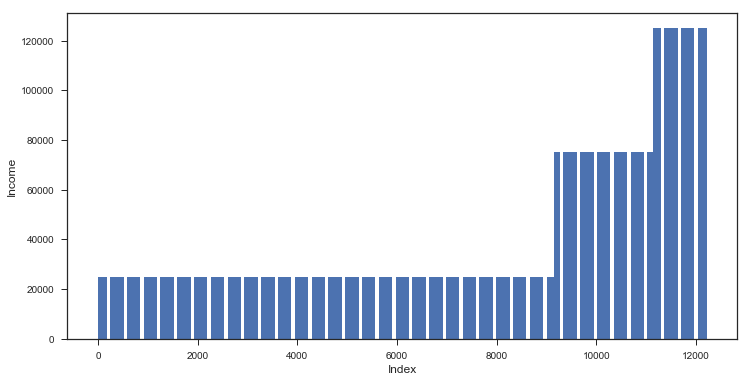

In [61]:
plt.figure(figsize = (12,6))
plt.bar(range(test_df.shape[0]), np.sort(y.values))
plt.xlabel("Index", fontsize = 12)
plt.ylabel("Income", fontsize = 12)
plt.show()

# INFERENCE

Similar to the training set, testing set also has most people falling under the income bracket of less than 50k and some under 50 to 100K and more than 100K

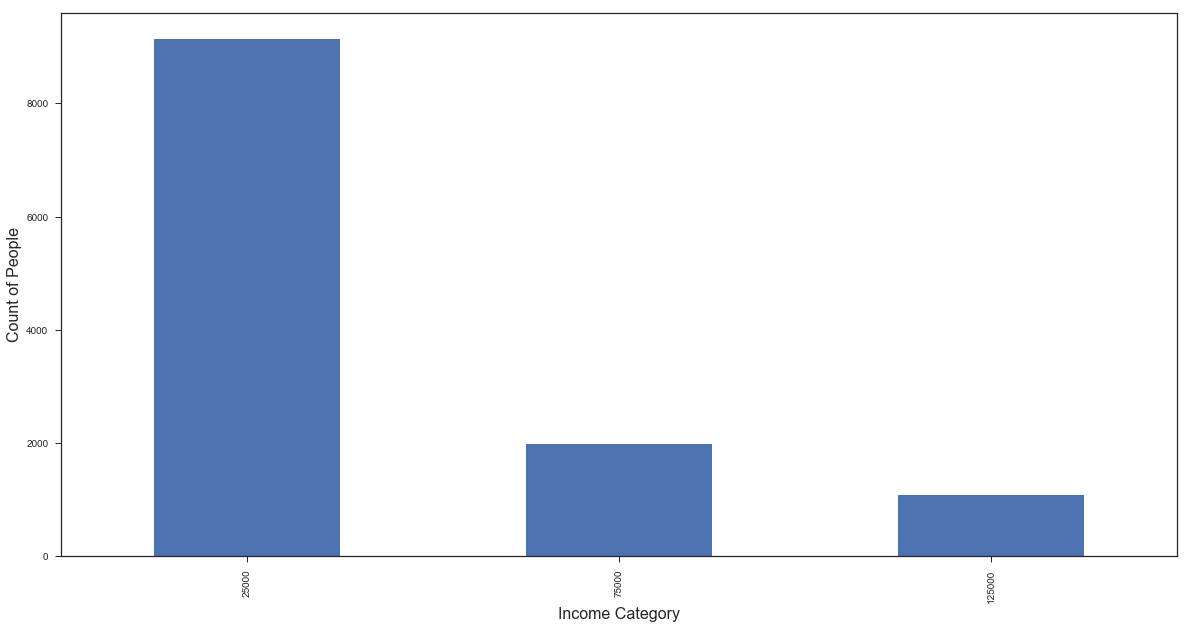

In [62]:
g = test_df["Income"].value_counts()
plt.figure(figsize=(20,10))
g.plot(kind='bar')
plt.xlabel('Income Category', fontsize = 16)
plt.ylabel('Count of People', fontsize = 16)
plt.show()

# INFERENCE

Similar to the training set, testing set also has most people falling under the income bracket of less than 50k and some under 50 to 100K and more than 100K

# DETECTING MISSING VALUES IN TESTING DATASET

In [63]:
test_df.isnull().sum(axis=0)

Age                0
WorkClass        688
FinalWeight        0
Education          0
EducationLvl       0
MaritalStatus      0
Occupation       690
Relationship       0
Race               0
Sex                0
CapitalGain        0
CapitalLoss        0
HoursPerWeek       0
NativeCountry    225
IncomeBracket      0
Income             0
dtype: int64

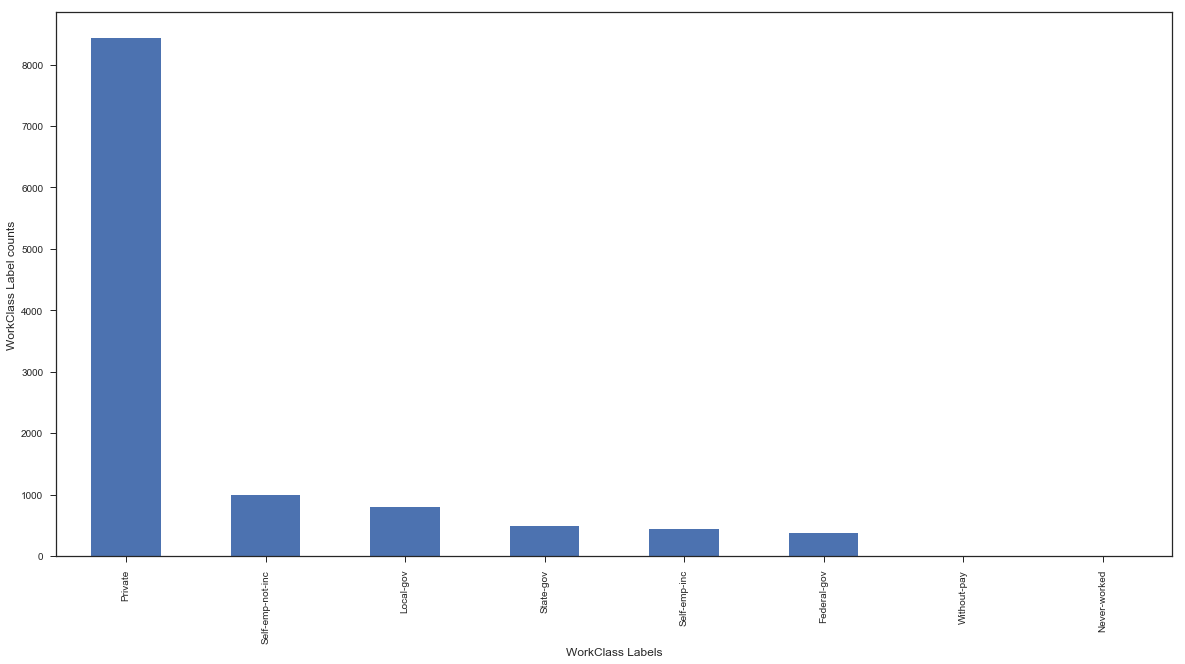

In [64]:
a = test_df['WorkClass'].value_counts()
plt.figure(figsize=(20,10))
a.plot(kind = 'bar')
plt.xlabel("WorkClass Labels", fontsize =12)
plt.ylabel("WorkClass Label counts", fontsize =12)
plt.show()

Similar to the training set, testing dataset has "Private" as the highest frequent category


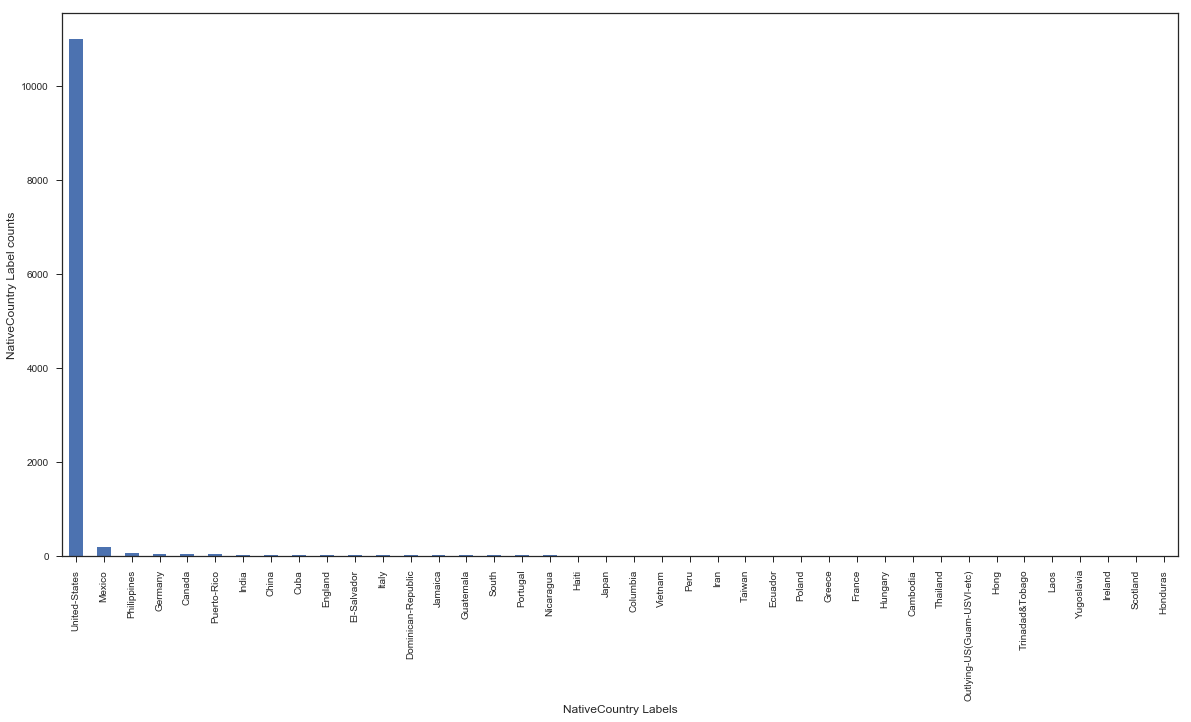

In [65]:
b = test_df['NativeCountry'].value_counts()
plt.figure(figsize=(20,10))
b.plot(kind = 'bar')
plt.xlabel("NativeCountry Labels", fontsize =12)
plt.ylabel("NativeCountry Label counts", fontsize =12)
plt.show()

Similar to Training set, Testing set has "United States" as the most dominant country among the people

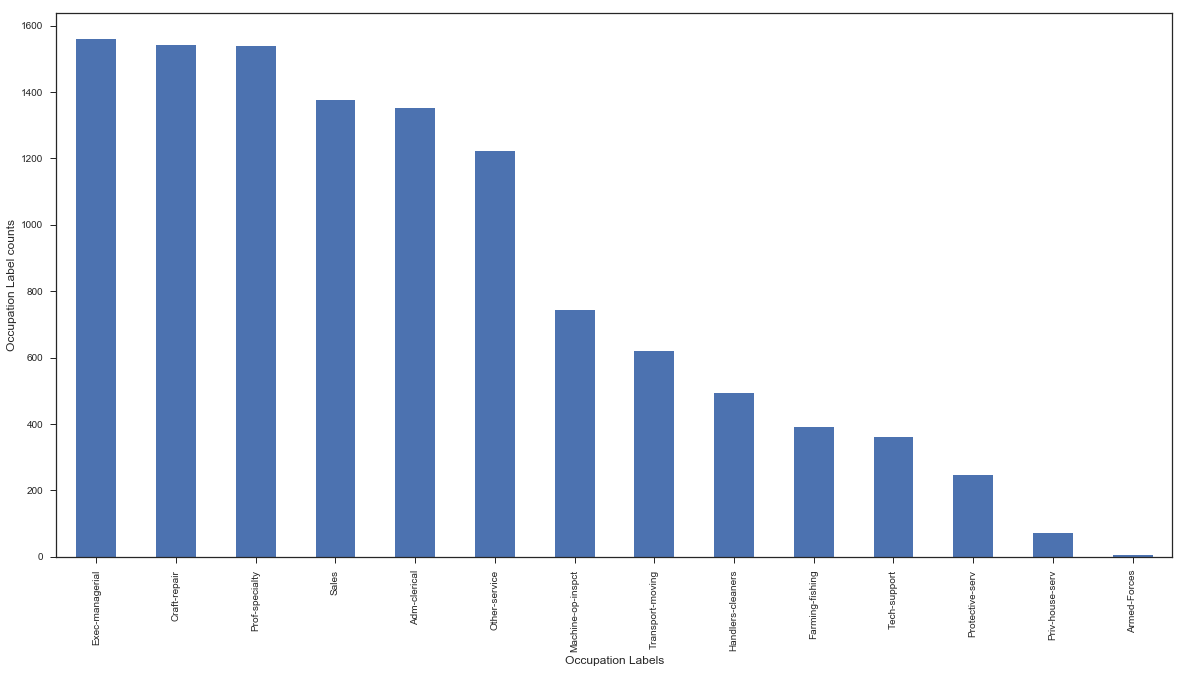

In [66]:
c = test_df["Occupation"].value_counts()
plt.figure(figsize=(20,10))
c.plot(kind = 'bar')
plt.xlabel("Occupation Labels", fontsize =12)
plt.ylabel("Occupation Label counts", fontsize =12)
plt.show()

Again, we can see that top 6 categories have similar spread of values in "Occupation" similar to Training dataset

# Missing value Strategy

For the above two categories- "WorkClass" & "NativeCountry", we are gonna fill them with "Most Frequent" category for the missing values

Why? Because, filling the missing values with most_frequent values doesn't change the NATURE OF THE DISTRIBUTION

In [67]:
test_df = test_df.fillna({"WorkClass":"Private"})
test_df = test_df.fillna({"NativeCountry":"United-States"})

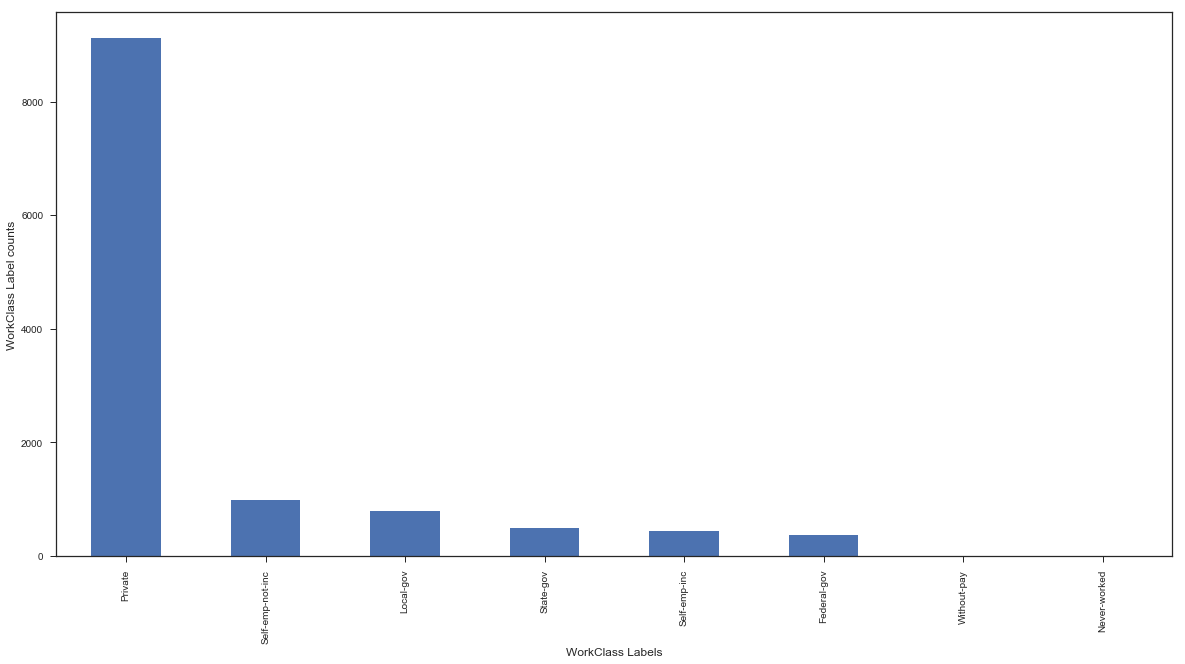

In [68]:
a = test_df['WorkClass'].value_counts()
plt.figure(figsize=(20,10))
a.plot(kind = 'bar')
plt.xlabel("WorkClass Labels", fontsize =12)
plt.ylabel("WorkClass Label counts", fontsize =12)
plt.show()

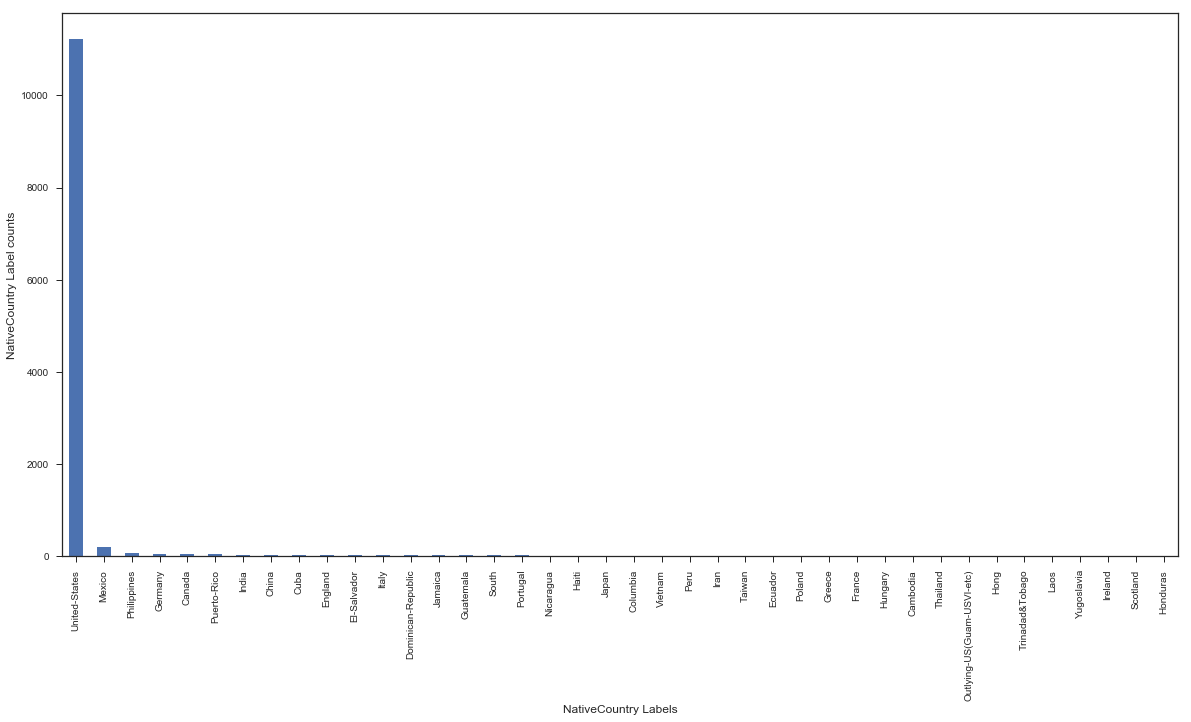

In [69]:
b = test_df['NativeCountry'].value_counts()
plt.figure(figsize=(20,10))
b.plot(kind = 'bar')
plt.xlabel("NativeCountry Labels", fontsize =12)
plt.ylabel("NativeCountry Label counts", fontsize =12)
plt.show()

From the above graphs, after filling the missing values, we can see that distribution curve is unaffected

In [70]:
test_df.isnull().sum(axis=0)

Age                0
WorkClass          0
FinalWeight        0
Education          0
EducationLvl       0
MaritalStatus      0
Occupation       690
Relationship       0
Race               0
Sex                0
CapitalGain        0
CapitalLoss        0
HoursPerWeek       0
NativeCountry      0
IncomeBracket      0
Income             0
dtype: int64

SIMILAR TO TRAINING DATASET, OCCUPATION CANNOT BE IMPUTED WITH MOST FREQUENT / NUMERICAL METHOD SINCE IT WILL DISTORT THE DATASET AND THE OUTPUT DURING MODEL EVALUATION. HENCE, DROPPING THE ROWS AS WE DID BEFORE

In [71]:
test_df = test_df.dropna()
test_df.isnull().sum(axis=0)

Age              0
WorkClass        0
FinalWeight      0
Education        0
EducationLvl     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
IncomeBracket    0
Income           0
dtype: int64

FINALLY, THERE ARE NO MISSING VALUES IN THE DATASET-TESTING

In [72]:
print("\nThe shape of testing dataset:", test_df.shape)
print("\nTesting dataset is:\n\n")
test_df.head()


The shape of testing dataset: (11521, 16)

Testing dataset is:




,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
0,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,50-100K,75000
1,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,<50K,25000
2,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<50K,25000
3,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,<50K,25000
4,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,<50K,25000


In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11521 entries, 0 to 12210
Data columns (total 16 columns):
Age              11521 non-null int64
WorkClass        11521 non-null object
FinalWeight      11521 non-null int64
Education        11521 non-null object
EducationLvl     11521 non-null int64
MaritalStatus    11521 non-null object
Occupation       11521 non-null object
Relationship     11521 non-null object
Race             11521 non-null object
Sex              11521 non-null object
CapitalGain      11521 non-null int64
CapitalLoss      11521 non-null int64
HoursPerWeek     11521 non-null int64
NativeCountry    11521 non-null object
IncomeBracket    11521 non-null object
Income           11521 non-null object
dtypes: int64(6), object(10)
memory usage: 1.5+ MB


In [74]:
test_df.describe()

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek
count,11521.000000,1.152100e+04,11521.000000,11521.000000,11521.000000,11521.000000
mean,38.776061,1.877606e+05,10.155629,1242.563319,89.425397,41.001128
std,13.210122,1.048067e+05,2.526594,8181.368253,406.781721,11.943846
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.164420e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.773800e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.348800e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,3900.000000,99.000000


In [75]:
test_df["Income"] = pd.to_numeric(test_df["Income"], errors = "coerce")

# Testing dataset is ready for analysis

# EXPLORATORY ANALYSIS- INCOME_TESTING

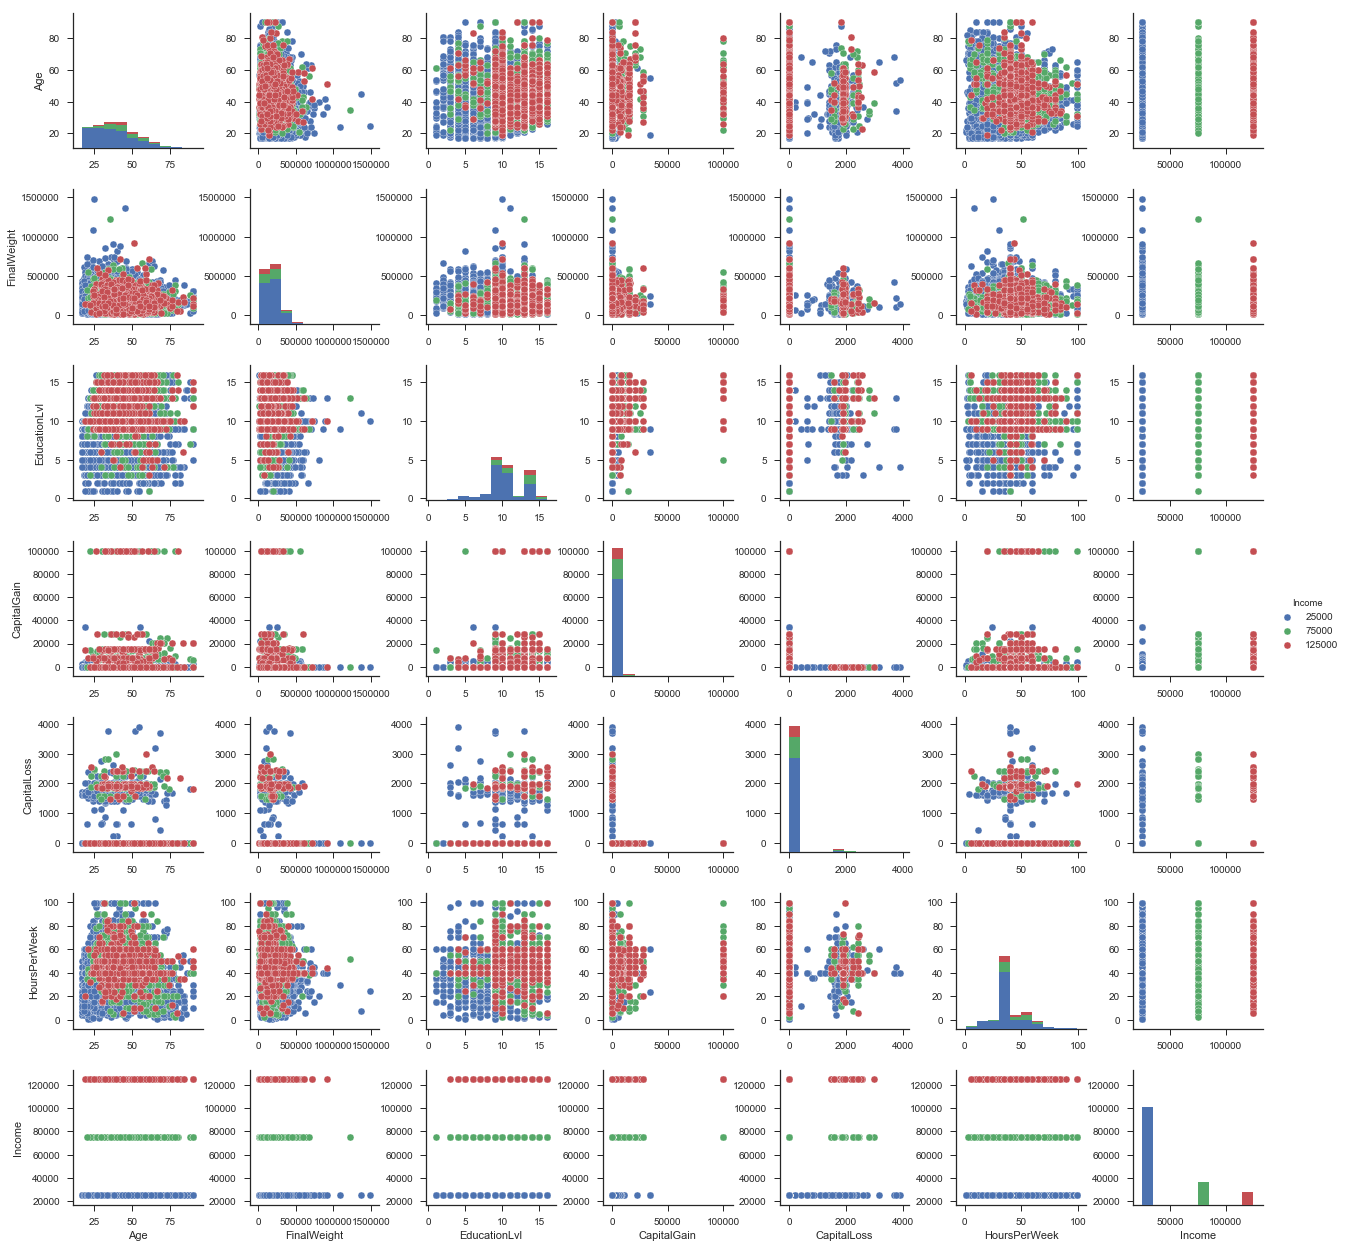

In [76]:
# Using SEABORN pair plot to get the visualization of various numerical values in the entire dataframe

plt.figure(figsize =(20,10))
sns.set(style="ticks")
sns.pairplot(test_df, hue = "Income")
plt.show()

### Let us look at the each variable separately to have a better conclusion about the dataset

AGE

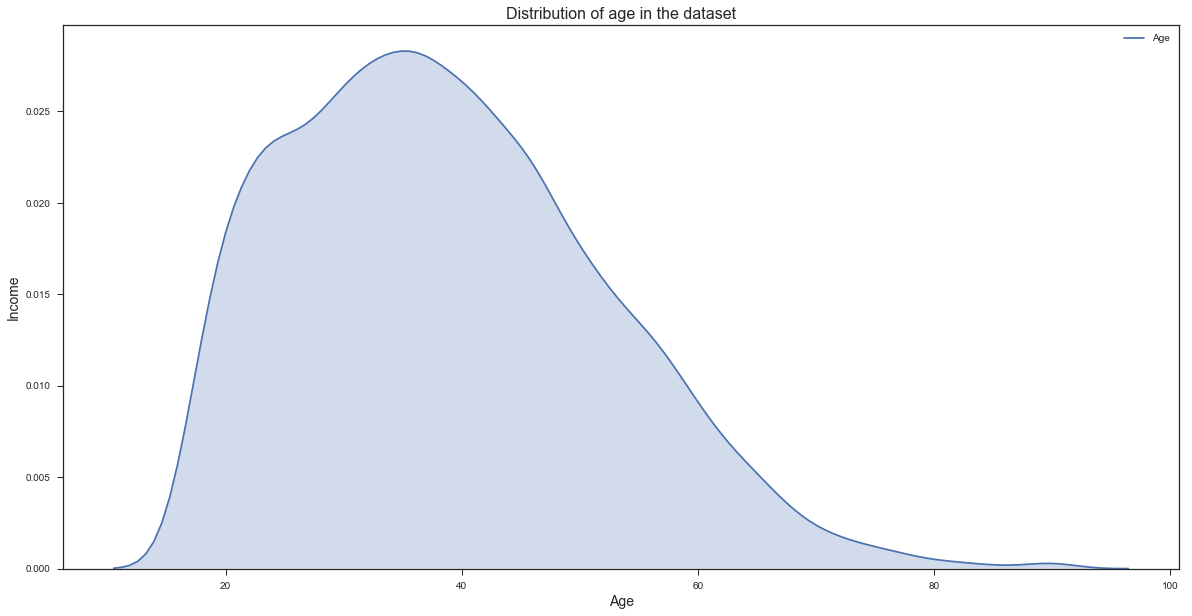

In [77]:
var_name = test_df["Age"]
plt.figure(figsize =(20,10))
sns.kdeplot(var_name, shade = True)
plt.xlabel('Age', fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of age in the dataset", fontsize =16 )
plt.show()

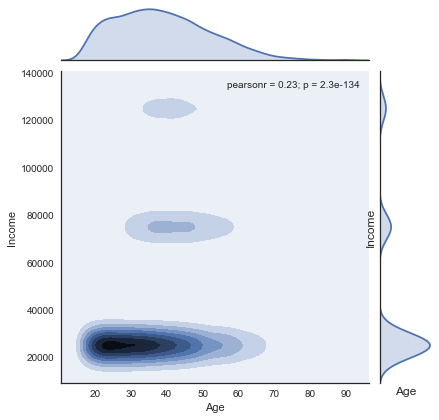

In [78]:
var_name = "Age"
col_order = np.sort(test_df[var_name].unique()).tolist()
plt.figure(figsize =(20,10))
with sns.axes_style('white'):
    sns.jointplot(x=var_name, y = 'Income', data=test_df, kind = 'kde')
plt.xlabel("Age", fontsize =12)
plt.ylabel('Income', fontsize = 12)
#plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

INCOME DISTRIBUTION INCREASES WITH AGE AS WE CAN CLEARLY SEE. YOUNG PEOPLE WHO WOULD BE IN THE ENTRY LEVEL POSITIONS HAVE THEIR INCOME DOMINANTLY AS 25000 WHERE AS IT INCREASES TO 75000 AND 125000 OVER THE AGE

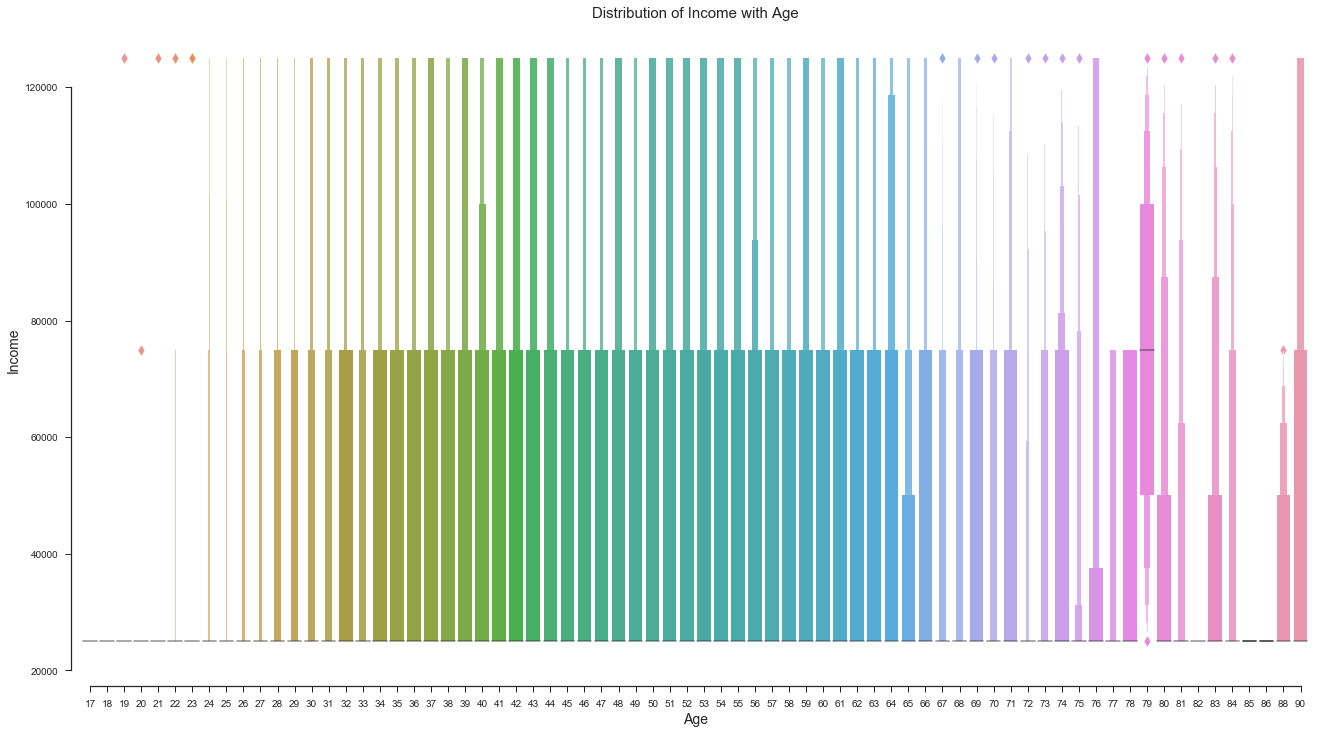

In [79]:
var_name = "Age"
col_order = np.sort(test_df[var_name].unique()).tolist()
plt.figure(figsize =(22,12))
sns.lvplot(x=var_name, y = 'Income', data=test_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

THIS IS THE PROOF-OF-CONCEPT FOR THE ABOVE CHART. AS AGE INCREASES, INCOME INCREASES UNTIL 70 YEARS AFTER WHICH IS DIPS

WORKCLASS

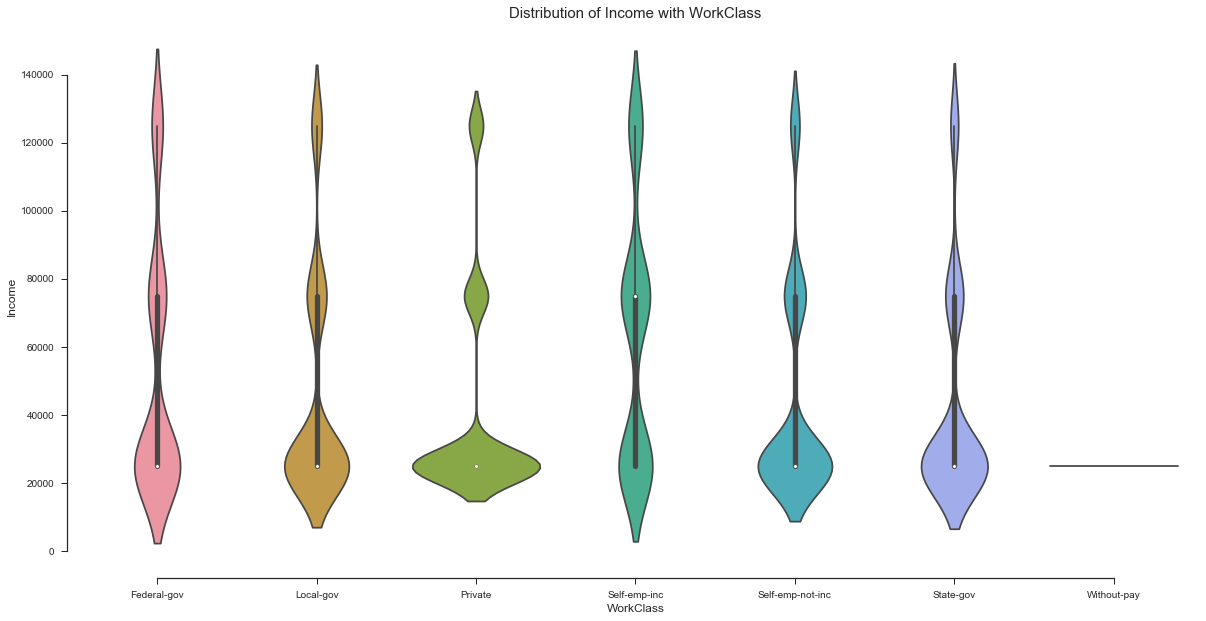

In [80]:
var_name = "WorkClass"
col_order = np.sort(test_df[var_name].unique()).tolist()
plt.figure(figsize =(20,10))
sns.violinplot(y='Income', x = var_name, data=test_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =12)
plt.ylabel('Income', fontsize = 12)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

In [81]:
test_df.loc[test_df["WorkClass"]=="Private", "Income"].value_counts()

25000     6493
75000     1216
125000     717
Name: Income, dtype: int64

90% of the people work in "Private" and their income bracket falls under <50k as majority

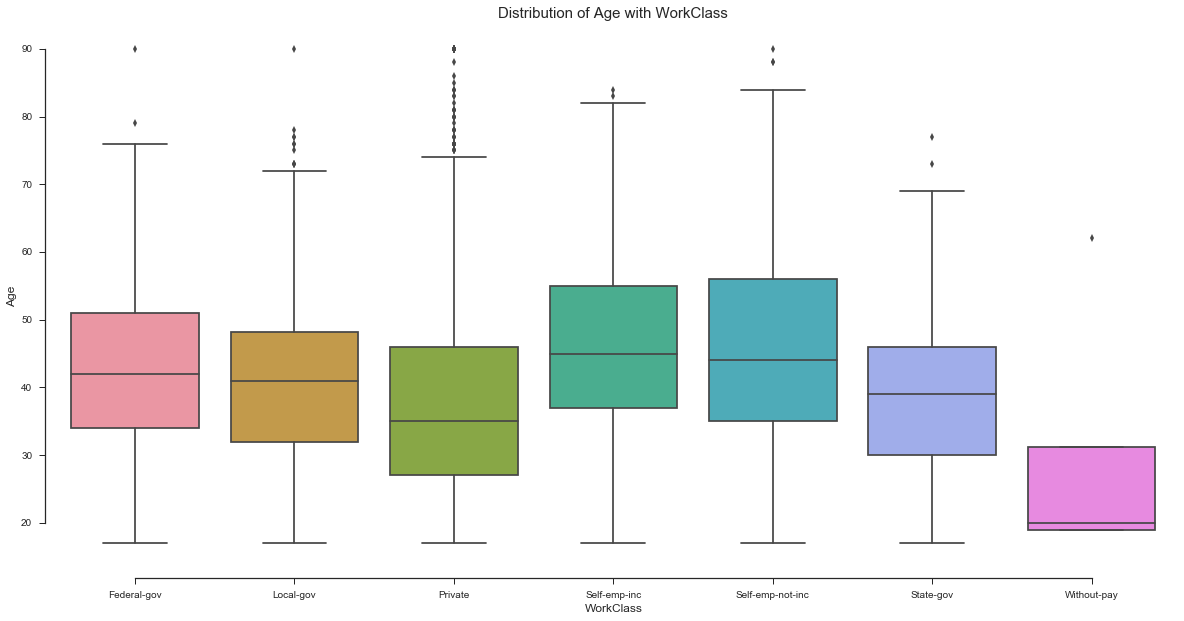

In [82]:
var_name = "WorkClass"
col_order = np.sort(test_df[var_name].unique()).tolist()
plt.figure(figsize =(20,10))
sns.boxplot(x=var_name, y = 'Age', data=test_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =12)
plt.ylabel('Age', fontsize = 12)
plt.title("Distribution of Age with " +var_name, fontsize =15 )
plt.show()

CLEARLY DEPICTS THAT WORKCLASSES- "PRIVATE" & "STATE-GOV" & "LOCAL-GOV" MOSTLY HAD PEOPLE OF AGE GROUP BETWEEN 25 TO 50 YEARS (MOSTLY YOUNGER PEOPLE) THAN THE OTHER CATEGORIES

EDUCATIONLEVEL

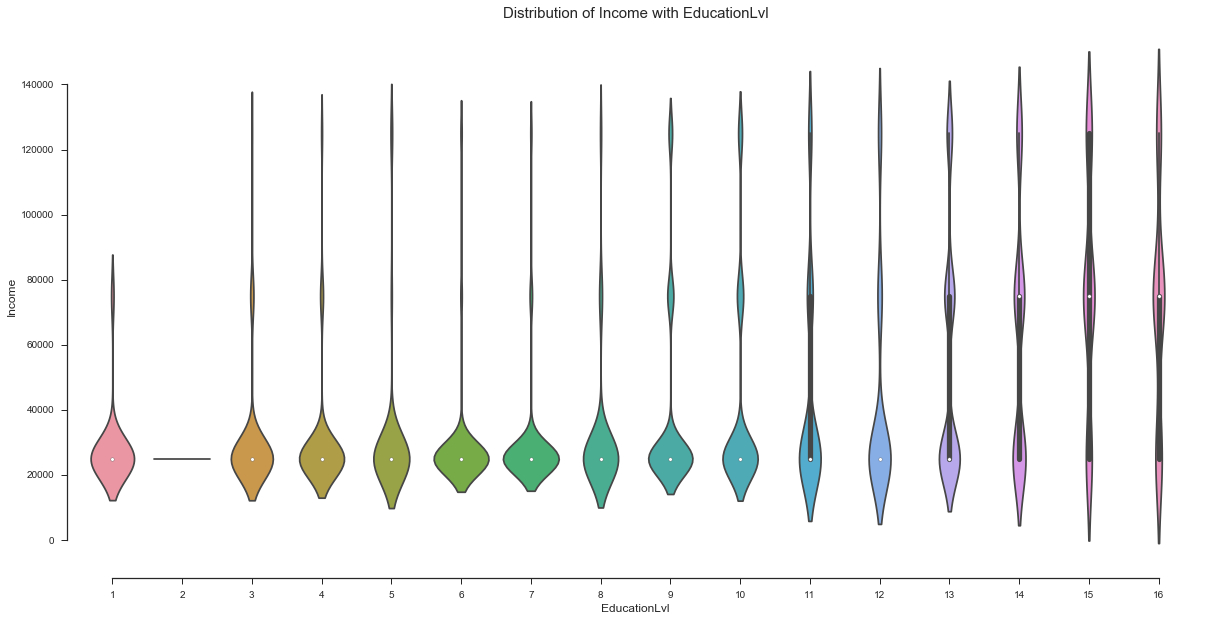

In [83]:
var_name = "EducationLvl"
col_order = np.sort(test_df[var_name].unique()).tolist()
plt.figure(figsize =(20,10))
sns.violinplot(x=var_name, y = 'Income', data=test_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =12)
plt.ylabel('Income', fontsize = 12)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

AS OBVIOUSLY SEEN, PEOPLE SALARY LEVEL DOESNT HAVE MUCH OF CHANGE OVER THEIR LEVEL OF EDUCATION BUT THE NO.OF PEOPLE DECREASES WHEN HIGHER THE EDUCATION

PEOPLE WITH HIGHEST LEVEL OF EDUCATION ARE HAVING INCOME IN ALL THREE CATEGORIES

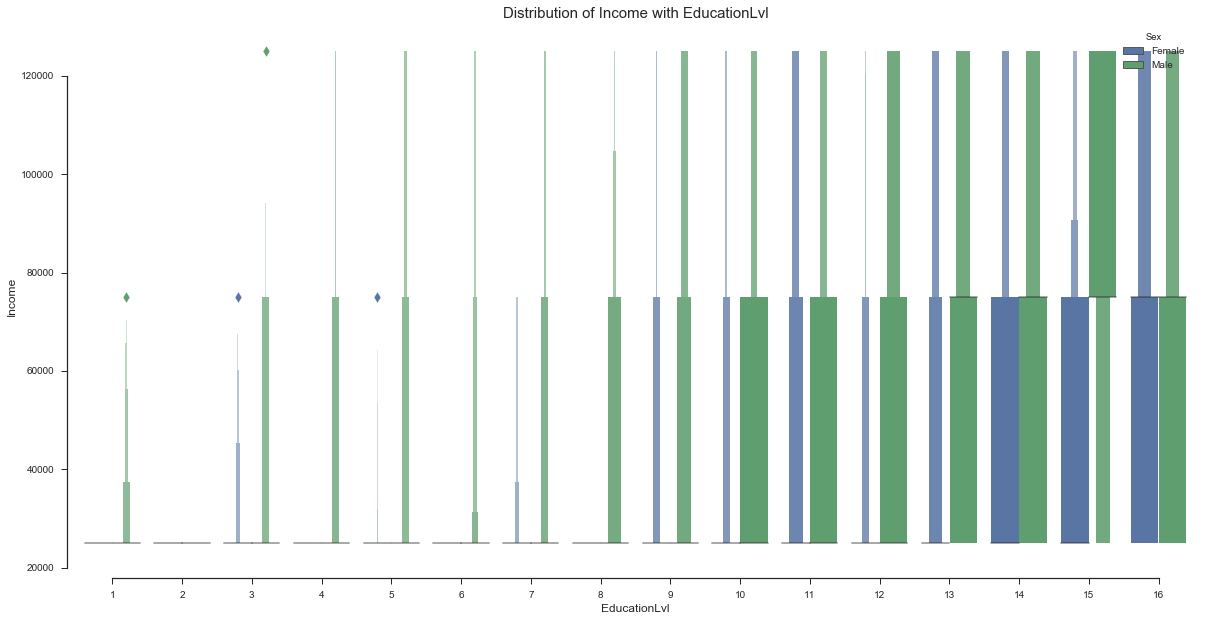

In [84]:
var_name = "EducationLvl"
col_order = np.sort(test_df[var_name].unique()).tolist()
plt.figure(figsize =(20,10))
sns.lvplot(x=var_name, y = 'Income', hue = "Sex", data=test_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =12)
plt.ylabel('Income', fontsize = 12)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

INTERESTINGLY, ON HIGHER EDUCATION LEVELS, WOMEN ARE HIGHER THAN MEN BOTH IN TERMS OF COUNT AS WELL AS INCOME BANDWIDTH

MARITAL STATUS

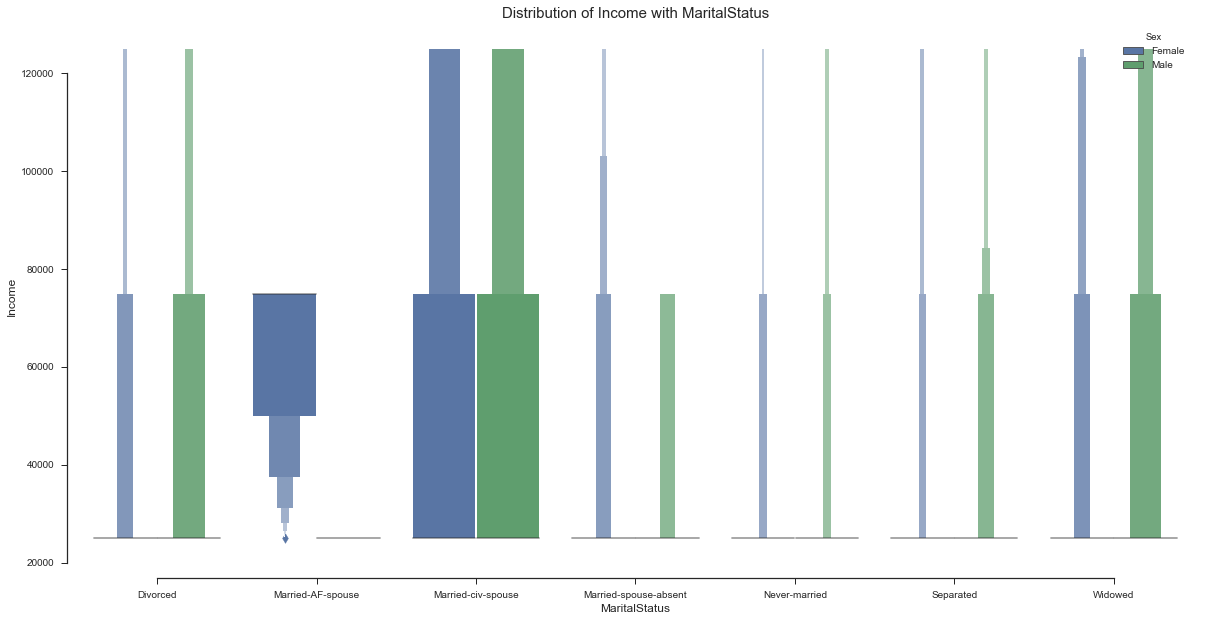

In [85]:
var_name = "MaritalStatus"
col_order = np.sort(test_df[var_name].unique()).tolist()
plt.figure(figsize =(20,10))
sns.lvplot(x=var_name, y = 'Income', hue = 'Sex', data=test_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =12)
plt.ylabel('Income', fontsize = 12)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

OCCUPATION

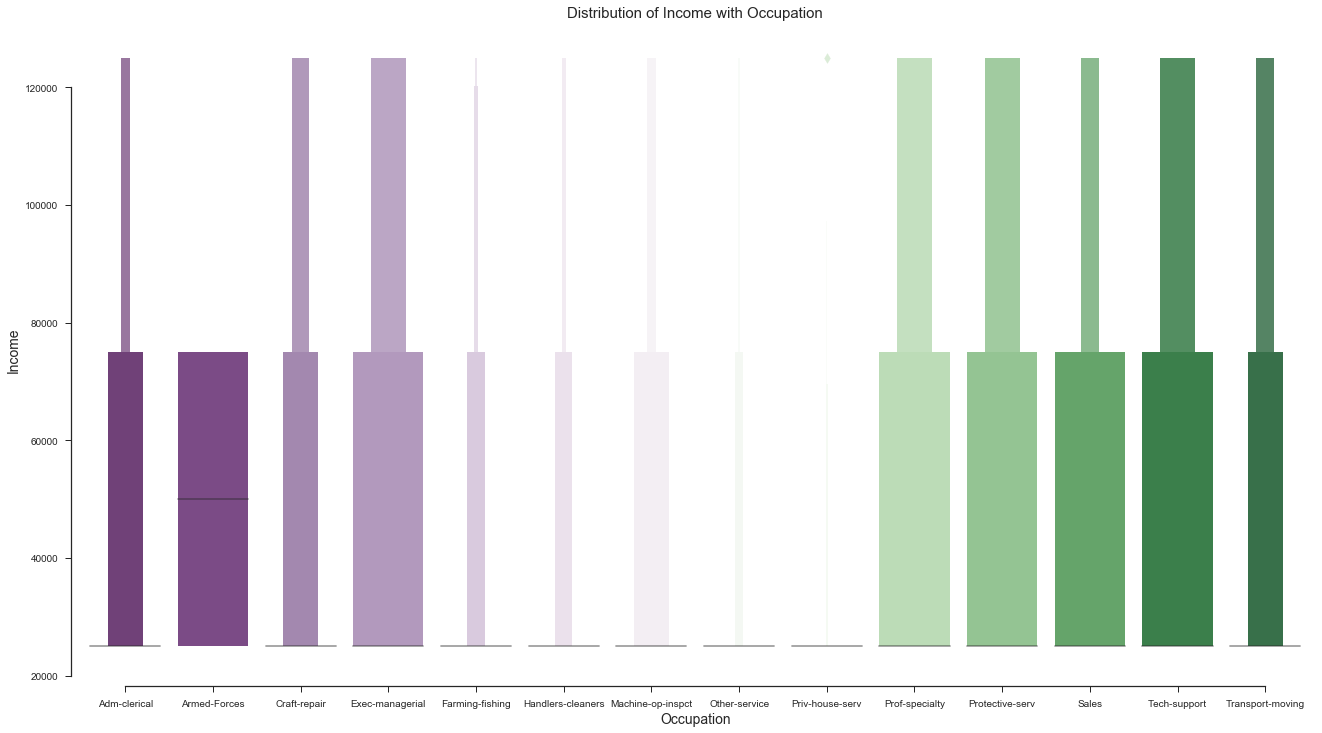

In [86]:
var_name = "Occupation"
col_order = np.sort(test_df[var_name].unique()).tolist()
plt.figure(figsize =(22,12))
sns.lvplot(x=var_name, y = 'Income', data=test_df, order =col_order, palette = "PRGn")
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

OCCUPATIONS LIKE "EXEC-MANAGERIAL", "PROF-SPECIALTY", "PROTECTIVE-SERV", "SALES", "TECH-SUPPORT" ARE HIGH PAYING JOBS

OCCUPATIONS LIKE "FARMING-FISHING", "HANDLERS-CLEANERS", "OTHER-SERVICE", "PRIV-HOUSR-SERV" JOBS ARE LOW PAYING JOBS

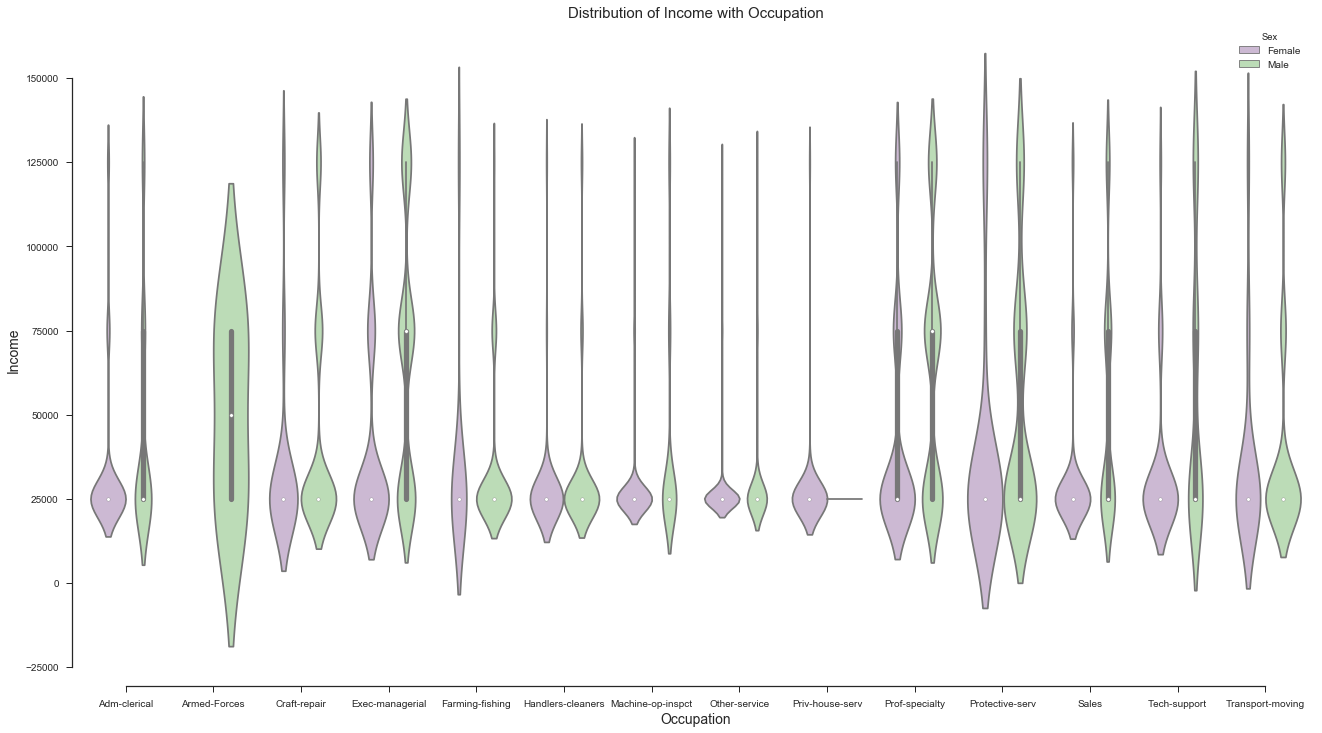

In [87]:
var_name = "Occupation"
col_order = np.sort(test_df[var_name].unique()).tolist()
plt.figure(figsize =(22,12))
sns.violinplot(x=var_name, y = 'Income', hue = "Sex", data=test_df, order =col_order, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

FROM THIS GRAPH WE CAN INFER THAT, WOMEN ARE EQUALLY WORKING IN ALMOST ALL PROFESSIONS TO MEN EXCEPT ARMED FORCES
AND MEN ARE EQUAL TO WOMEN IN MOST OF THE OCCUPATION EXCEPT PRIV-HOUSE-SERV (no.of men is almost zero) & ARMED-FORCES (NO. OF WOMEN IS ZERO AND ALL ARE MEN)

RELATIONSHIP

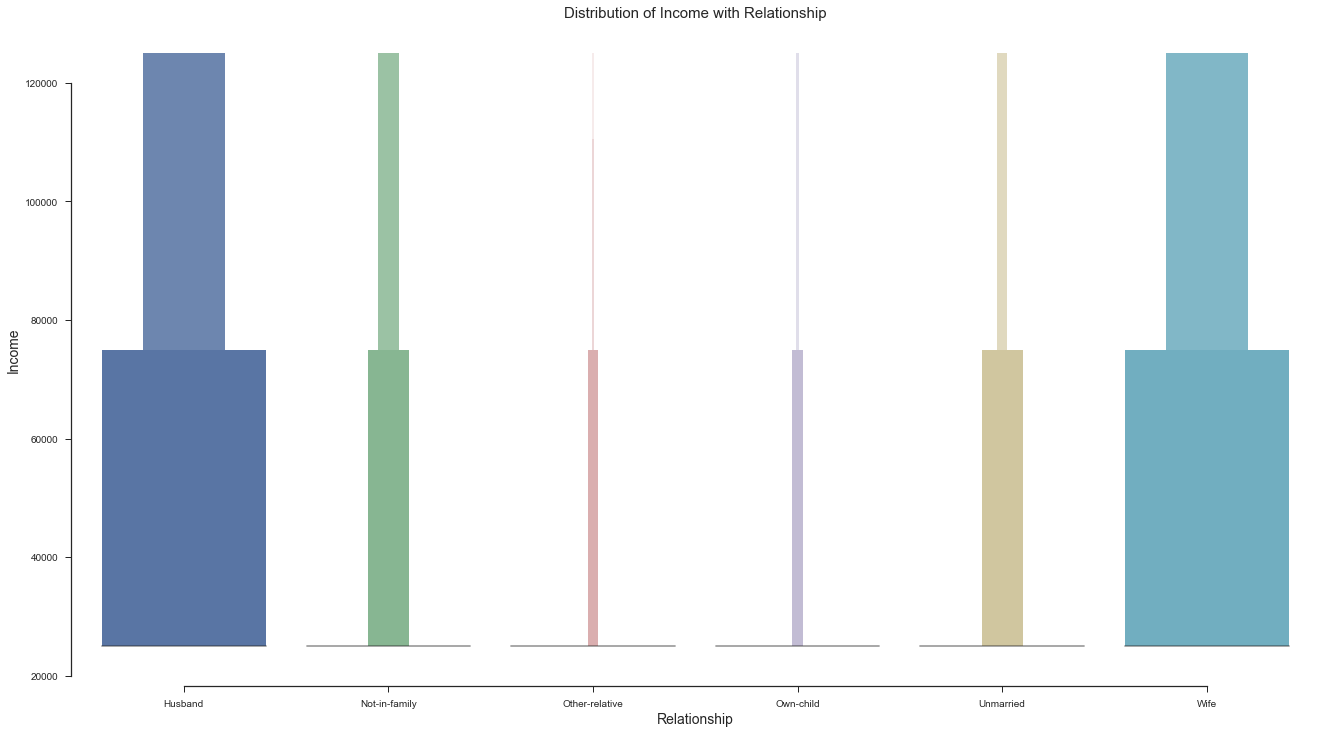

In [88]:
var_name = "Relationship"
col_order = np.sort(test_df[var_name].unique()).tolist()
plt.figure(figsize =(22,12))
sns.lvplot(x=var_name, y = 'Income', data=test_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

HUSBAND AND WIFE ARE MOST PROMINENT RELATIONSHIP STATUS WITH GOOD INCOME SPREAD. 

WHILE, OWN-CHILD & OTHER-RELATIVE ARE WITH LEAST INCOME SPREAD

RACE

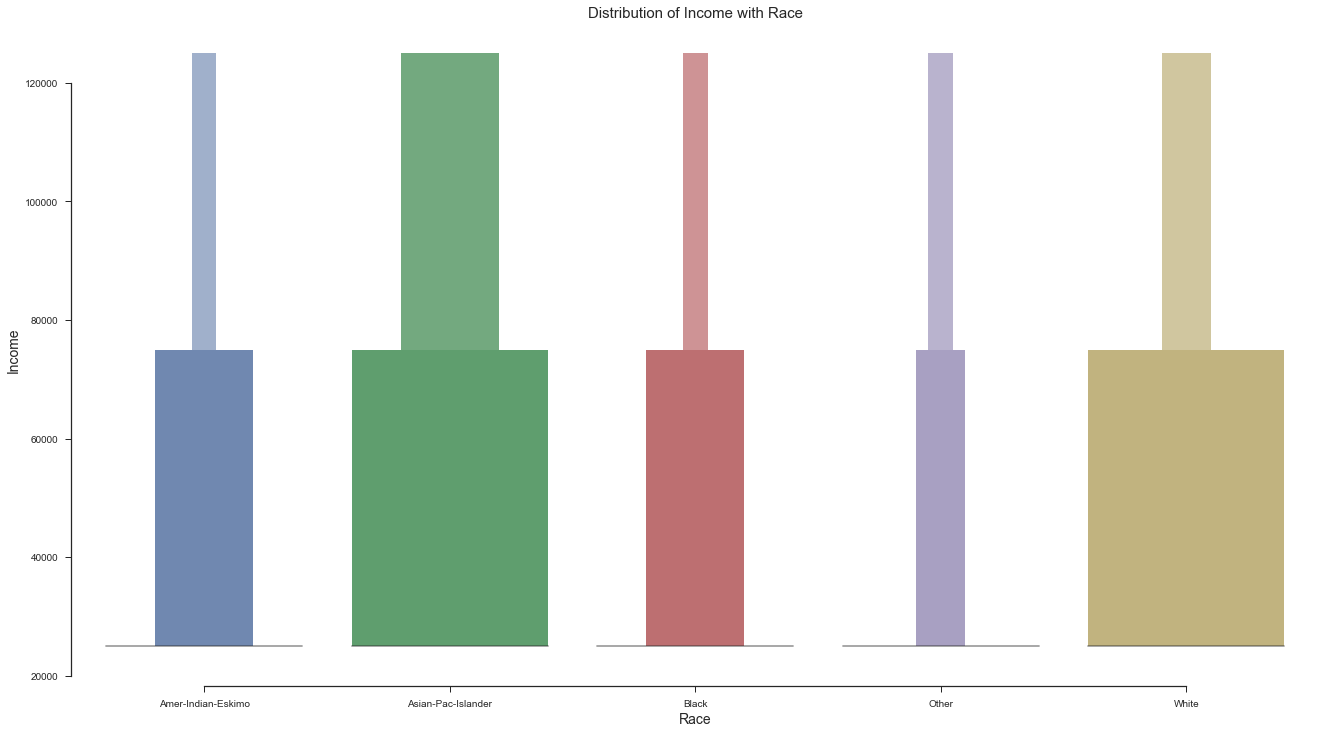

In [89]:
var_name = "Race"
col_order = np.sort(test_df[var_name].unique()).tolist()
plt.figure(figsize =(22,12))
sns.lvplot(x=var_name, y = 'Income', data=test_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

'WHITE' AND 'ASIAN-PAC-ISLANDER' WERE MOST PROMINENT WITH 'BLACK' & 'OTHER' RACE BEING THE LEAST

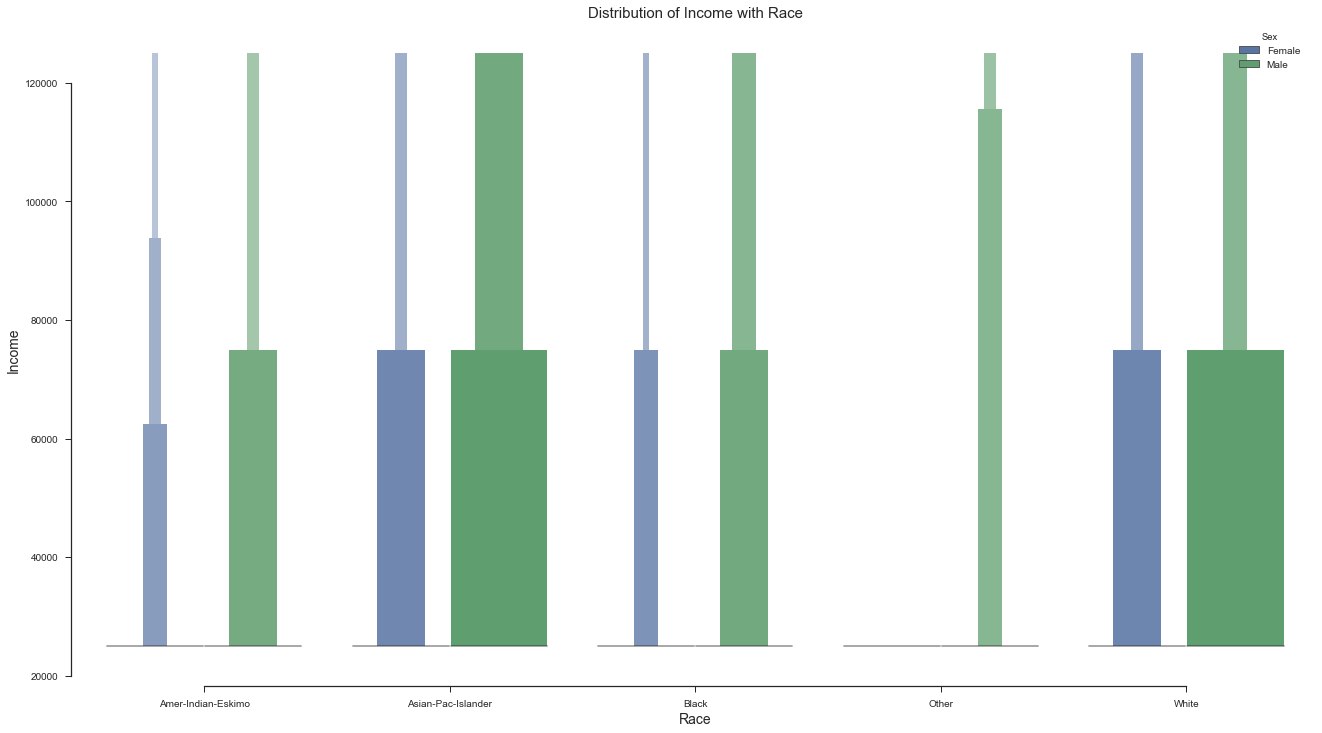

In [90]:
var_name = "Race"
col_order = np.sort(test_df[var_name].unique()).tolist()
plt.figure(figsize =(22,12))
sns.lvplot(x=var_name, y = 'Income', hue = "Sex", data=test_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

THIS SHOWS THAT NO. OF MALES WERE HIGHER IN ALL THE RACES THAN NO. OF FEMALES

GENDER DISTRIBUTION FOR INCOME

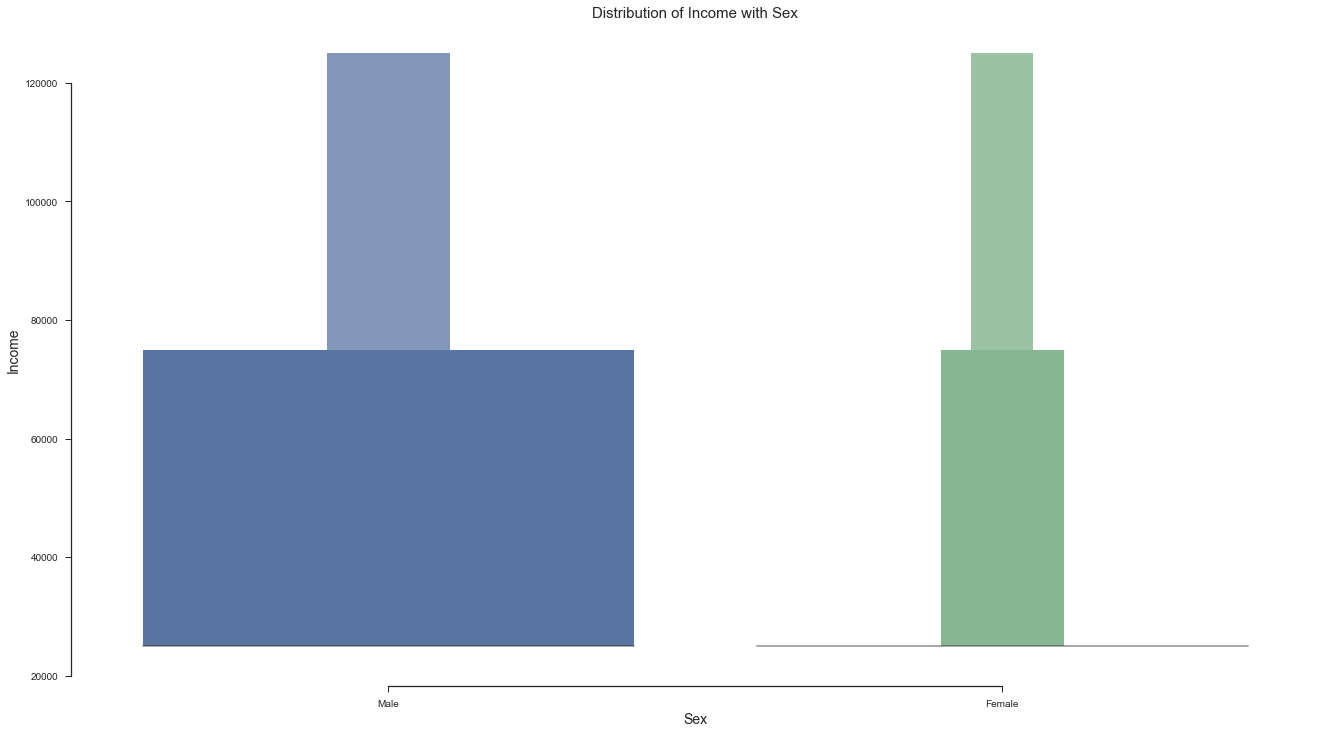

In [91]:
var_name = "Sex"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(22,12))
sns.lvplot(x=var_name, y = 'Income', data=train_df)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

PREDOMINANT INCOME RANGE WAS LESS THAN 50K AND MALES WERE THE MAJORITY

HOURS PER WEEK

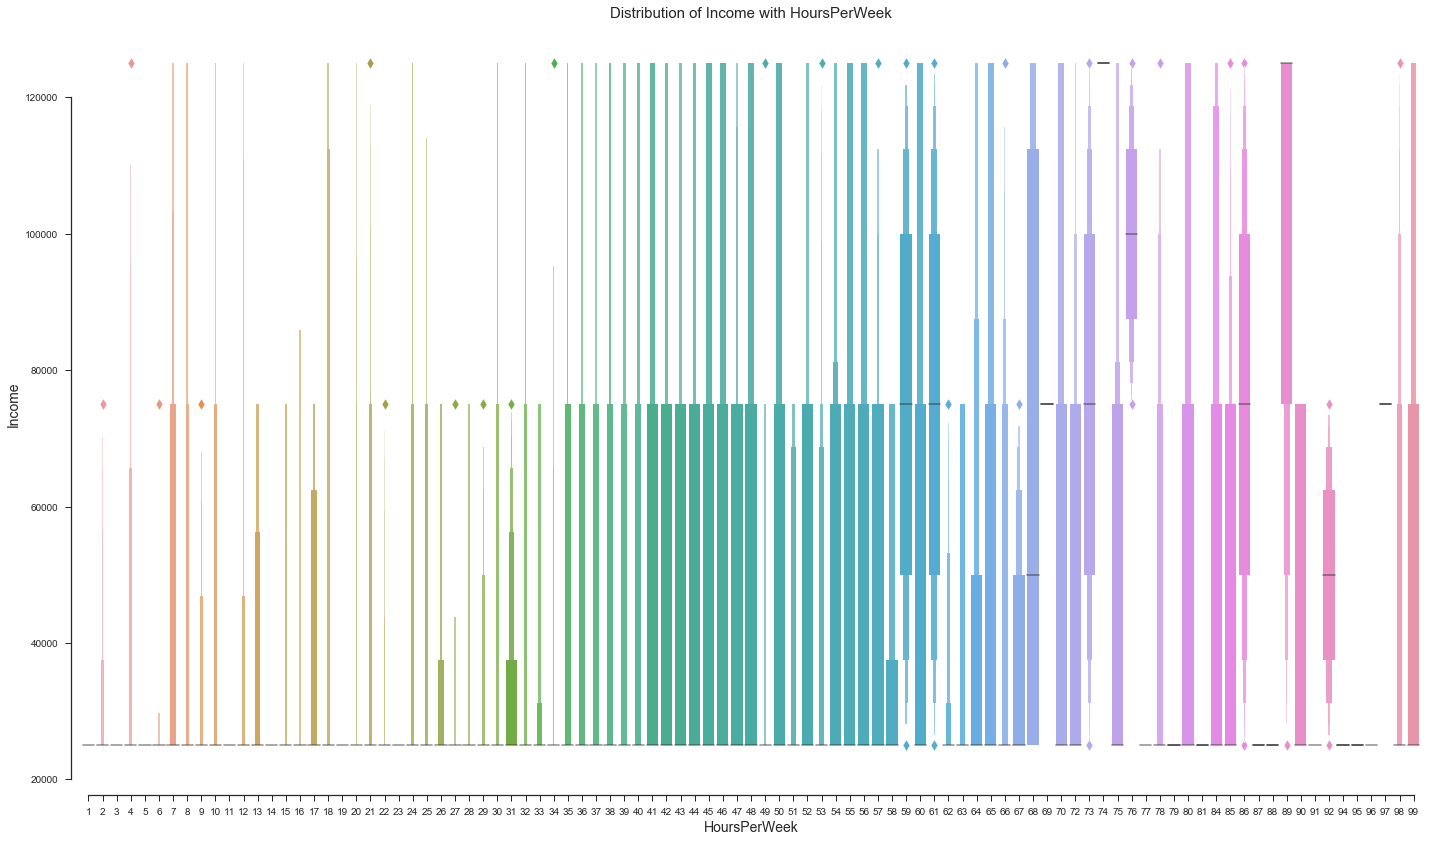

In [92]:
var_name = "HoursPerWeek"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(24,14))
sns.lvplot(x=var_name, y = 'Income', data=train_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

Even though we cannot establish a proper relation between hours per week and income from the above plot, 

we can see that, less no. of people are working less than 40 hours

and people working between 40 hours - 85 hours a week are more and are spread across all levels of income

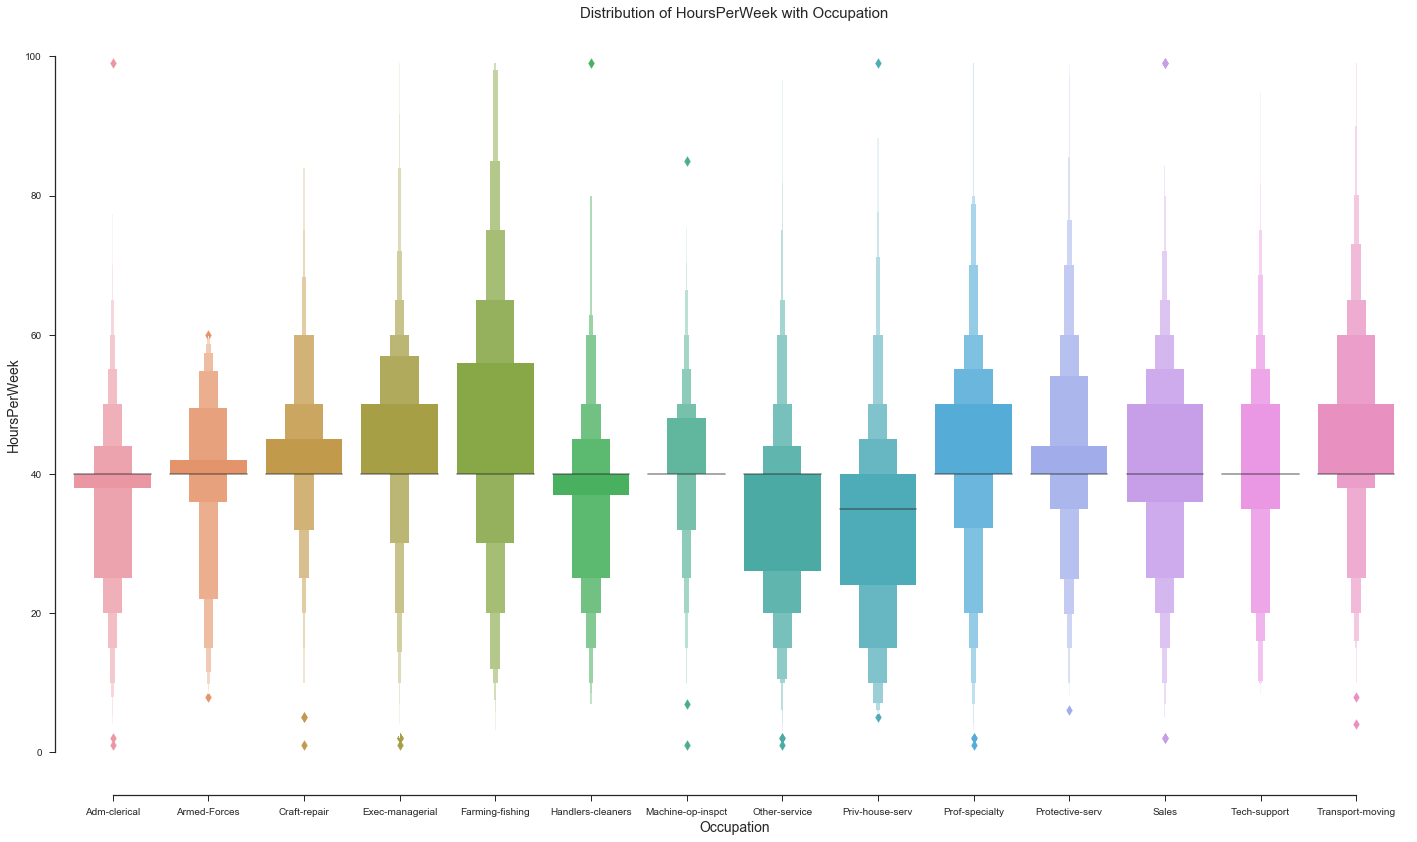

In [93]:
var_name = "Occupation"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(24,14))
sns.lvplot(x=var_name, y = 'HoursPerWeek', data=train_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('HoursPerWeek', fontsize = 14)
plt.title("Distribution of HoursPerWeek with " +var_name, fontsize =15 )
plt.show()

JOBS LIKE FARMING-FISHING, EXEC-MANAGERIAL, PROF-SPECIALTY, TRANSPORT-MOVING AND SALES INCLUDES MORE HOURS PER WEEK

WE CAN ALSO SEE SOME OUTLIERS IN ADMN-CLERICAL, MACHINE-OP-INSPECT, PIV-HOUSE-SERV WITH HIGH WORKING HOURS OF UPTO 100 HOURS

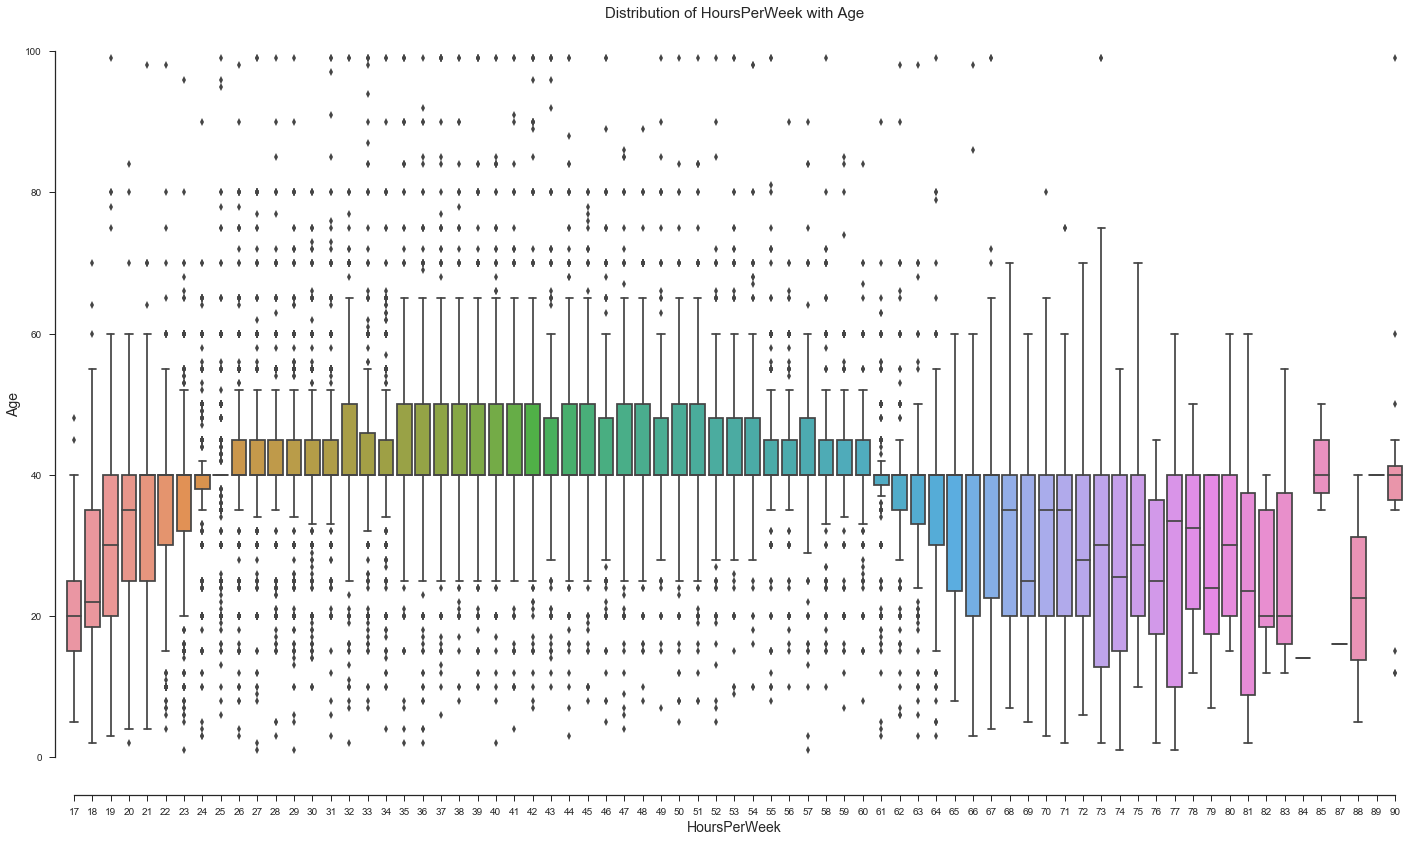

In [94]:
var_name = "Age"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(24,14))
sns.boxplot(x=var_name, y='HoursPerWeek', data=train_df, order =col_order)
sns.despine(offset=10, trim=True)
plt.ylabel(var_name, fontsize =14)
plt.xlabel('HoursPerWeek', fontsize = 14)
plt.title("Distribution of HoursPerWeek with " +var_name, fontsize =15 )
plt.show()

WE CAN SEE THAT PEOPLE OF YOUNGER AGE TENDS TO WORK MORE HOURS THAN THE OLDER AGE GROUP

NATIVE COUNTRY

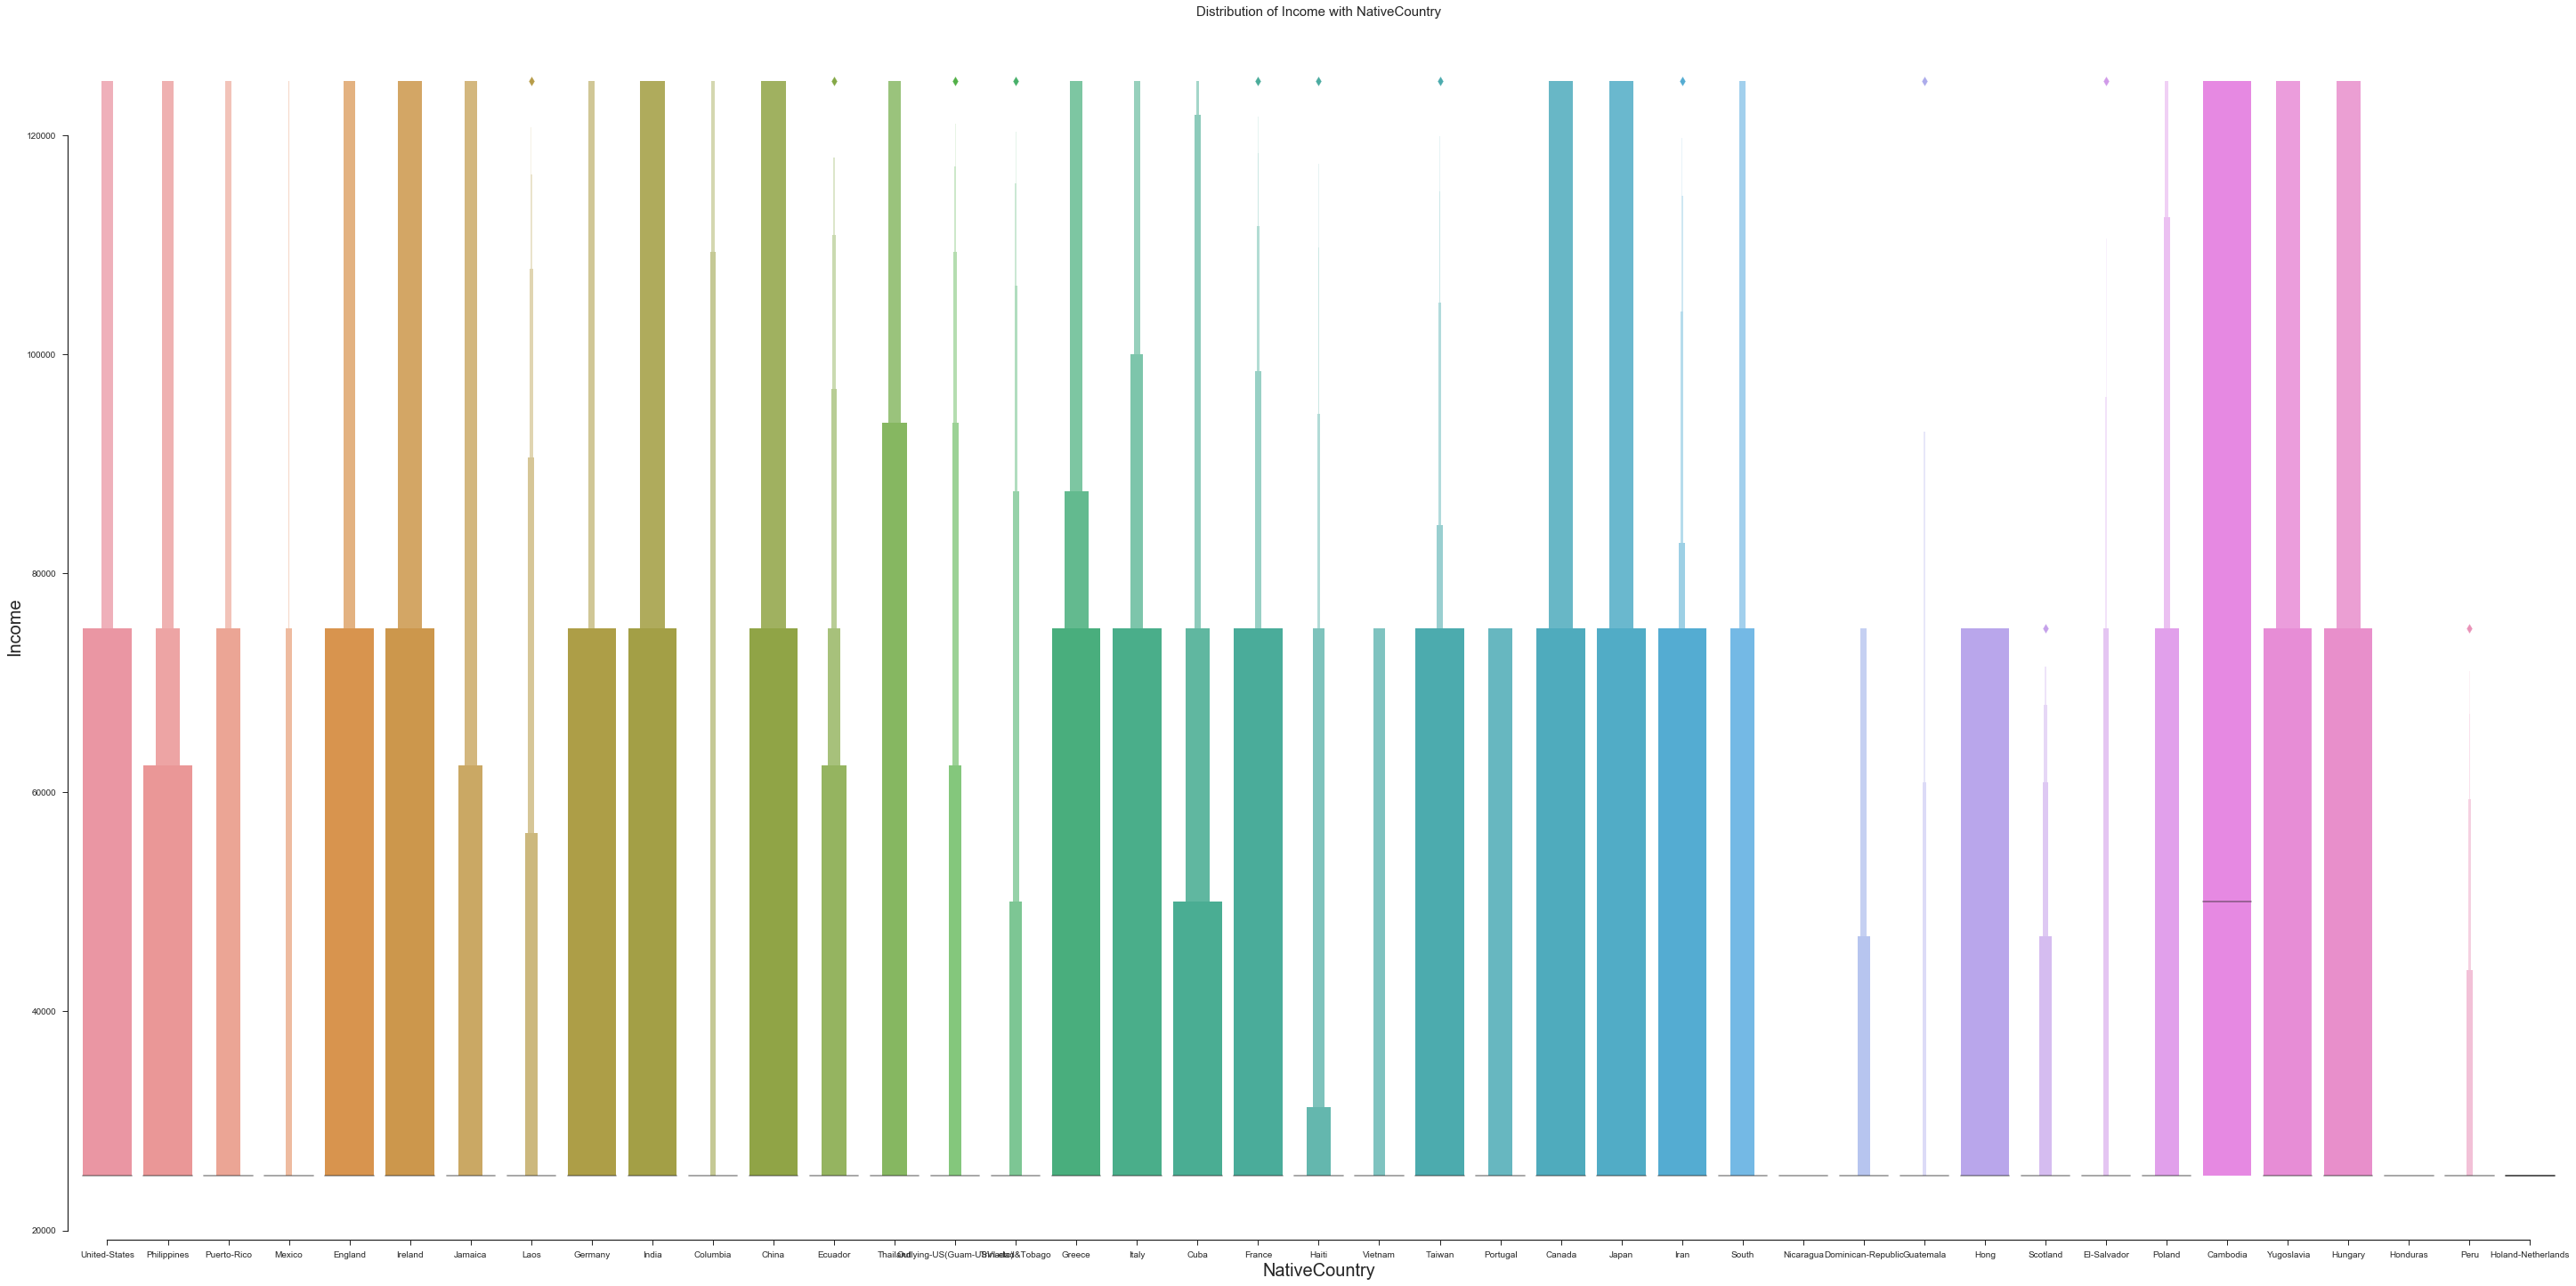

In [95]:
var_name = "NativeCountry"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize =(50,25))
sns.lvplot(x=var_name, y = 'Income', data=train_df)#, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =20)
plt.ylabel('Income', fontsize = 20)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

##### Now that, both the income_training and income_testing were imputed with the missing values, we can proceed for the analysis. 

##### Steps ahead: 

#####  1. CONCATENATION OF TRAINING AND TESTING SET & ENCODING OF INDEPENDENT VARAIBES
#####  2. FINDING THE CORRELATION BETWEEN VARIOUS FEATURES
#####  3. DROPPING FEATURES WITH HIGH CORRELATION
#####  4. MAKE SURE THAT ALL THE INDEPENDENT VARIABES ARE LESS CORRELATED
#####  5. CREATION OF NEW VARIABLE BY COMBINING MULTIPLE FEATURES THEREBY NARROWING DOWN THE SIZE OF DATASET
#####  6. MODEL IMPLEMENTATION OVER TRAINING SET
#####  7. K FOLD CROSS VALIDATION OVER MODELS TO GET THE MEAN OF ACCURACIES
#####  8. OBTAINING THE ACCURACY, STANDARD DEVIATION AND VARIANCE
#####  9. GRID SEARCH FOR THE VARIUOS MODELS
##### 10. OBTAINING THE OPTIMAL PARAMETERS
##### 11. OBTAINING THE MODEL ACCURACY WITH OPTIMAL PARAMETERS OVER THE TESTING SET (ACTUAL DATASET- COMBINED)
##### 12. RECURSIVE FEATURE ELIMINATION

##### Combining both datasets

In [96]:
print("\nThe shape of training dataset:", train_df.shape)
print("\nTraining dataset is:\n\n")
train_df.tail()


The shape of training dataset: (23031, 16)

Training dataset is:




,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
23026,23,Private,256628,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,32,United-States,<50K,25000
23027,37,Private,188571,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<50K,25000
23028,24,Private,211585,HS-grad,9,Married-civ-spouse,Transport-moving,Own-child,White,Female,0,0,40,United-States,<50K,25000
23029,63,Private,68872,HS-grad,9,Married-civ-spouse,Transport-moving,Wife,Asian-Pac-Islander,Female,0,0,20,United-States,<50K,25000
23030,56,Private,159724,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,50-100K,75000


In [97]:
print("\nThe shape of testing dataset:", test_df.shape)
print("\nTesting dataset is:\n\n")
test_df.head()


The shape of testing dataset: (11521, 16)

Testing dataset is:




,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
0,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,50-100K,75000
1,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,<50K,25000
2,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<50K,25000
3,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,<50K,25000
4,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,<50K,25000


In [98]:
#CONCATENATION OF THE DATASETS

dataset = pd.concat([train_df,test_df], ignore_index = True)
print("\nThe shape of the concatenated dataset is:", dataset.shape)
print("\n Header rows of the dataset is:")
dataset.head()


The shape of the concatenated dataset is: (34552, 16)

 Header rows of the dataset is:


,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
0,32,Private,202952,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<50K,25000
1,47,State-gov,263215,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,80,United-States,<50K,25000
2,19,Private,210308,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States,<50K,25000
3,67,Without-pay,137192,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,12,Philippines,<50K,25000
4,48,Local-gov,319079,Bachelors,13,Divorced,Adm-clerical,Unmarried,White,Female,0,0,30,United-States,<50K,25000


In [99]:
#dataset.info()
#dataset.describe()
dataset.isnull().sum(axis=0)

Age              0
WorkClass        0
FinalWeight      0
Education        0
EducationLvl     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
IncomeBracket    0
Income           0
dtype: int64

JUST VERYFYING THERE ARE NO MISSING VALUES

In [100]:
dataset.drop("IncomeBracket", axis=1, inplace = True)

SINCE INCOMEBRACKET AND INCOME DEPICTS THE SAME INFORMATION, DROPPING INCOMEBRACKET

In [101]:
print(dataset.shape)
dataset.head()

(34552, 15)


,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,32,Private,202952,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,25000
1,47,State-gov,263215,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,80,United-States,25000
2,19,Private,210308,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States,25000
3,67,Without-pay,137192,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,12,Philippines,25000
4,48,Local-gov,319079,Bachelors,13,Divorced,Adm-clerical,Unmarried,White,Female,0,0,30,United-States,25000


##### FEATURE ENGINEERING

##### Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. Features can be either raw or derived from the dataset, and can be done both on numerical values as well as categorical values. Coming up with features is difficult, time-consuming, requires expert knowledge because discarding important features may tend to over-fit the model. This can be done by 1. Algorithms 2. Creating new features that combines the importance of other two features and not highly correlated 3. Eliminating multi-colinear features. In this assignment, all the three steps are performed. But using algorithm was done at the end to compare the accuracy of the model with feature elimination and model accuracy without feature elimination. Expectation: Model accuracy with feature elimination to be higher. Let us dive into this segment for more details.

##### CREATION OF NEW FEATURE "NETCAPITAL"

##### FROM THE DATASET, CAPITAL GAIN AND CAPITAL LOSS ARE TWO DIFFERENT COLUMNS DEPICTING THE INVESTMENT OUTCOMES OF THE PEOPLE. THESE CAN BE COMBINED INTO A SINGLE FEATURE BY CALCULATING THE NETCAPITAL = CAPITALGAIN - CAPITALLOSS

##### THEREBY COMBINING TWO FEATURES INTO ONE FEATURE AND DROPPING THE OTHER TWO FEATURES

In [102]:
dataset["NetCapital"] = dataset["CapitalGain"] - dataset["CapitalLoss"]
dataset.drop("CapitalGain", 1, inplace = True)
dataset.drop("CapitalLoss", 1, inplace = True)

##### FETCHING THE CORRELATION MATRIX FOR THIS DATASET

In [103]:
Z = dataset.apply(LabelEncoder().fit_transform)
Z_corr = Z.corr()
Z_corr

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,HoursPerWeek,NativeCountry,Income,NetCapital
Age,1.000000,0.083738,-0.080560,-0.002874,0.043806,-0.266328,-0.001696,-0.244347,0.025767,0.082129,0.096563,-0.004457,0.223312,0.088574
WorkClass,0.083738,1.000000,-0.040041,0.017343,0.040213,-0.031176,0.015767,-0.064636,0.049036,0.069682,0.049242,0.003782,0.009887,0.013756
FinalWeight,-0.080560,-0.040041,1.000000,-0.022751,-0.038003,0.036334,0.002053,0.005543,-0.015229,0.031738,-0.017441,-0.066058,-0.010592,-0.008263
Education,-0.002874,0.017343,-0.022751,1.000000,0.342558,-0.041467,-0.035990,-0.017547,0.010582,-0.024844,0.061853,0.079512,0.078232,0.025002
EducationLvl,0.043806,0.040213,-0.038003,0.342558,1.000000,-0.065928,0.089733,-0.097174,0.029721,0.011595,0.148669,0.089055,0.305067,0.106070
MaritalStatus,-0.266328,-0.031176,0.036334,-0.041467,-0.065928,1.000000,0.013417,0.178429,-0.070442,-0.120458,-0.186402,-0.024052,-0.178966,-0.051154
Occupation,-0.001696,0.015767,0.002053,-0.035990,0.089733,0.013417,1.000000,-0.057509,0.005342,0.061105,0.019664,-0.002665,0.046549,0.007615
Relationship,-0.244347,-0.064636,0.005543,-0.017547,-0.097174,0.178429,-0.057509,1.000000,-0.123090,-0.587601,-0.261151,-0.010880,-0.243175,-0.060636
Race,0.025767,0.049036,-0.015229,0.010582,0.029721,-0.070442,0.005342,-0.123090,1.000000,0.088204,0.046147,0.119746,0.067322,0.009469
Sex,0.082129,0.069682,0.031738,-0.024844,0.011595,-0.120458,0.061105,-0.587601,0.088204,1.000000,0.234859,-0.001364,0.206164,0.048048


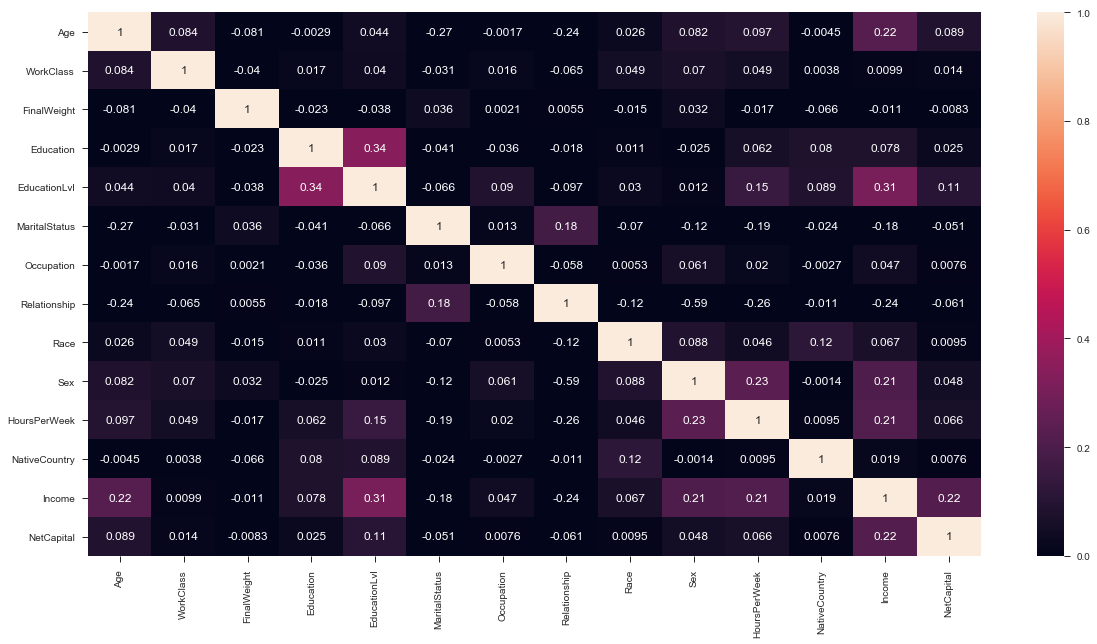

In [104]:
plt.figure(figsize =(20,10))
sns.heatmap(Z_corr, 
        xticklabels=Z_corr.columns,
        yticklabels=Z_corr.columns, vmin =0, vmax=1, annot = True)
plt.show()

# INFERENCE FROM CORRELATION HEATMAP

WE CAN SEE THAT THE FOLLOWING FEATURES ARE +VE CORRELATED AND HENCE DROPPING THE TOP FEATURES AND KEEPING ONE OF THEM FOR ANALYSIS COULD BE DONE

1. EDUCATION & EDUCATION LVL - DROPPING EDUCATION AND KEEPING EDUCATIONLVL
2. INCOME & EDUCATIONLVL - CANNOT BE DROPPED
3. SEX & HOURSPERWEEK - SINCE THEY CONVEY DIFFERENT INFORMATION AS A WHOLE, WE CANNOT DROP THEM
4. AGE & INCOME - CANNOT BE DROPPED
5. SEX & INCOME - CANNOT BE DROPPED
6. HOURSPERWEEK & INCOME - CANNOT BE DROPPED
7. NETCAPTIAL & INCOME - CANNOT BE DROPPED

In [105]:
dataset.drop("Education", 1, inplace = True)

In [106]:
dataset.head()

,Age,WorkClass,FinalWeight,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,HoursPerWeek,NativeCountry,Income,NetCapital
0,32,Private,202952,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,25000,0
1,47,State-gov,263215,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,80,United-States,25000,0
2,19,Private,210308,10,Never-married,Adm-clerical,Own-child,White,Female,15,United-States,25000,0
3,67,Without-pay,137192,9,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,12,Philippines,25000,0
4,48,Local-gov,319079,13,Divorced,Adm-clerical,Unmarried,White,Female,30,United-States,25000,0


DROPPED "EDUCATION"

In [107]:
print(len(dataset["NativeCountry"]))
dataset["NativeCountry"][0]

34552


'United-States'

##### ENCODING NATIVE COUNTRY AS 0 OR 1. WHEN 1 CORRESPONDS TO UNITED STATES AND 0 CORRESPONDS TO COUNTRIES APART FROM UNITED-STATES

In [109]:
for i in range (len(dataset["NativeCountry"])):
    if dataset.NativeCountry[i] =="United-States":
        dataset.NativeCountry[i] = 1
    elif dataset.NativeCountry[i] != "United-States":
        dataset.NativeCountry[i] = 0

In [110]:
dataset.head()

,Age,WorkClass,FinalWeight,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,HoursPerWeek,NativeCountry,Income,NetCapital
0,32,Private,202952,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,1,25000,0
1,47,State-gov,263215,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,80,1,25000,0
2,19,Private,210308,10,Never-married,Adm-clerical,Own-child,White,Female,15,1,25000,0
3,67,Without-pay,137192,9,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,12,0,25000,0
4,48,Local-gov,319079,13,Divorced,Adm-clerical,Unmarried,White,Female,30,1,25000,0


In [111]:
dataset = pd.get_dummies(dataset, columns = ['WorkClass'])
dataset = pd.get_dummies(dataset, columns = ['MaritalStatus'])
dataset = pd.get_dummies(dataset, columns = ['Occupation'])
dataset = pd.get_dummies(dataset, columns = ['Relationship'])
dataset = pd.get_dummies(dataset, columns = ['Race'])
dataset.head()

,Age,FinalWeight,EducationLvl,Sex,HoursPerWeek,NativeCountry,Income,NetCapital,WorkClass_Federal-gov,WorkClass_Local-gov,...,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
0,32,202952,9,Male,40,1,25000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,47,263215,13,Male,80,1,25000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,19,210308,10,Female,15,1,25000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,67,137192,9,Male,12,0,25000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,48,319079,13,Female,30,1,25000,0,0,1,...,0,0,0,1,0,0,0,0,0,1


ENCODING THE SEX COLUMN WITH 0 FOR MALE AND 1 FOR FEMALE

In [112]:
gender_map = {"Male":0, "Female":1}

In [113]:
dataset["Sex"].replace(gender_map, inplace=True)
dataset.head()

,Age,FinalWeight,EducationLvl,Sex,HoursPerWeek,NativeCountry,Income,NetCapital,WorkClass_Federal-gov,WorkClass_Local-gov,...,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
0,32,202952,9,0,40,1,25000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,47,263215,13,0,80,1,25000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,19,210308,10,1,15,1,25000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,67,137192,9,0,12,0,25000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,48,319079,13,1,30,1,25000,0,0,1,...,0,0,0,1,0,0,0,0,0,1


# CORRELATION FOR FEATURE SELECTION

In [114]:
corr = dataset.corr()
corr

,Age,FinalWeight,EducationLvl,Sex,HoursPerWeek,Income,NetCapital,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Private,...,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
Age,1.000000,-0.079179,0.043806,-0.082129,0.096100,0.223312,0.079294,0.056464,0.064499,-0.211076,...,-0.022451,-0.068839,-0.419054,0.046943,0.023275,-0.021973,-0.005122,-0.013135,-0.030973,0.027482
FinalWeight,-0.079179,1.000000,-0.040618,-0.030102,-0.019808,-0.010944,-0.002296,-0.014797,0.000450,0.048825,...,0.005978,0.020690,0.020410,0.001929,-0.017189,-0.064255,-0.051336,0.131614,0.000151,-0.067248
EducationLvl,0.043806,-0.040618,1.000000,-0.011595,0.147176,0.305067,0.124629,0.058333,0.096043,-0.165447,...,0.057168,-0.090984,-0.100940,-0.061885,0.030864,-0.032462,0.065975,-0.071733,-0.046571,0.048670
Sex,-0.082129,-0.030102,-0.011595,1.000000,-0.233415,-0.206164,-0.044800,-0.003595,0.041146,0.067481,...,0.169712,0.045294,0.106138,0.323432,0.321889,0.014363,0.003993,0.112753,0.004467,-0.101626
HoursPerWeek,0.096100,-0.019808,0.147176,-0.233415,1.000000,0.212404,0.081284,0.008083,-0.004299,-0.092422,...,0.002896,-0.049384,-0.262540,-0.046119,-0.063347,-0.005230,-0.006794,-0.055262,-0.006032,0.052639
Income,0.223312,-0.010944,0.305067,-0.206164,0.212404,1.000000,0.194898,0.059564,0.031910,-0.111829,...,-0.183891,-0.081173,-0.208082,-0.140862,0.104680,-0.026785,0.014828,-0.088588,-0.020428,0.079657
NetCapital,0.079294,-0.002296,0.124629,-0.044800,0.081284,0.194898,1.000000,-0.004552,-0.010632,-0.051956,...,-0.023162,-0.019309,-0.047919,-0.028092,0.013686,-0.006748,0.015083,-0.019304,-0.002466,0.011310
WorkClass_Federal-gov,0.056464,-0.014797,0.058333,-0.003595,0.008083,0.059564,-0.004552,1.000000,-0.048934,-0.301301,...,0.012248,-0.011888,-0.039015,0.011741,-0.001891,0.020923,0.013422,0.049591,-0.004835,-0.052783
WorkClass_Local-gov,0.064499,0.000450,0.096043,0.041146,-0.004299,0.031910,-0.010632,-0.048934,1.000000,-0.452624,...,-0.000292,-0.017460,-0.034970,0.031548,0.029935,0.032687,-0.015249,0.044166,-0.008591,-0.036546
WorkClass_Private,-0.211076,0.048825,-0.165447,0.067481,-0.092422,-0.111829,-0.051956,-0.301301,-0.452624,1.000000,...,0.033552,0.048540,0.105054,0.016391,-0.017828,-0.020254,0.001532,0.003492,0.018443,-0.002657


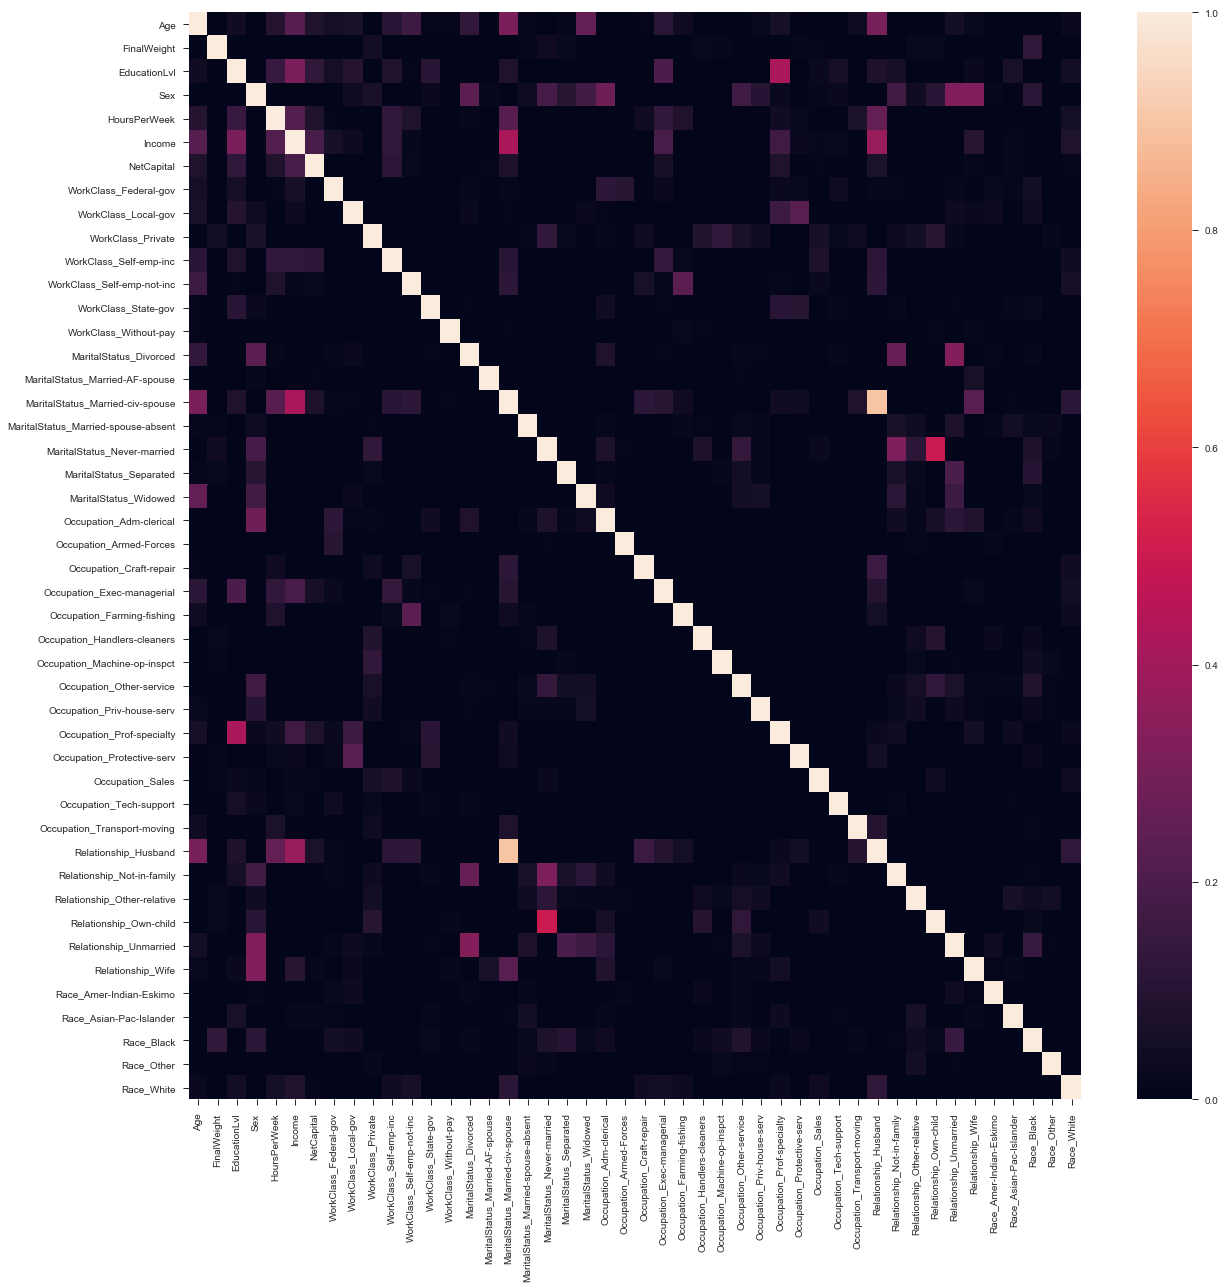

In [115]:
plt.figure(figsize =(20,20))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, vmin =0, vmax=1, )
plt.show()

FROM THE CORRELATION HEAT MAP, WE CAN DROP SOME FEATURES WHICH ARE HIGH CORRELATED

##### FEATURE ELIMINATION USING CORRELATION PLOT:

##### Relationship_husband and Marital_status_Never-Married are highly correlated with Marital_status_Civ-Spouse and Relationship_Own-child. Since the former have positive correlations with other features as well, they will be dropped from the dataset

In [116]:
dataset.drop("Relationship_Husband", 1, inplace = True)

In [117]:
dataset.drop("MaritalStatus_Never-married", 1, inplace = True)

In [118]:
print(dataset.shape)
dataset.head()

(34552, 45)


,Age,FinalWeight,EducationLvl,Sex,HoursPerWeek,NativeCountry,Income,NetCapital,WorkClass_Federal-gov,WorkClass_Local-gov,...,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
0,32,202952,9,0,40,1,25000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,47,263215,13,0,80,1,25000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,19,210308,10,1,15,1,25000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,67,137192,9,0,12,0,25000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,48,319079,13,1,30,1,25000,0,0,1,...,0,0,0,1,0,0,0,0,0,1


## CREATING X AND Y FOR MODEL IMPLEMENTATION 

In [119]:
X = dataset.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]].values
y = dataset.iloc[:, 6].values
print(X)
print(y)

[[32 202952 9 ..., 0 0 1]
 [47 263215 13 ..., 0 0 1]
 [19 210308 10 ..., 0 0 1]
 ..., 
 [58 183810 9 ..., 0 0 1]
 [21 156687 10 ..., 0 0 0]
 [27 152951 9 ..., 0 0 1]]
[25000 25000 25000 ..., 25000 25000 25000]


### CREATING THE TRAIN TEST SPLIT MANUALLY AS PER INCOME TRAINING AND INCOME TESTING

In [120]:
X_train = X[0:23031]
X_test = X[23031:34553]
y_train = y[0:23031]
y_test = y[23031:34553]

In [121]:
len(X_train)+len(X_test)

34552

In [122]:
len(y_train)+len(y_test)

34552

# MODEL IMPLEMENTATION FOR TRAINING SET AND k FOLD CROSS VALIDATION

##### Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it. In k-fold cross-validation, the original sample is randomly splitted into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. 

##### The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once. For classification problems, one typically uses stratified k-fold cross-validation, in which the folds are selected so that each fold contains roughly the same proportions of class labels. In repeated cross-validation, the cross-validation procedure is repeated n times, yielding n random partitions of the original sample. The n results are again averaged (or otherwise combined) to produce a single estimation.

##### The accuracies we get is the mean of the accuracies over the k fold and this is actual accuracy of the training dataset that has the optimal bias-variance trade off

In [215]:
# Splitting the training set as X and y for model implementation purpose
X1 = X[0:23031]
y1 = y[0:23031]
print(len(X1))
print(len(y1))

23031
23031


In [216]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [217]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(18424, 44)
(4607, 44)
(18424,)
(4607,)


### XGBOOST CLASSIFIER

In [391]:
# Fitting XGBoost to the training set

from xgboost import XGBClassifier
classifier = XGBClassifier(n_jobs = -1)
classifier.fit(X1_train, y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [392]:
# Predicting the Test Set results
y1_pred = classifier.predict(X1_test)

# Confusion matrix for the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y1_test, y1_pred)
accuracy = accuracy_score(y1_test, y1_pred)
print("\n The Confusion Matrix is:", cm)
print("\n The accuracy of the model in percentage is:", accuracy*100)


 The Confusion Matrix is: [[3334  117    0]
 [ 385  395    6]
 [ 187  177    6]]

 The accuracy of the model in percentage is: 81.072281311


#### k FOLD CV

In [393]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X1_train, y = y1_train, cv =10, n_jobs = -1)
print("The 10 K-fold cross validation accuracies are:\n", accuracies)
print("The accuracy after k-Fold Cross Validation in percentage is :", accuracies.mean()*100)
print("The standard deviation of k-Fold Cross Validation is:", accuracies.std())
print("The variance of k-Fold Cross validation is:", accuracies.var())

The 10 K-fold cross validation accuracies are:
 [ 0.80249593  0.81063483  0.81117743  0.80737927  0.81226262  0.81606077
  0.8046663   0.80076004  0.801195    0.80326087]
The accuracy after k-Fold Cross Validation in percentage is : 80.6989307252
The standard deviation of k-Fold Cross Validation is: 0.00502938600405
The variance of k-Fold Cross validation is: 2.52947235777e-05


##### CV result shows that mean of the accuracies over 10 fold is 80.69% and the standard deviation is 0.5%

### RANDOM FOREST CLASSIFIER

In [394]:
# Fitting Random Forest to the training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, n_jobs = -1)
classifier.fit(X1_train, y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [395]:
# Predicting the Test Set results
y1_pred = classifier.predict(X1_test)

# Confusion matrix for the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y1_test, y1_pred)
accuracy = accuracy_score(y1_test, y1_pred)
print("\n The Confusion Matrix is:", cm)
print("\n The accuracy of the model in percentage is:", accuracy*100)


 The Confusion Matrix is: [[3241  154   56]
 [ 360  336   90]
 [ 178  153   39]]

 The accuracy of the model in percentage is: 78.4892554808


#### K FOLD CV RESULTS

In [396]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X1_train, y = y1_train, cv =10, n_jobs = -1)
print("The 10 K-fold cross validation accuracies are:\n", accuracies)
print("\nThe accuracy after k-Fold Cross Validation in percentage is :", accuracies.mean()*100)
print("\nThe standard deviation of k-Fold Cross Validation is:", accuracies.std())
print("The variance of k-Fold Cross validation is:", accuracies.var())

The 10 K-fold cross validation accuracies are:
 [ 0.77428106  0.78133478  0.78730331  0.79706999  0.78513294  0.78079219
  0.77862181  0.77741585  0.7756654   0.77391304]

The accuracy after k-Fold Cross Validation in percentage is : 78.1153037753

The standard deviation of k-Fold Cross Validation is: 0.00676245200786
The variance of k-Fold Cross validation is: 4.57307571586e-05


##### CV result shows that mean of the accuracies over 10 fold is 78.11% and the standard deviation is 0.6%

### KNN CLASSIFIER

In [320]:
# Fitting the classifier onto the dataset

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = "minkowski", p=2, weights='uniform')
classifier.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [321]:
# Predicting the Test Set results
y1_pred = classifier.predict(X1_test)

# Confusion matrix for the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y1_test, y1_pred)
accuracy = accuracy_score(y1_test, y1_pred)
print("\n The accuracy of the model in percentage is:", accuracy*100)


 The accuracy of the model in percentage is: 76.3186455394


#### K FOLD CV

In [322]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X1_train, y = y1_train, cv =10, n_jobs = -1)
print("The 10 K-fold cross validation accuracies are:\n", accuracies)
print("\nThe accuracy after k-Fold Cross Validation in percentage is :", accuracies.mean()*100)
print("\nThe standard deviation of k-Fold Cross Validation is:", accuracies.std())

The 10 K-fold cross validation accuracies are:
 [ 0.74660879  0.7542051   0.76451438  0.76071622  0.75583288  0.76559957
  0.75529029  0.74864278  0.76860402  0.76141304]

The accuracy after k-Fold Cross Validation in percentage is : 75.8142706997

The standard deviation of k-Fold Cross Validation is: 0.00689359335761


##### CV result shows that k Fold accuracy (75.8%) and the Standard deviation is 0.6%

### LOGISTIC REGRESSION

In [223]:
# Fitting the classifier in the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [224]:
# Predicting the Test Set results
y1_pred = classifier.predict(X1_test)

# Confusion matrix for the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y1_test, y1_pred)
accuracy = accuracy_score(y1_test, y1_pred)
print("\n The accuracy of the model in percentage is:", accuracy*100)


 The accuracy of the model in percentage is: 76.6008248318


#### K FOLD CV RESULTS

In [225]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X1_train, y = y1_train, cv =10, n_jobs = -1)
print("The 10 K-fold cross validation accuracies are:\n", accuracies)
print("\nThe accuracy after k-Fold Cross Validation in percentage is :", accuracies.mean()*100)
print("\nThe standard deviation of k-Fold Cross Validation is:", accuracies.std())

The 10 K-fold cross validation accuracies are:
 [ 0.7628866   0.76071622  0.76397179  0.76071622  0.76342919  0.76668475
  0.75854585  0.76112921  0.76534492  0.75923913]

The accuracy after k-Fold Cross Validation in percentage is : 76.2266388304

The standard deviation of k-Fold Cross Validation is: 0.00250500231708


##### CV result shows that mean of the accuracies over 10 fold is 76.22% and the standard deviation is 0.2%

# GRID SEARCH FOR OPTIMAL PARAMETERS

##### Why grid search? Grid Search means we have a set of models which differ from each other in their parameter values, which lie on a grid, we are training each of this models and evalutate it using cross-fold validation and then selecting the one that performed the BEST. 

### XGBOOST CLASSIFIER

In [227]:
# Fitting XGBoost to the training set
from xgboost import XGBClassifier
classifier = XGBClassifier()

In [228]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[3,4,5],"learning_rate":[0.06, 0.05, 0.04, 0.03]}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X1_train, y1_train)

In [229]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.807587928789
{'learning_rate': 0.06, 'max_depth': 4}


##### Similar to reinforcement learning, learning rate increases then likelihood estimation may not converge. On the other hand, if the learning rate decreases, it converges. So lesser the learning rate, the better. And the optimal max_depth obtained was 4

### RANDOM FOREST CLASSIFIER

In [372]:
# Fitting XGBoost to the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [373]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[12, 15, 17],"max_features":['log2', 'sqrt']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X1_train, y1_train)

In [374]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.799826313504
{'max_depth': 12, 'max_features': 'sqrt'}


##### Max_depth was on the increasing trend until 12 and then the accuracy dipped leading to 12 as the optimal max_depth and max_features is the sqrt of all the features whereas the other possibility "all features" was turned down

### LOGISTIC REGRESSION

In [246]:
# Fitting the classifier in the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [258]:
from sklearn.model_selection import GridSearchCV
parameters = {"C":[0.75, 0.8, 0.85],"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X1_train, y1_train)

C:\Users\manig\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\manig\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\manig\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [259]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy*100)
print(best_parameters)

79.190186713
{'C': 0.8, 'solver': 'newton-cg'}


##### Default method used before this tuning is "liblinear" for the solver. But after the tuning, "newton-cg" is the optimal solver suited for multivariate analysis and the value of C is now 0.8 which was 1.0 before

### KNN CLASSIFICATION

In [383]:
# Fitting the classifier onto the dataset

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

In [384]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors":[18, 25, 30], "weights":["uniform", "distance"]}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X1_train, y1_train)

In [385]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy*100)
print(best_parameters)

76.6663048198
{'n_neighbors': 18, 'weights': 'uniform'}


##### The number of neighbors is 25 which is the optimal. The accuracy dipped over 25 during the iterative method. Instead of the "distances", weights preferred is "uniform" for the neighbors

The optimal number of neighbors is 18.


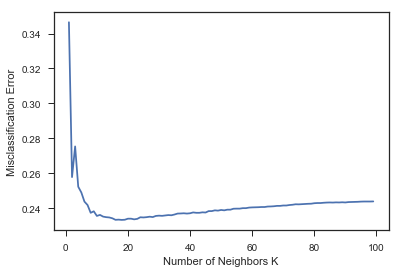

In [375]:
neighbors = range(1,100)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
#for k in neighbors:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X1_train, y1_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# MODEL IMPLEMENTATION

## 1. XGBOOST

In [405]:
# Fitting XGBoost to the training set
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate = 0.06, max_depth= 4, n_jobs = -1)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.06, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [406]:
# Predicting the Test Set results
y_pred = classifier.predict(X_test)

In [407]:
# Confusion matrix for the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("\n The Confusion Matrix is:", cm)
print("\n The accuracy of the model in percentage is:", accuracy*100)


 The Confusion Matrix is: [[8224  290    1]
 [ 970  966    3]
 [ 542  520    5]]

 The accuracy of the model in percentage is: 79.8107803142


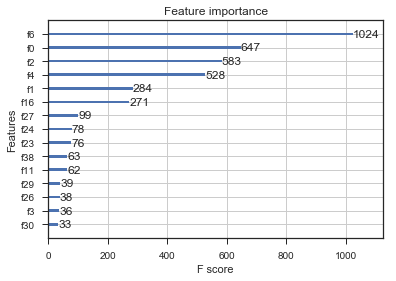

In [401]:
plt.figure(figsize=(50,50))
xgb.plot_importance(classifier , ylabel = "Features", max_num_features = 15)
plt.show()

##### FROM THE PLOT WE CAN SEE THAT F0 - NET CAPITAL (NEWLY CREATED FEATURE) AND F0 (AGE) ARE THE TOP FEATURES FOLLOWED BY F2 (EDUCATION LVL) , F4 (HOURSPERWEEK), F1 (FINAL WEIGHT) AND OTHER FEATURES. THESE FEATURES ARE MORE IMPORTANT IN PREDICTING THE TARGET VARIABLE, IN THIS CASE "INCOME"

##### Feature importance - This states the corresponding feature importance in the input w.r.t the output variable

###### Why XGBoosting? This is the model that wins every competition! This is the gradient boosted decision trees designed for speed and performance. 

##### PROS - Execution speed - This is so fast. Very high execution speed with highest model accuracy comparing to modern algorithms due to its flexibility, availability, regularisation and doesnt tend to over fit or underfit leading to optimal bias-variance trade-off

## 2. RANDOM FOREST CLASSIFICATION

In [277]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, n_jobs = -1, 
                                     max_depth = 12, max_features = 'sqrt')
classifier2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [278]:
# Predicting the Test Set results
y_pred = classifier2.predict(X_test)

In [279]:
# Confusion matrix for the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, y_pred)
accuracy2 = accuracy_score(y_test, y_pred)
print("\n The Confusion Matrix is:", cm2)
print("\n The accuracy of the model in percentage is:", accuracy2*100)


 The Confusion Matrix is: [[8255  257    3]
 [1085  818   36]
 [ 613  436   18]]

 The accuracy of the model in percentage is: 78.9080808958


##### Why Random Forest Classification? These are classification counterparts to the regression trees. They are also referred to Classification and Regression Trees (CART). They are nothing more than but the decision trees combined. They also provide the average of all the outputs from the decision trees there by providing the optimal result.

##### PROS - Because of their construction, this algorithm handle very well high dimensional spaces as well as large number of training examples. As with regression, classification tree ensembles also perform very well in practice. They are robust to outliers, scalable, and able to naturally model non-linear decision boundaries thanks to their hierarchical structure.

##### CONS - They are prone to overfitting (based on the occurences of a feature value), but this can be alleviated by ensemble methods

## 3. KNN CLASSIFICATION

In [386]:
# Fitting the classifier onto the dataset

from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors = 18, metric = "minkowski", p=2, weights='uniform')
classifier3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')

In [387]:
# Predicting the test set results
y_pred = classifier3.predict(X_test)

In [388]:
# Confusion matrix for the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm3 = confusion_matrix(y_test, y_pred)
accuracy3 = accuracy_score(y_test, y_pred)
print("\n The accuracy of the model in percentage is:", accuracy3*100)


 The accuracy of the model in percentage is: 76.3909382866


##### Why k-NN Classification? The output can be calculated as the class with the highest frequency from the K most similar instances. Each instances in essence votes for their class and the class with the most votes is taken as prediction. K number is always chosen as odd number to avoid a tie. This can be used for the both regression as well as for classification problems. 

##### PROS- This is very good for the smaller n and higher p problems. kNN can be an Instance based algorithm (storing all the instances), a lazy learning algorithm (no learning is required), Non parametric algorithm (i.e no assumptions about the functional form of the problem)

##### CONS - Some advantages have disadvantages like storing the instances, this may take higher computational time, works well for a small number of dimensions and not higher dimensions. 

## 4. LOGISTIC REGRESSION

##### Using the optimal parameters identified from the GRID SEARCH to train and test the overall dataset

In [352]:
# Fitting the classifier in the Training set

from sklearn.linear_model import LogisticRegression
classifier4 = LogisticRegression(C= 0.8, solver= 'newton-cg', random_state = 0)
classifier4.fit(X_train, y_train)

C:\Users\manig\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\manig\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\manig\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [363]:
from collections import Counter

# Predicting the test set results

y_pred = classifier4.predict(X_test)
#f = y_pred.tolist()
#Counter(f)

In [364]:
# Confusion matrix for the accuracy

from sklearn.metrics import confusion_matrix, accuracy_score
cm4 = confusion_matrix(y_test, y_pred)
accuracy4 = accuracy_score(y_test, y_pred)
print(cm4)
print("\n The accuracy of the model in percentage is:", accuracy4*100)

[[8087  428    0]
 [1028  910    1]
 [ 590  477    0]]

 The accuracy of the model in percentage is: 78.0921794983


##### Why logistic regression? Logistic regression is the classification counterpart to linear regression. Predictions are transformed using the logistic function. This is useful because we can see that the calculation of the output on the right is on the right is linear again (just like linear regression) and the input on the left is a log of the probability of the default class. 

##### PROS - Outputs have a nice probabilistic interpretation and the algorithm can be regularised to avoid overfitting

##### CONS - There are many cons comparing the PROS for this assignment. Logistic regression tends to underperform when there are multiple or non-linear decision boundaries. They are not flexible enough to naturally capture more complex relationships. It assumes no error in the output variable. So we should remove the outliers and possibly misclassified instances from your training data. It is also possible for the likelihood estimation process  that learns the coefficients to fail to converge. This may happen when there are high-correlated inputs in the data

## SUMMARY OF ALL ACCURACIES

In [389]:
print("\nThe accuracy of XGBoosting Classification in percentage is:", accuracy*100)
print("\nThe accuracy of Random Forest Classification in percentage is:", accuracy2*100)
print("\nThe accuracy of K-NN Classification in percentage is:", accuracy3*100)
print("\nThe accuracy of Logistic Regression Classification in percentage is:", accuracy4*100)


The accuracy of XGBoosting Classification in percentage is: 79.8107803142

The accuracy of Random Forest Classification in percentage is: 78.9080808958

The accuracy of K-NN Classification in percentage is: 76.3909382866

The accuracy of Logistic Regression Classification in percentage is: 78.0921794983


##### WE CAN SEE FROM THE FAMILY OF ACCURACIES THAT, XGBOOST REMAINS THE ALGORITHM WITH THE HIGHEST ACCURACY, FOLLOWED BY RANDOM FOREST CLASSIFIER, FOLLOWED BY LOGISTIC REGRESSION CLASSIFICATION ON THE THIRD AND K NEAREST NEIGHBORS AS THE LAST ALGORITHM WITH THE LOW ACCURACY COMPARITIVELY. THIS WAS DONE OVER THE TESTING DATASET WITH THE "OPTIMAL PARAMETERS" HENCE PROVIDING THE BEST RESULTS

##### XGBOOST, the chosen algorithm- based on the confusion matrix we can see that the model niether overfits or underfits the data. i.e overfits (good performance on training data and poor performance on test data) and underfits (poor performance on training data and good performance on testing set) but this has good fitting over the training set and testing set. But it tends to over fit (since it has been insisted in assignment) since the accuracy over the testing set is less than the testing set

# APPLYING RECURSIVE FEATURE ELIMINATION FOR FEATURE SELECTION

In [289]:
"""# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X_train)
X1_test = sc.fit_transform(X_test)

# Applying PCA

from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X2_train = pca.fit_transform(X1_train)
X2_test = pca.fit_transform(X1_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# Fitting the classifier in the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X2_train, y_train)

# Predicting the test set results

y_pred = classifier.predict(X2_test)

# Confusion matrix for the accuracy

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("\n The accuracy of the model in percentage is:", accuracy*100)"""

'# Feature Scaling\n\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX1_train = sc.fit_transform(X_train)\nX1_test = sc.fit_transform(X_test)\n\n# Applying PCA\n\nfrom sklearn.decomposition import PCA\npca = PCA(n_components = 10)\nX2_train = pca.fit_transform(X1_train)\nX2_test = pca.fit_transform(X1_test)\nexplained_variance = pca.explained_variance_ratio_\nprint(explained_variance)\n\n# Fitting the classifier in the Training set\n\nfrom sklearn.linear_model import LogisticRegression\nclassifier = LogisticRegression(random_state = 0)\nclassifier.fit(X2_train, y_train)\n\n# Predicting the test set results\n\ny_pred = classifier.predict(X2_test)\n\n# Confusion matrix for the accuracy\n\nfrom sklearn.metrics import confusion_matrix, accuracy_score\ncm = confusion_matrix(y_test, y_pred)\naccuracy = accuracy_score(y_test, y_pred)\nprint("\n The accuracy of the model in percentage is:", accuracy*100)'

In [348]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE
model = XGBClassifier()
# create the RFE model and select 3 attributes
rfe = RFE(model, 30)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False False  True  True False  True False False False  True  True
  True  True  True  True False  True  True  True False False False False
  True  True  True False False  True False  True]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1 11 12  1  1 14  1  7  5 15  1  1  1
  1  1  1  9  1  1  1  3  4  6  2  1  1  1 10 13  1  8  1]


In [349]:
names = dataset.columns.tolist()
print ("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, 'Age'), (1, 'EducationLvl'), (1, 'FinalWeight'), (1, 'HoursPerWeek'), (1, 'Income'), (1, 'MaritalStatus_Divorced'), (1, 'MaritalStatus_Married-AF-spouse'), (1, 'MaritalStatus_Married-spouse-absent'), (1, 'NativeCountry'), (1, 'NetCapital'), (1, 'Occupation_Armed-Forces'), (1, 'Occupation_Craft-repair'), (1, 'Occupation_Exec-managerial'), (1, 'Occupation_Farming-fishing'), (1, 'Occupation_Handlers-cleaners'), (1, 'Occupation_Machine-op-inspct'), (1, 'Occupation_Priv-house-serv'), (1, 'Occupation_Prof-specialty'), (1, 'Occupation_Protective-serv'), (1, 'Race_Asian-Pac-Islander'), (1, 'Race_Other'), (1, 'Relationship_Other-relative'), (1, 'Relationship_Own-child'), (1, 'Relationship_Unmarried'), (1, 'Sex'), (1, 'WorkClass_Federal-gov'), (1, 'WorkClass_Local-gov'), (1, 'WorkClass_Private'), (1, 'WorkClass_Self-emp-inc'), (1, 'WorkClass_Self-emp-not-inc'), (2, 'Relationship_Not-in-family'), (3, 'Occupation_Sales'), (4, 'Occupation_Tech-support'), (5, 'Mar

In [350]:
yy_pred = rfe.predict(X_test)

In [351]:
# Confusion matrix for the accuracy

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, yy_pred)
accuracy = accuracy_score(y_test, yy_pred)
print("The confusion matrix after feature extraction is:", cm)
print("\n The accuracy of the model in percentage is:", accuracy*100)

The confusion matrix after feature extraction is: [[8199  315    1]
 [ 942  992    5]
 [ 529  532    6]]

 The accuracy of the model in percentage is: 79.8281399184


### INFERENCE: 

##### MODEL ACCURACY AFTER FEATURE ELIMINATION HAS IMPROVED FROM 79.80% (WITHOUT RFE) TO 79.82% WHICH IS SIGNIFICANT FOR A SMALL DATASET LIKE THIS ASSIGNMENT. AND XGBOOST BEHAVES WELL BY AVOIDING OVERFIT AND UNDERFIT OF THE MODEL BY NATURE. SIMILARY, WE CAN ALSO PROVE THAT MODEL ACCURACY WITH RFE WILL IMPROVE OVER THE ACTUAL MODEL WITHOUT RFE